# Libraries

In [16]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}

# Helper libraries
import datetime
import time
from numpy.random import seed
from packaging import version
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, auc, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier

from collections import Counter
import numpy as np
import pandas as pd

# TensorFlow and tf.keras
import tensorflow as tf
tf.debugging.set_log_device_placement(False)

from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN,RNN, LSTM, Bidirectional, GRU
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import MaxPooling1D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense
from tensorflow.keras.datasets import imdb

In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# EDA

In [ ]:
(data, labels), (_, _) = tf.keras.datasets.imdb.load_data(
    path='imdb.npz', num_words=None, skip_top=0, maxlen=None, 
    seed=113, start_char=1, oov_char=2, index_from=3)

C:\Users\brown\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\brown\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
print(f"There are {len(data)} IMDb Film Reviews with {len(labels)} labels.") 
print(f"There are {len(set(labels))} different label categories.")

There are 25000 IMDb Film Reviews with 25000 labels.
There are 2 different label categories.


In [ ]:
classes = {0:'Negative',1:'Positive'}

In [ ]:
word_index = tf.keras.datasets.imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [ ]:
for x in range(3):

    print("Review:"," ".join([reverse_word_index.get(i-3,"#") for i in data[x]]))
    print("Label:",classes[labels[x]])
    print()

Review: # this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and s

In [ ]:
indexes = [word for doc in data for word in doc]
print(f"There are {len(indexes)} words in the data corpus")

There are 5967841 words in the data corpus


In [ ]:
corpus = [reverse_word_index.get(index,'?') for index in indexes]
corpus_freq = Counter(corpus).most_common()
corpus_freq[:50]

[('of', 336148),
 ('to', 164097),
 ('is', 163040),
 ('br', 145847),
 ('in', 135708),
 ('it', 107313),
 ('i', 101871),
 ('this', 93934),
 ('that', 79058),
 ('was', 77142),
 ('as', 75974),
 ('for', 69787),
 ('with', 48195),
 ('movie', 46927),
 ('but', 44335),
 ('film', 44122),
 ('on', 43564),
 ('not', 42594),
 ('you', 39095),
 ('are', 34188),
 ('his', 30610),
 ('have', 29877),
 ('he', 29425),
 ('be', 29366),
 ('one', 27726),
 ('all', 26952),
 ('at', 26948),
 ('by', 26513),
 ('the', 25000),
 ('an', 23953),
 ('they', 23507),
 ('who', 22539),
 ('so', 21538),
 ('from', 21139),
 ('like', 20599),
 ('her', 20586),
 ('or', 20494),
 ('just', 20272),
 ('about', 18407),
 ("it's", 17994),
 ('out', 17759),
 ('has', 17371),
 ('if', 17153),
 ('some', 17092),
 ('what', 16790),
 ('there', 16790),
 ('good', 15743),
 ('more', 15735),
 ('when', 15349),
 ('very', 15100)]

In [ ]:
uniques = [word for word,freq in Counter(corpus).items() if freq == 1]
print(f"There are {len(uniques)} words that occur just once in the data corpus totaling 1638886 words")

There are 36577 words that occur just once in the data corpus totaling 1638886 words


In [ ]:
corpus_freq[:-26:-1]

[('johnnys', 1),
 ('geezers', 1),
 ('isolative', 1),
 ('legitimates', 1),
 ('caisse', 1),
 ("'eliminated'", 1),
 ('merritt', 1),
 ("'willy", 1),
 ('proyas', 1),
 ("'giants'", 1),
 ("artimisia's", 1),
 ('worldy', 1),
 ('best\x97but', 1),
 ('protractor', 1),
 ('manner\x85', 1),
 ('amit', 1),
 ("tong's", 1),
 ('1870', 1),
 ('arjuna', 1),
 ('nickson', 1),
 ('examp', 1),
 ("'lauren'", 1),
 ('epic\x85', 1),
 ("sherman's", 1),
 ("bennett'", 1)]

In [ ]:
unique_indexes = list(set(indexes))
print(f"There are {len(unique_indexes)} words in the data corpus that represent the vocabulary")

There are 88585 words in the data corpus that represent the vocabulary


In [ ]:
uniques[:25]

['gretal',
 'troble',
 'cavil',
 'hiyao',
 'freshened',
 'dedications',
 'mayfair',
 '498',
 'zigfield',
 'wrongdoing',
 "meloni's",
 'bullit',
 'stygian',
 "'menaikkan'",
 'glitched',
 "gods'",
 "'daring'",
 'enrapture',
 "shep'",
 'evolutions',
 'apricorn',
 'zeland',
 'hittite',
 "pair''",
 "'count'"]

In [ ]:
doc_sizes = ([len(lst) for lst in data]) # num of words in each document
print(f"Number of words in IMDb Reviews: {min(doc_sizes)} to {max(doc_sizes)}")
print(f"There are a total of {sum(doc_sizes)} words in the data corpus")

Number of words in IMDb Reviews: 11 to 2494
There are a total of 5967841 words in the data corpus


Text(0, 0.5, 'Number of IMDb Reviews')

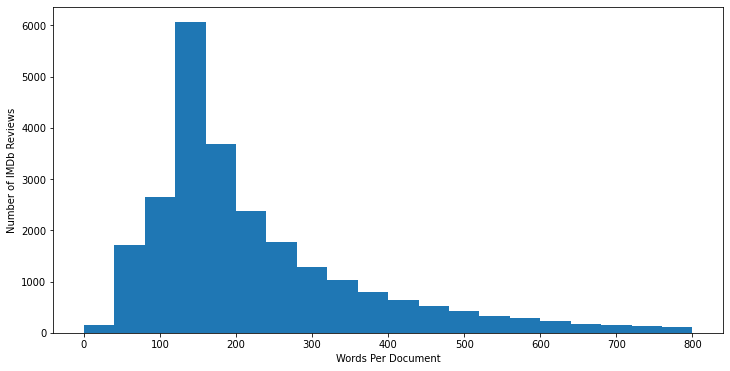

In [ ]:
plt.figure(figsize=[12,6])
plt.hist(doc_sizes, bins=20,range = (0,800))
plt.xlabel("Words Per Document")
plt.ylabel("Number of IMDb Reviews")

# Models

## Setup

In [ ]:
#IMDb data has 25,000 already designated for training/testing
#Will join both sets then perform manual 80/20 split
voc_size=10000

(train_data, train_labels),(test_data, test_labels) = tf.keras.datasets.imdb.load_data(
    path='imdb.npz', num_words=voc_size, skip_top=26, maxlen=300,
    seed=113, start_char=1, oov_char=2, index_from=3)

X = np.append(train_data,test_data)
y = np.append(train_labels,test_labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train_seq = preprocessing.sequence.pad_sequences(X_train, maxlen=299)
X_test_seq = preprocessing.sequence.pad_sequences(X_test, maxlen=299)

print(y_train.shape, y_test.shape)
print()
print('Word Sequence:',X_train[0])
print('Label:',y_train[0])
#X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post')
#X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post')

17465344/17464789 [==============================] - 0s 0us/step
(30800,) (7701,)

Word Sequence: [2, 2, 114, 2, 2, 2, 2, 2, 2732, 2, 55, 1564, 185, 250, 271, 2, 2383, 2, 1787, 2, 2, 1007, 2, 41, 922, 8827, 1720, 747, 153, 908, 50, 59, 892, 56, 2, 41, 8827, 1138, 1432, 2, 295, 36, 2106, 2, 32, 2, 1370, 41, 799, 435, 2, 3751, 2, 1007, 413, 788, 2, 2, 2, 51, 166, 2, 2, 38, 318, 2, 2, 752, 2, 1763, 114, 26, 2, 307, 5665, 2, 2, 105, 261, 2, 922, 8827, 1432, 2, 2, 2440, 46, 4934, 29, 47, 3143, 7843, 1515, 1553, 2, 1048, 6260, 2, 261, 2, 922, 799, 37, 75, 67, 2, 2183, 5519, 134, 7843, 59, 152, 28, 2, 281, 2, 2, 42, 2972, 2, 89, 76, 2, 99, 76, 2, 261, 2, 1155, 250, 2, 2, 4295, 2, 41, 8827, 1757, 59, 3751, 659, 2, 2124, 2, 393, 2, 192, 2, 41, 799, 2, 64, 2, 1280, 250, 103, 32, 2, 2, 2, 91, 318, 561, 2, 2, 2, 2, 54, 2, 185, 250, 2, 2, 8827, 1432, 417, 570, 997, 68, 3224, 2, 257, 85, 2, 191, 2283, 126, 319, 53, 307, 1301, 731, 2, 2, 2, 2, 2, 2, 2, 2, 2, 32, 134, 771, 2, 2, 2, 371, 307, 2, 2, 2, 

## Simple RNN

In [ ]:
model = models.Sequential()

# 299 Time-steps
# 300 Dimension Word Embedding per Time-step
model.add(Embedding(input_dim = voc_size, output_dim = 300, input_length = X_train_seq.shape[1]))

# 32 RNN Units
model.add(SimpleRNN(units=32,activation='tanh',use_bias=True))

# 1 Dense Layer Node
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 299, 300)          3000000   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                10656     
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 3,010,689
Trainable params: 3,010,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_units = 32
num_features = 300
recurrent_weights = num_units * num_units
input_weights = num_features * num_units

recurrent_weights + input_weights + num_units

10656

In [ ]:
# Run when results have already been partially gathered
rnn_results = pd.read_csv('/content/drive/MyDrive/Research Assignment 4/RNN_Results.csv', header=0, index_col=0)

In [ ]:
rnn_results['Model'].count()

94

RNN_100_Dims_1_Layers_8_Units already exists
RNN_300_Dims_1_Layers_8_Units already exists
RNN_500_Dims_1_Layers_8_Units already exists
RNN_100_Dims_1_Bidirectional_8_Units already exists
RNN_300_Dims_1_Bidirectional_8_Units already exists
RNN_500_Dims_1_Bidirectional_8_Units already exists
RNN_100_Dims_2_Layers_8_Units already exists
RNN_300_Dims_2_Layers_8_Units already exists
RNN_500_Dims_2_Layers_8_Units already exists
RNN_100_Dims_2_Bidirectional_8_Units already exists
RNN_300_Dims_2_Bidirectional_8_Units already exists
RNN_500_Dims_2_Bidirectional_8_Units already exists
RNN_100_Dims_3_Layers_8_Units already exists
RNN_300_Dims_3_Layers_8_Units already exists
RNN_500_Dims_3_Layers_8_Units already exists
RNN_100_Dims_3_Bidirectional_8_Units already exists
RNN_300_Dims_3_Bidirectional_8_Units already exists
RNN_500_Dims_3_Bidirectional_8_Units already exists
RNN_100_Dims_1_Layers_16_Units already exists
RNN_300_Dims_1_Layers_16_Units already exists
RNN_500_Dims_1_Layers_16_Units alre

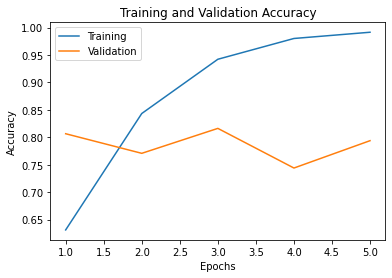


Confusion Matrix
----------------
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


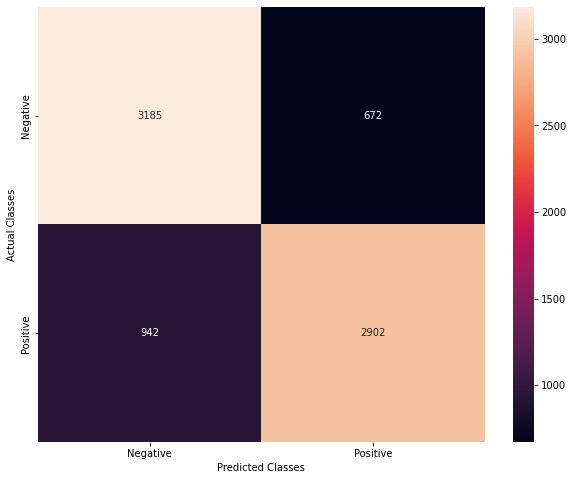


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/RNN_500_Dims_2_Bidirectional_64_Units/assets

Word Embedding Dims: 100
RNN Layers: 3
RNN Units: 64
-----------------------
Accuracy: 0.8378132581710815
Precision: 0.8723099231719971
Recall: 0.7908428907394409
F1: 0.8295811370930062
Total Time (s): 572.9876418113708

Model Accuracy Trend
--------------------


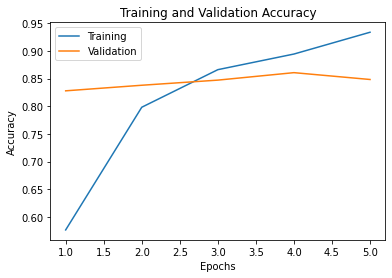


Confusion Matrix
----------------


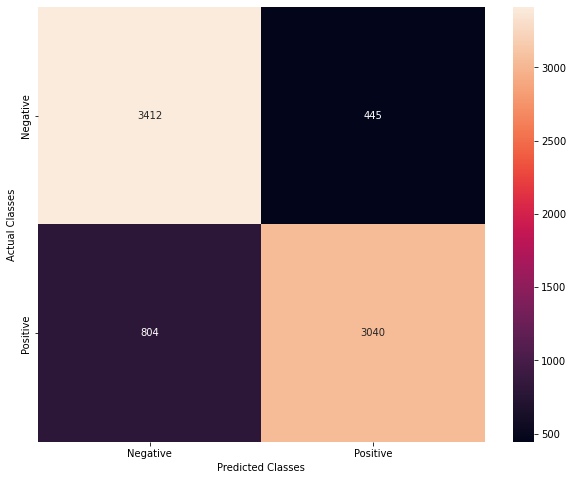


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/RNN_100_Dims_3_Layers_64_Units/assets

Word Embedding Dims: 300
RNN Layers: 3
RNN Units: 64
-----------------------
Accuracy: 0.8023633360862732
Precision: 0.8235785961151123
Recall: 0.7687304615974426
F1: 0.7952098887923724
Total Time (s): 596.5280871391296

Model Accuracy Trend
--------------------


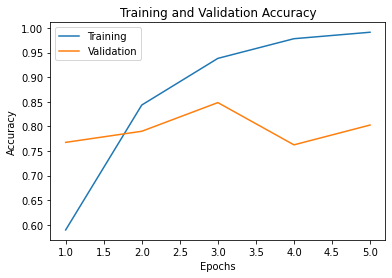


Confusion Matrix
----------------


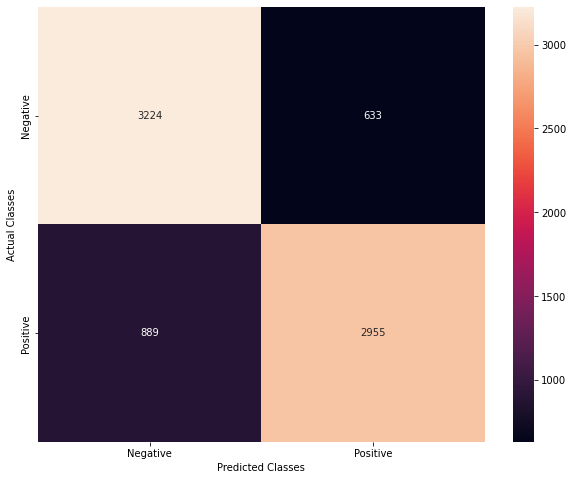


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/RNN_300_Dims_3_Layers_64_Units/assets

Word Embedding Dims: 500
RNN Layers: 3
RNN Units: 64
-----------------------
Accuracy: 0.6718608140945435
Precision: 0.6697602272033691
Recall: 0.6758584976196289
F1: 0.6727955438976125
Total Time (s): 623.8895761966705

Model Accuracy Trend
--------------------


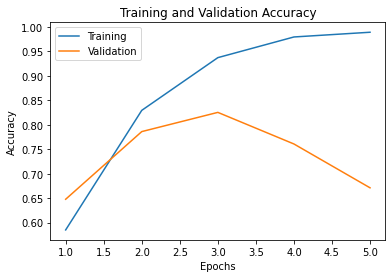


Confusion Matrix
----------------


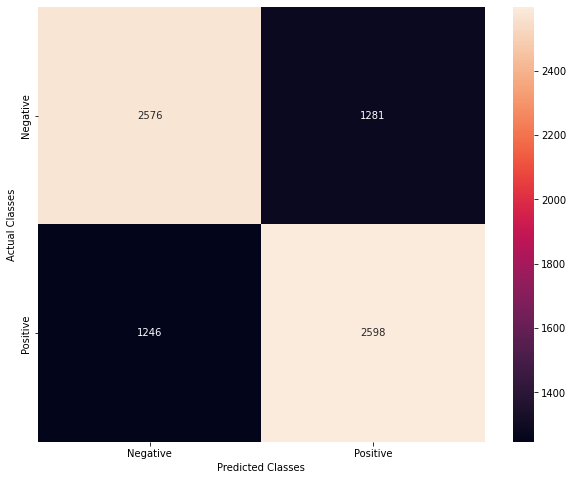


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/RNN_500_Dims_3_Layers_64_Units/assets

Word Embedding Dims: 100
RNN Layers: 3
RNN Units: 64
Bidirectional Layer(s)
-----------------------
Accuracy: 0.7741851806640625
Precision: 0.7645136713981628
Recall: 0.7913631796836853
F1: 0.7777067567894181
Total Time (s): 1040.8302595615387

Model Accuracy Trend
--------------------


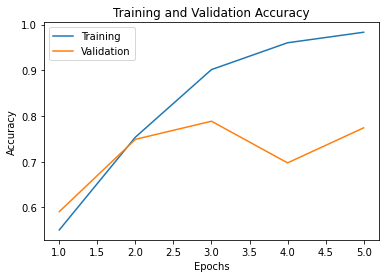


Confusion Matrix
----------------


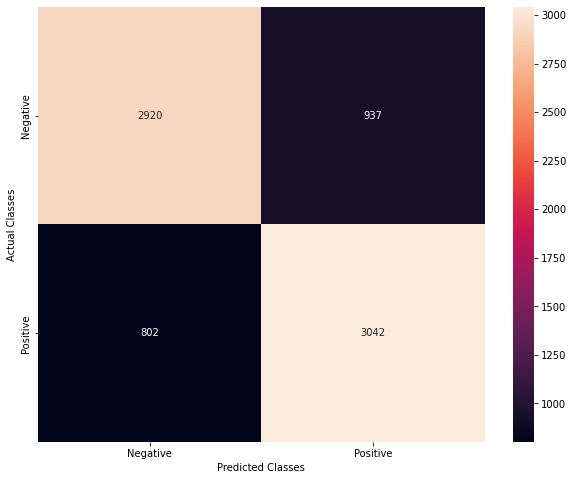


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/RNN_100_Dims_3_Bidirectional_64_Units/assets

Word Embedding Dims: 300
RNN Layers: 3
RNN Units: 64
Bidirectional Layer(s)
-----------------------
Accuracy: 0.7954810857772827
Precision: 0.8555311560630798
Recall: 0.7101976871490479
F1: 0.7761193784658819
Total Time (s): 1084.7689728736877

Model Accuracy Trend
--------------------


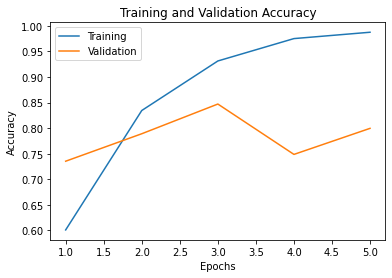


Confusion Matrix
----------------


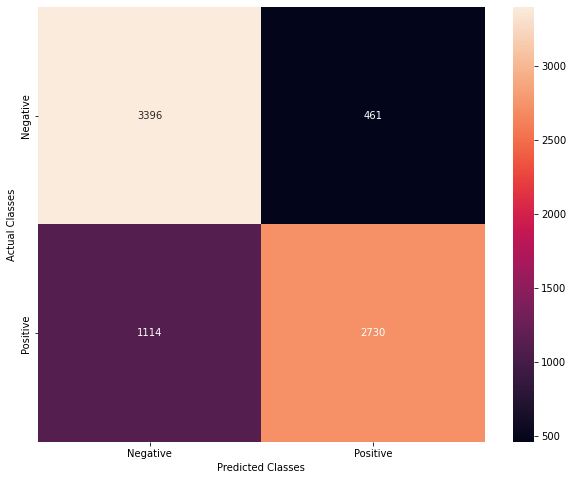


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/RNN_300_Dims_3_Bidirectional_64_Units/assets

Word Embedding Dims: 500
RNN Layers: 3
RNN Units: 64
Bidirectional Layer(s)
-----------------------
Accuracy: 0.7570445537567139
Precision: 0.7764079570770264
Recall: 0.7208636999130249
F1: 0.7476055663881135
Total Time (s): 1114.7683668136597

Model Accuracy Trend
--------------------


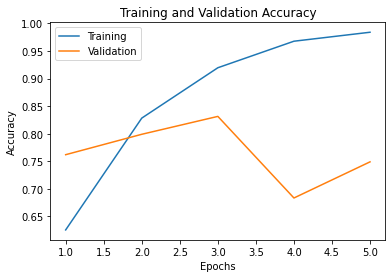


Confusion Matrix
----------------


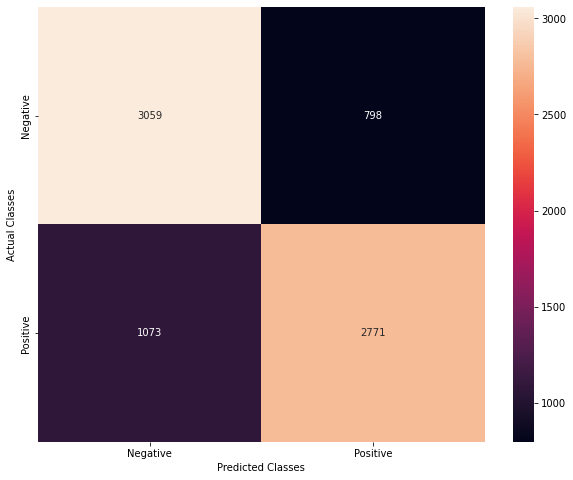


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/RNN_500_Dims_3_Bidirectional_64_Units/assets



In [ ]:
#rnn_results = pd.DataFrame(columns=['Model','Embed_Dims','RNN Layers','RNN Units','Epochs','Bidirectional','Time','Test Accuracy','Test Precision','Test Recall','Test F1'])

# Run when results have already been partially gathered
rnn_results = pd.read_csv('/content/drive/MyDrive/Research Assignment 4/RNN_Results.csv', header=0, index_col=0)

for RNN_units in [8,16,32,64]:
    
    for RNN_layers in [1,2,3]:

        for bidirectional in [0,1]:
    
            for dims in [100,300,500]:

                num_epochs = 5

                if bidirectional == 1:
                    model_name = 'RNN_{}_Dims_{}_Bidirectional_{}_Units'.format(dims,RNN_layers,RNN_units)

                else:
                    model_name = 'RNN_{}_Dims_{}_Layers_{}_Units'.format(dims,RNN_layers,RNN_units)

                if rnn_results[rnn_results['Model']==model_name]['Model'].count() > 0:

                  print('{} already exists'.format(model_name))
                  continue

                start_time = time.time()

                print('Word Embedding Dims:',dims)
                print('RNN Layers:',RNN_layers)
                print('RNN Units:',RNN_units)
                if bidirectional == 1:
                  print('Bidirectional Layer(s)')
                print('-----------------------')

                seed(5)
                tf.random.set_seed(5)

                model = models.Sequential()
                model.add(Embedding(input_dim = voc_size, output_dim = dims, input_length = X_train_seq.shape[1]))
                
                if RNN_layers > 1:
                    
                    for layers in range(1,RNN_layers):
                        
                        if bidirectional == 1:
                          model.add(Bidirectional(SimpleRNN(units=RNN_units, return_sequences=True)))
                        else:
                          model.add(SimpleRNN(units=RNN_units, return_sequences=True))

                if bidirectional == 1:   
                    model.add(Bidirectional(SimpleRNN(units=RNN_units)))
                else:    
                    model.add(SimpleRNN(units=RNN_units))

                model.add(Dense(1, activation='sigmoid'))

                model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['Precision','Recall','accuracy'])

                history = model.fit(X_train_seq, y_train, batch_size=128, epochs=num_epochs, validation_split=0.2, verbose=False)

                total_time = time.time() - start_time

                loss, precision, recall, accuracy = model.evaluate(X_test_seq, y_test, verbose=0)

                f1_score = (2 * precision * recall) / (precision + recall)

                print('Accuracy:',accuracy)
                print('Precision:',precision)
                print('Recall:',recall)
                print('F1:',f1_score)
                print('Total Time (s):',total_time)
                print()

                acc = history.history['accuracy']
                val_acc = history.history['val_accuracy']
                loss = history.history['loss']
                val_loss = history.history['val_loss']

                print('Model Accuracy Trend')
                print('--------------------')
                plot = plt.plot(range(1, len(acc) + 1), history.history['accuracy'], label = 'Training')
                plot = plt.plot(range(1, len(val_acc) + 1), history.history['val_accuracy'], label = 'Validation')
                plot = plt.title('Training and Validation Accuracy')
                plot = plt.xlabel('Epochs')
                plot = plt.ylabel('Accuracy')
                plot = plt.legend()
                plt.show()
                print()

                print('Confusion Matrix')
                print('----------------')
                pred_test = model.predict_classes(X_test_seq)

                conf_matrix = tf.math.confusion_matrix(y_test, pred_test)

                fig, ax = plt.subplots(figsize=(10,8))
                ax = sns.heatmap(conf_matrix, annot=True, fmt='g')

                ax.set_xlabel("Predicted Classes")
                ax.set_ylabel("Actual Classes")
                ax.set_xticklabels(['Negative','Positive'])
                ax.set_yticklabels(['Negative','Positive'], va='center')
                plt.show()
                print()

                model.save('/content/drive/MyDrive/Research Assignment 4/'+model_name)
                print()

                rnn_results = rnn_results.append(
                    {'Model':model_name,
                    'Embed_Dims':dims,
                    'RNN Layers':RNN_layers,
                    'RNN Units':RNN_units,
                    'Bidirectional':bidirectional,
                    'Epochs':num_epochs,
                    'Time':total_time,
                    'Test Accuracy':accuracy,
                    'Test Precision':precision,
                    'Test Recall':recall,
                    'Test F1':f1_score
                    }, ignore_index=True)
                
                rnn_results.to_csv('/content/drive/MyDrive/Research Assignment 4/'+'RNN_Results.csv')

### RNN Analysis



In [ ]:
#rnn_results = pd.read_csv('/content/drive/MyDrive/Research Assignment 4/RNN_Results.csv', header=0, index_col=0)
rnn_results.sort_values(by='Test F1',ascending=False).head()

Model  Embed_Dims  ...  Test Recall   Test F1
19         RNN_300_Dims_1_Layers_16_Units         300  ...     0.884495  0.862178
85         RNN_300_Dims_1_Layers_14_Units         300  ...     0.827003  0.855490
23  RNN_500_Dims_1_Bidirectional_16_Units         500  ...     0.837929  0.853245
89           RNN_4_Dims_1_Layers_16_Units           4  ...     0.815297  0.849323
83         RNN_300_Dims_1_Layers_12_Units         300  ...     0.817118  0.848804

[5 rows x 11 columns]

In [ ]:
top_rnn = rnn_results.sort_values(by='Test F1',ascending=False).head().reset_index(drop=True).iloc[0]

#### Top Performer

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Research Assignment 4/{}'.format(top_rnn['Model']))

print('Model Summary')
print('-------------')
model.summary()

print('Confusion Matrix')
print('----------------')
pred_test = model.predict_classes(X_test_seq)

conf_matrix = tf.math.confusion_matrix(y_test, pred_test)

fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(conf_matrix, annot=True, fmt='g')

ax.set_xlabel("Predicted Classes")
ax.set_ylabel("Actual Classes")
ax.set_xticklabels(['Negative','Positive'])
ax.set_yticklabels(['Negative','Positive'], va='center')
plt.show()
print()

#### Reduce RNN Units

Word Embedding Dims: 300
RNN Layers: 1
RNN Units: 1
-----------------------
Accuracy: 0.7902869582176208
Precision: 0.832190752029419
Recall: 0.7263267636299133
F1: 0.7756632948569226
Total Time (s): 232.33088493347168

Model Accuracy Trend
--------------------


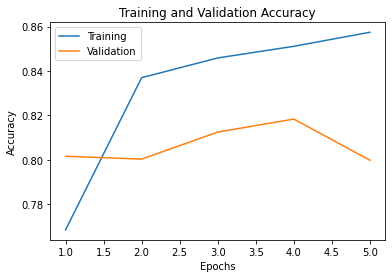


Confusion Matrix
----------------


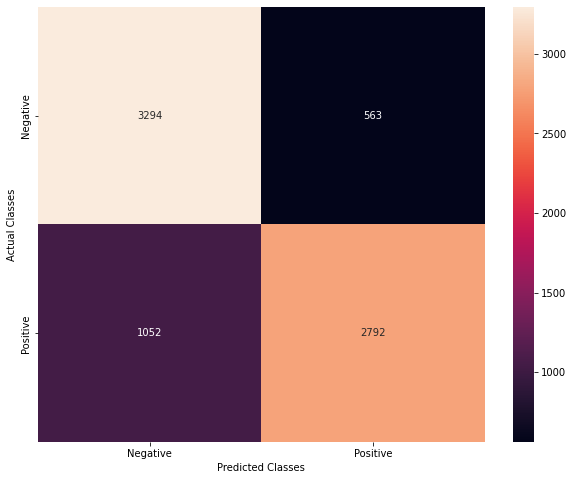


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/RNN_300_Dims_1_Layers_1_Units/assets

Word Embedding Dims: 300
RNN Layers: 1
RNN Units: 2
-----------------------
Accuracy: 0.7884690165519714
Precision: 0.7570201754570007
Recall: 0.8485952019691467
F1: 0.8001962334422158
Total Time (s): 241.49433016777039

Model Accuracy Trend
--------------------


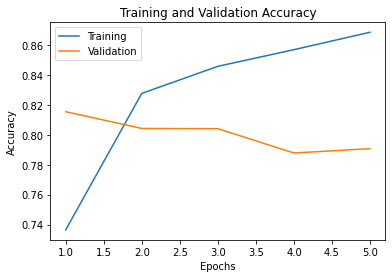


Confusion Matrix
----------------


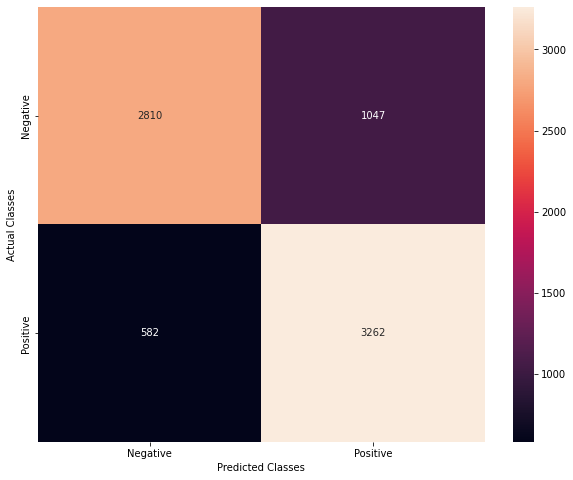


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/RNN_300_Dims_1_Layers_2_Units/assets

Word Embedding Dims: 300
RNN Layers: 1
RNN Units: 3
-----------------------
Accuracy: 0.8171666264533997
Precision: 0.838521420955658
Recall: 0.7848595380783081
F1: 0.8108035658021469
Total Time (s): 241.63473677635193

Model Accuracy Trend
--------------------


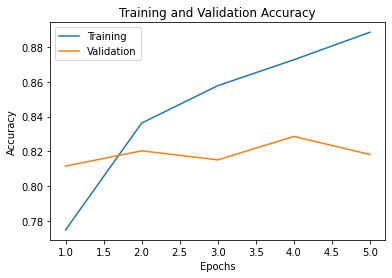


Confusion Matrix
----------------


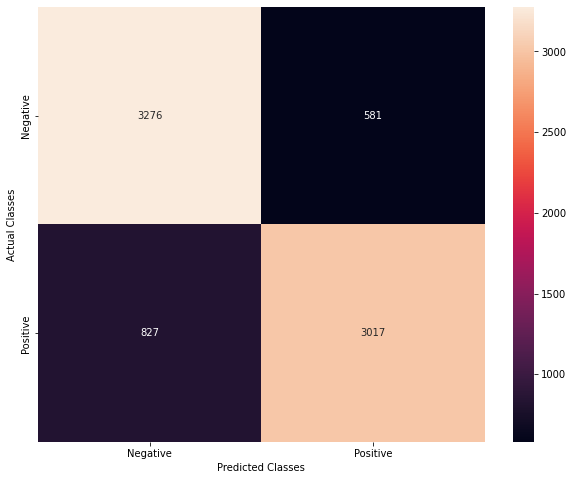


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/RNN_300_Dims_1_Layers_3_Units/assets

Word Embedding Dims: 300
RNN Layers: 1
RNN Units: 4
-----------------------
Accuracy: 0.8219711780548096
Precision: 0.8791781663894653
Recall: 0.7458376884460449
F1: 0.8070373090833944
Total Time (s): 240.14118194580078

Model Accuracy Trend
--------------------


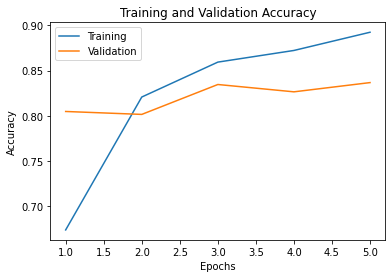


Confusion Matrix
----------------


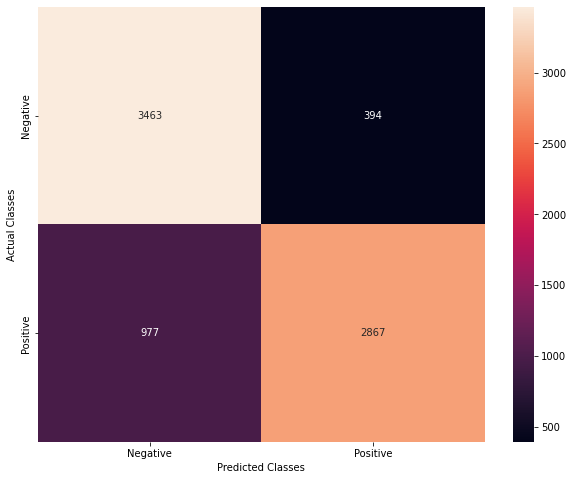


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/RNN_300_Dims_1_Layers_4_Units/assets

Word Embedding Dims: 300
RNN Layers: 1
RNN Units: 5
-----------------------
Accuracy: 0.8006752133369446
Precision: 0.9012860655784607
Recall: 0.6745577454566956
F1: 0.7716113642109909
Total Time (s): 242.0968930721283

Model Accuracy Trend
--------------------


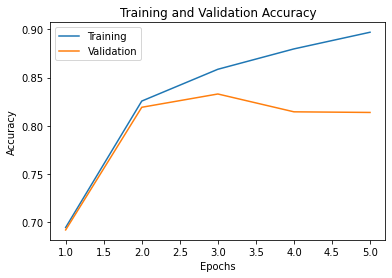


Confusion Matrix
----------------


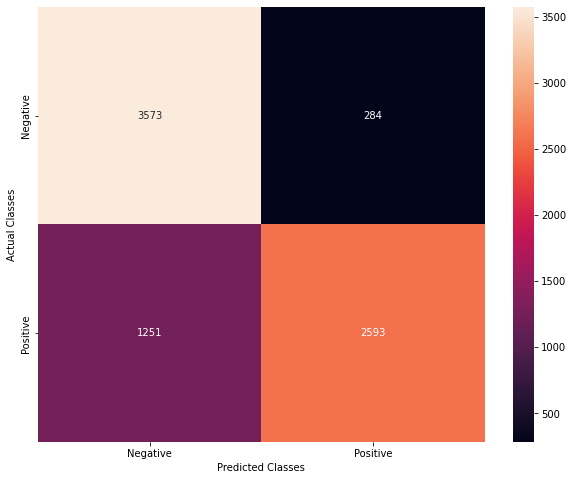


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/RNN_300_Dims_1_Layers_5_Units/assets

Word Embedding Dims: 300
RNN Layers: 1
RNN Units: 6
-----------------------
Accuracy: 0.8369042873382568
Precision: 0.8776999711990356
Recall: 0.7822580933570862
F1: 0.8272352424677945
Total Time (s): 245.65075492858887

Model Accuracy Trend
--------------------


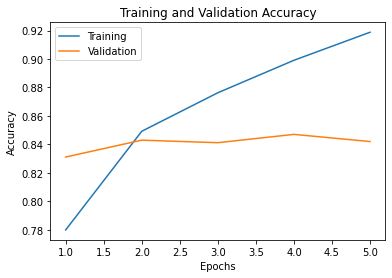


Confusion Matrix
----------------


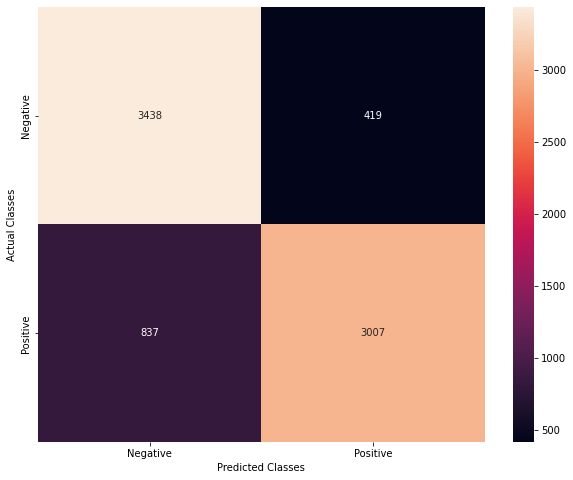


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/RNN_300_Dims_1_Layers_6_Units/assets

Word Embedding Dims: 300
RNN Layers: 1
RNN Units: 7
-----------------------
Accuracy: 0.8248279690742493
Precision: 0.8418744802474976
Recall: 0.7991675138473511
F1: 0.8199652876305824
Total Time (s): 239.6773328781128

Model Accuracy Trend
--------------------


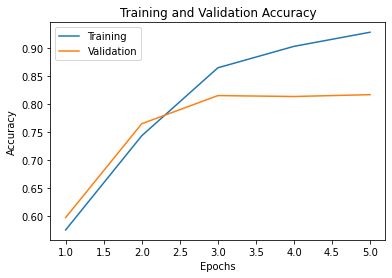


Confusion Matrix
----------------


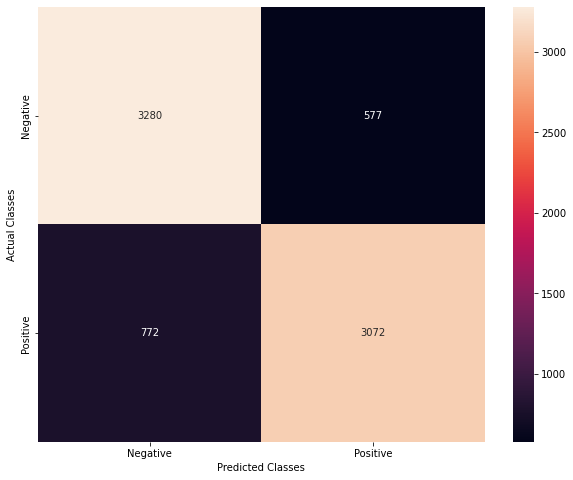


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/RNN_300_Dims_1_Layers_7_Units/assets

Word Embedding Dims: 300
RNN Layers: 1
RNN Units: 8
-----------------------
Accuracy: 0.8159978985786438
Precision: 0.880288302898407
Recall: 0.7307491898536682
F1: 0.798578514869691
Total Time (s): 244.839204788208

Model Accuracy Trend
--------------------


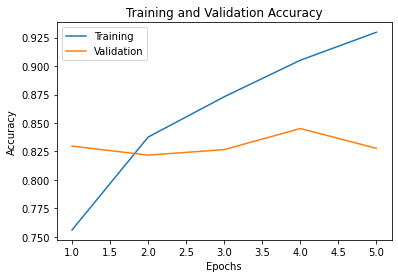


Confusion Matrix
----------------


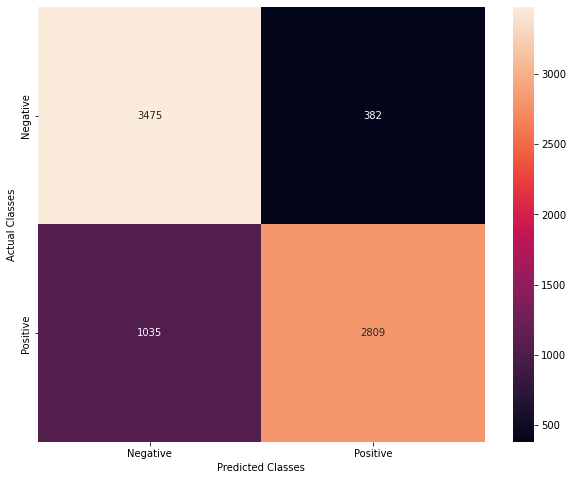


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/RNN_300_Dims_1_Layers_8_Units/assets

Word Embedding Dims: 300
RNN Layers: 1
RNN Units: 9
-----------------------
Accuracy: 0.8157382011413574
Precision: 0.8546358346939087
Recall: 0.7601456642150879
F1: 0.8046261672732097
Total Time (s): 241.46019530296326

Model Accuracy Trend
--------------------


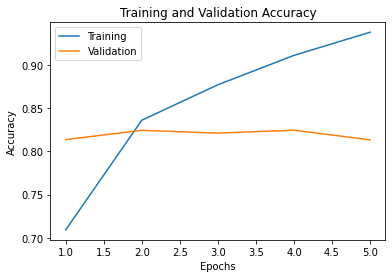


Confusion Matrix
----------------


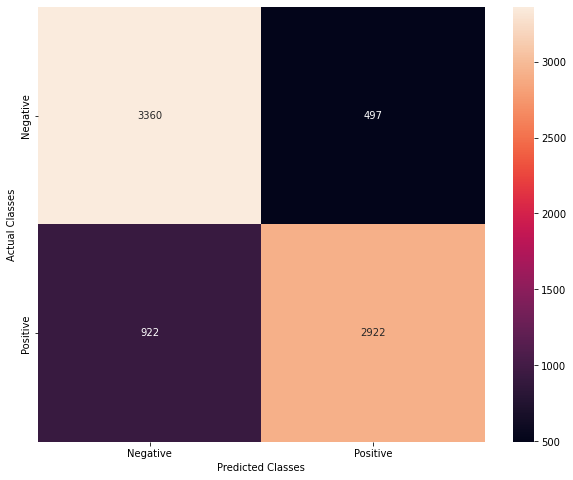


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/RNN_300_Dims_1_Layers_9_Units/assets

Word Embedding Dims: 300
RNN Layers: 1
RNN Units: 10
-----------------------
Accuracy: 0.8366445899009705
Precision: 0.7979262471199036
Recall: 0.9008845090866089
F1: 0.8462854297309974
Total Time (s): 234.39573693275452

Model Accuracy Trend
--------------------


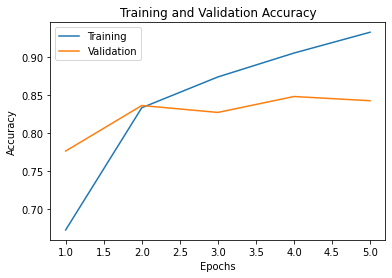


Confusion Matrix
----------------


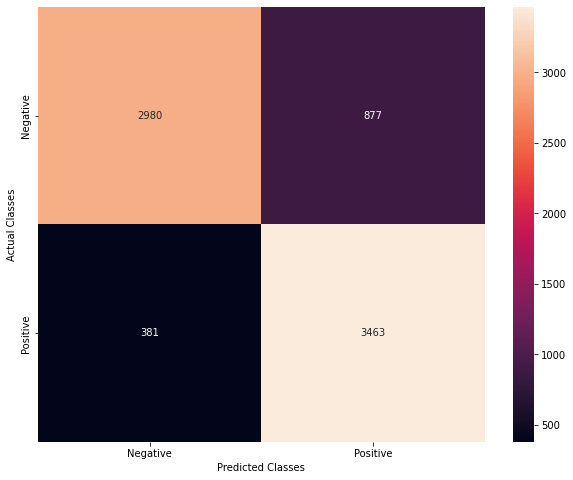


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/RNN_300_Dims_1_Layers_10_Units/assets

Word Embedding Dims: 300
RNN Layers: 1
RNN Units: 11
-----------------------
Accuracy: 0.8278145790100098
Precision: 0.8447425961494446
Recall: 0.802549421787262
F1: 0.8231056481994753
Total Time (s): 240.3130407333374

Model Accuracy Trend
--------------------


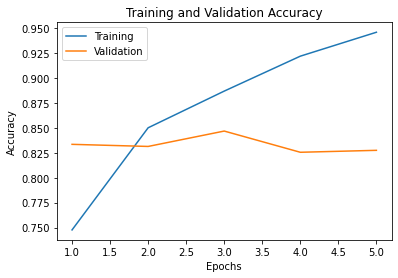


Confusion Matrix
----------------


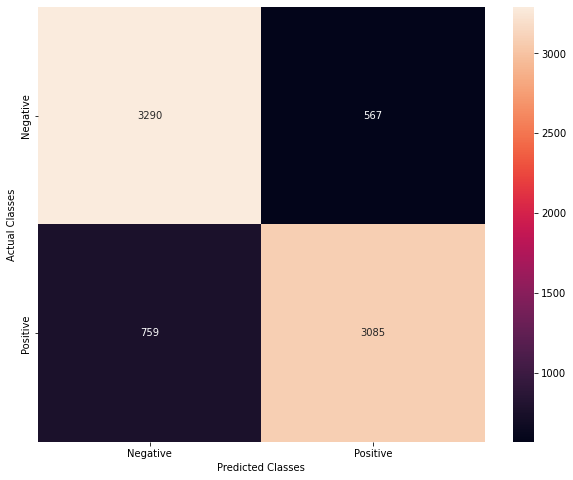


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/RNN_300_Dims_1_Layers_11_Units/assets

Word Embedding Dims: 300
RNN Layers: 1
RNN Units: 12
-----------------------
Accuracy: 0.8546941876411438
Precision: 0.8830475211143494
Recall: 0.8171175718307495
F1: 0.8488042123182443
Total Time (s): 244.32110023498535

Model Accuracy Trend
--------------------


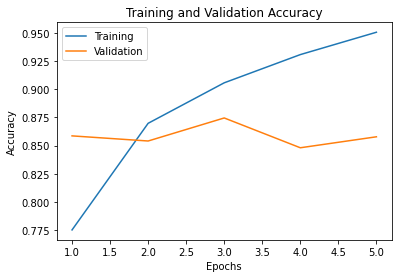


Confusion Matrix
----------------


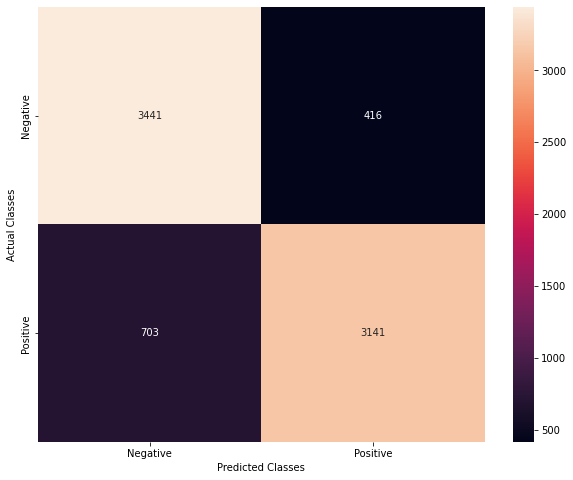


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/RNN_300_Dims_1_Layers_12_Units/assets

Word Embedding Dims: 300
RNN Layers: 1
RNN Units: 13
-----------------------
Accuracy: 0.8424879908561707
Precision: 0.8999695777893066
Recall: 0.770031213760376
F1: 0.8299453148036379
Total Time (s): 244.12007594108582

Model Accuracy Trend
--------------------


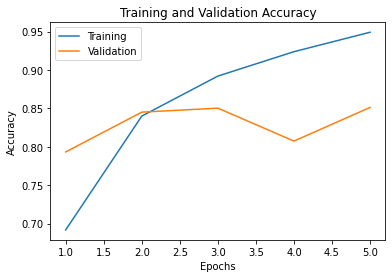


Confusion Matrix
----------------


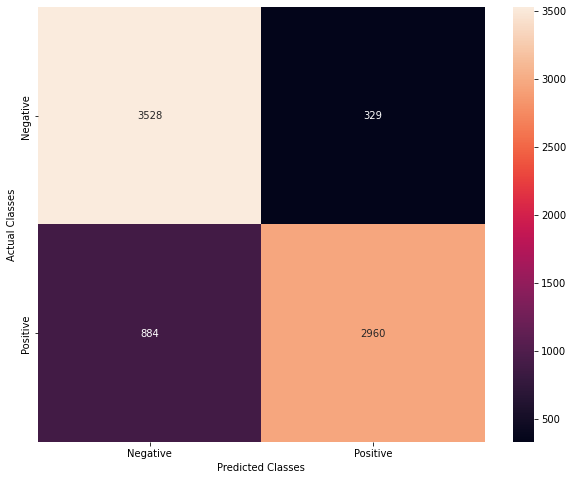


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/RNN_300_Dims_1_Layers_13_Units/assets

Word Embedding Dims: 300
RNN Layers: 1
RNN Units: 14
-----------------------
Accuracy: 0.860537588596344
Precision: 0.8860089182853699
Recall: 0.8270031213760376
F1: 0.8554897735964994
Total Time (s): 238.8802936077118

Model Accuracy Trend
--------------------


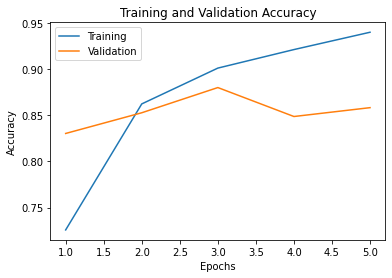


Confusion Matrix
----------------


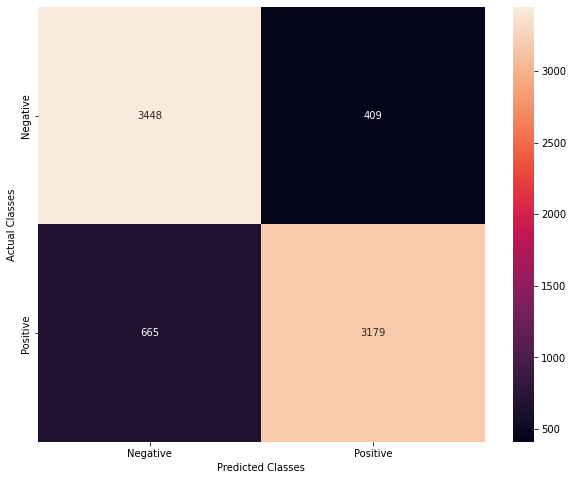


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/RNN_300_Dims_1_Layers_14_Units/assets

Word Embedding Dims: 300
RNN Layers: 1
RNN Units: 15
-----------------------
Accuracy: 0.783534586429596
Precision: 0.89310222864151
Recall: 0.6433402895927429
F1: 0.7479207840075561
Total Time (s): 230.69018959999084

Model Accuracy Trend
--------------------


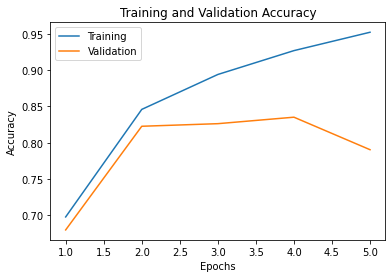


Confusion Matrix
----------------


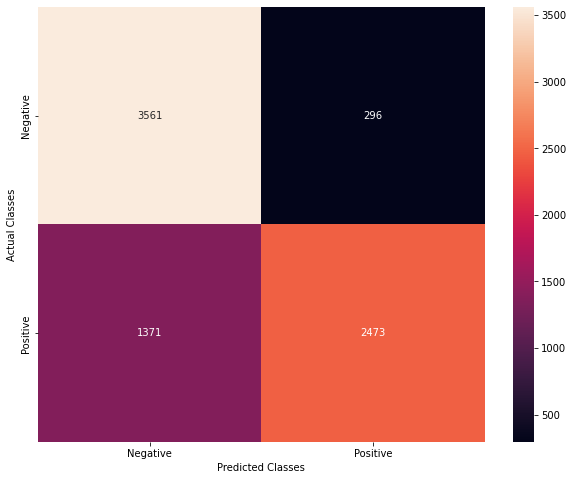


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/RNN_300_Dims_1_Layers_15_Units/assets



In [ ]:
for RNN_units in range(1,top_rnn['RNN Units']):

  dims = top_rnn['Embed_Dims']
  RNN_layers = top_rnn['RNN Layers']
  bidirectional = top_rnn['Bidirectional']
  num_epochs = 5

  start_time = time.time()

  print('Word Embedding Dims:',dims)
  print('RNN Layers:',RNN_layers)
  print('RNN Units:',RNN_units)
  print('-----------------------')

  seed(5)
  tf.random.set_seed(5)

  model = models.Sequential()
  model.add(Embedding(input_dim = voc_size, output_dim = dims, input_length = X_train_seq.shape[1]))

  if RNN_layers > 1:
                    
    for layers in range(1,RNN_layers):
      
      if bidirectional == 1:
        model.add(Bidirectional(SimpleRNN(units=RNN_units, return_sequences=True)))
      else:
        model.add(SimpleRNN(units=RNN_units, return_sequences=True))

  if bidirectional == 1:   
      model.add(Bidirectional(SimpleRNN(units=RNN_units)))
  else:    
      model.add(SimpleRNN(units=RNN_units))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['Precision','Recall','accuracy'])

  history = model.fit(X_train_seq, y_train, batch_size=128, epochs=num_epochs, validation_split=0.2, verbose=False)

  total_time = time.time() - start_time

  loss, precision, recall, accuracy = model.evaluate(X_test_seq, y_test, verbose=0)

  f1_score = (2 * precision * recall) / (precision + recall)

  print('Accuracy:',accuracy)
  print('Precision:',precision)
  print('Recall:',recall)
  print('F1:',f1_score)
  print('Total Time (s):',total_time)
  print()

  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  print('Model Accuracy Trend')
  print('--------------------')
  plot = plt.plot(range(1, len(acc) + 1), history.history['accuracy'], label = 'Training')
  plot = plt.plot(range(1, len(val_acc) + 1), history.history['val_accuracy'], label = 'Validation')
  plot = plt.title('Training and Validation Accuracy')
  plot = plt.xlabel('Epochs')
  plot = plt.ylabel('Accuracy')
  plot = plt.legend()
  plt.show()
  print()

  print('Confusion Matrix')
  print('----------------')
  pred_test = model.predict_classes(X_test_seq)

  conf_matrix = tf.math.confusion_matrix(y_test, pred_test)

  fig, ax = plt.subplots(figsize=(10,8))
  ax = sns.heatmap(conf_matrix, annot=True, fmt='g')

  ax.set_xlabel("Predicted Classes")
  ax.set_ylabel("Actual Classes")
  ax.set_xticklabels(['Negative','Positive'])
  ax.set_yticklabels(['Negative','Positive'], va='center')
  plt.show()
  print()

  if bidirectional == 1:   
      model_name = 'RNN_{}_Dims_{}_Bidirectional_{}_Units'.format(dims,RNN_layers,RNN_units)
  else:    
      model_name = 'RNN_{}_Dims_{}_Layers_{}_Units'.format(dims,RNN_layers,RNN_units)

  model.save('/content/drive/MyDrive/Research Assignment 4/'+model_name)
  print()

  rnn_results = rnn_results.append(
      {'Model':model_name,
        'Embed_Dims':dims,
        'RNN Layers':RNN_layers,
        'RNN Units':RNN_units,
        'Bidirectional':bidirectional,
        'Epochs':num_epochs,
        'Time':total_time,
        'Test Accuracy':accuracy,
        'Test Precision':precision,
        'Test Recall':recall,
        'Test F1':f1_score
      }, ignore_index=True)
  
  rnn_results.to_csv('/content/drive/MyDrive/Research Assignment 4/'+'RNN_Results.csv')

#### Reduce Word Embedding Dimensions

Word Embedding Dims: 1
RNN Layers: 1
RNN Units: 16
-----------------------
Accuracy: 0.8515776991844177
Precision: 0.8884095549583435
Recall: 0.8035899996757507
F1: 0.8438737847484815
Total Time (s): 192.87189722061157

Model Accuracy Trend
--------------------


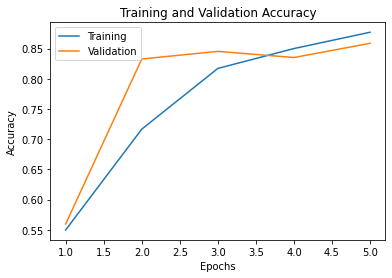


Confusion Matrix
----------------


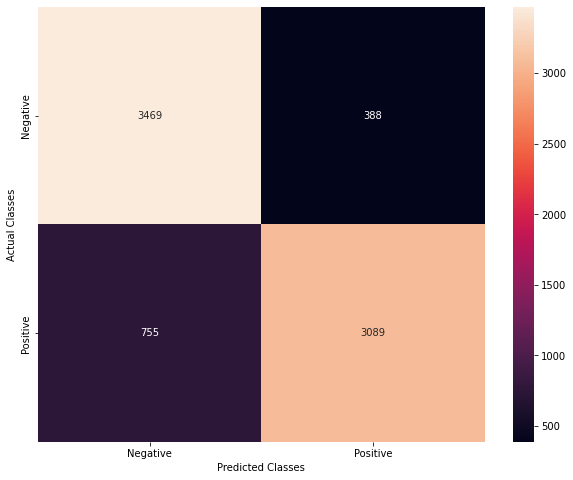


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/RNN_1_Dims_1_Layers_16_Units/assets

Word Embedding Dims: 2
RNN Layers: 1
RNN Units: 16
-----------------------
Accuracy: 0.8213219046592712
Precision: 0.9284722208976746
Recall: 0.6956295371055603
F1: 0.7953598942377778
Total Time (s): 194.5131118297577

Model Accuracy Trend
--------------------


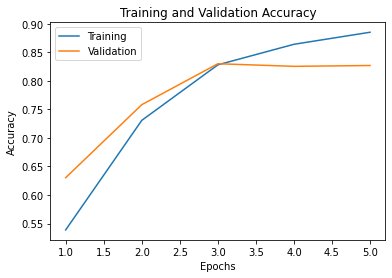


Confusion Matrix
----------------


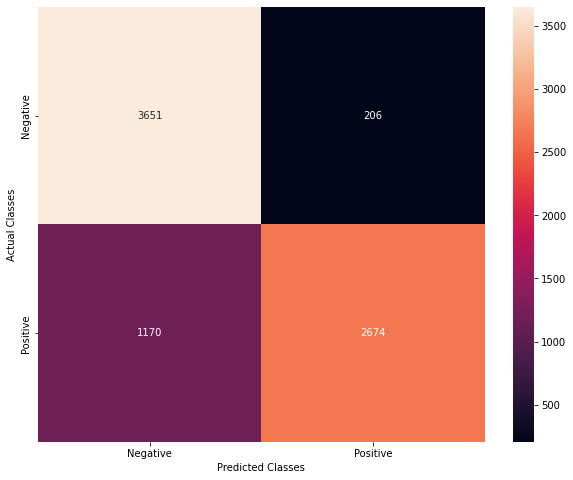


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/RNN_2_Dims_1_Layers_16_Units/assets

Word Embedding Dims: 4
RNN Layers: 1
RNN Units: 16
-----------------------
Accuracy: 0.8556031584739685
Precision: 0.8863122463226318
Recall: 0.8152965903282166
F1: 0.8493225197575244
Total Time (s): 195.57575750350952

Model Accuracy Trend
--------------------


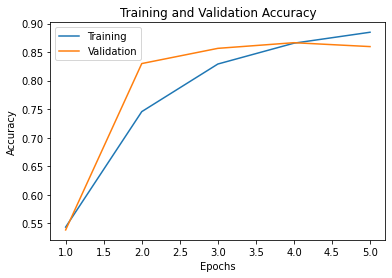


Confusion Matrix
----------------


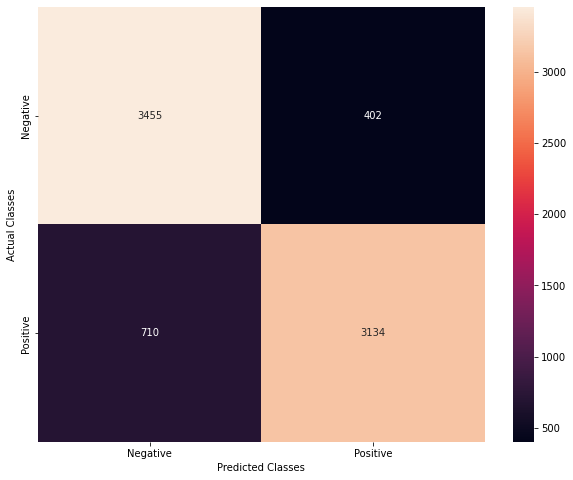


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/RNN_4_Dims_1_Layers_16_Units/assets

Word Embedding Dims: 8
RNN Layers: 1
RNN Units: 16
-----------------------
Accuracy: 0.7678223848342896
Precision: 0.9469565153121948
Recall: 0.5665972828865051
F1: 0.7089843641185527
Total Time (s): 193.8862292766571

Model Accuracy Trend
--------------------


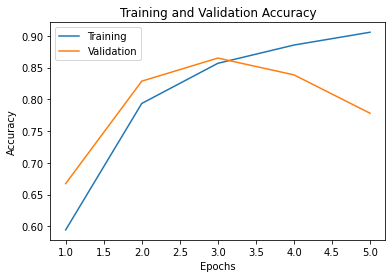


Confusion Matrix
----------------


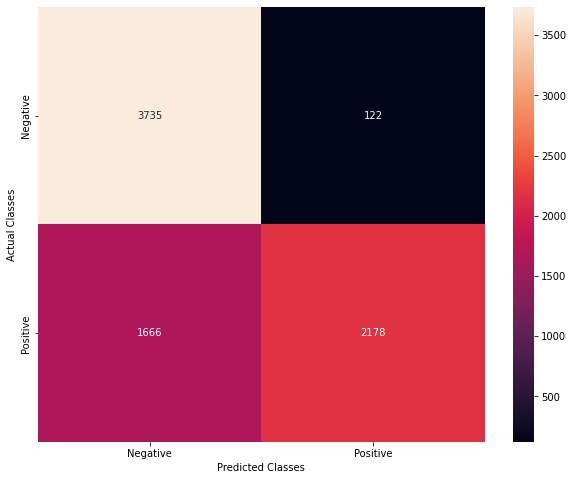


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/RNN_8_Dims_1_Layers_16_Units/assets

Word Embedding Dims: 16
RNN Layers: 1
RNN Units: 16
-----------------------
Accuracy: 0.8291131258010864
Precision: 0.9247311949729919
Recall: 0.7159209251403809
F1: 0.8070381337946112
Total Time (s): 195.1992106437683

Model Accuracy Trend
--------------------


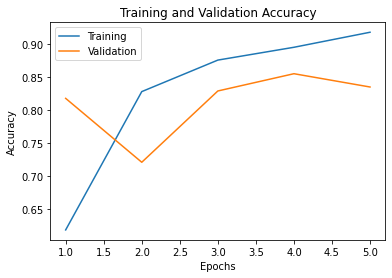


Confusion Matrix
----------------


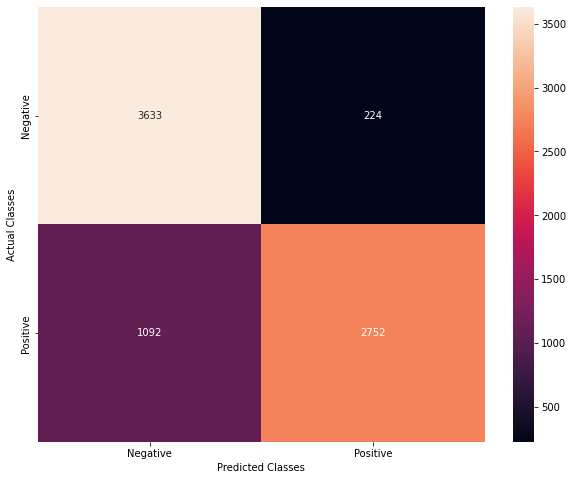


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/RNN_16_Dims_1_Layers_16_Units/assets

Word Embedding Dims: 32
RNN Layers: 1
RNN Units: 16
-----------------------
Accuracy: 0.8075574636459351
Precision: 0.8819534182548523
Recall: 0.7094172835350037
F1: 0.7863321820353455
Total Time (s): 194.80101490020752

Model Accuracy Trend
--------------------


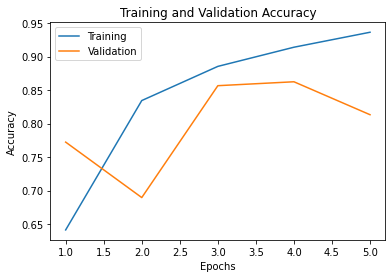


Confusion Matrix
----------------


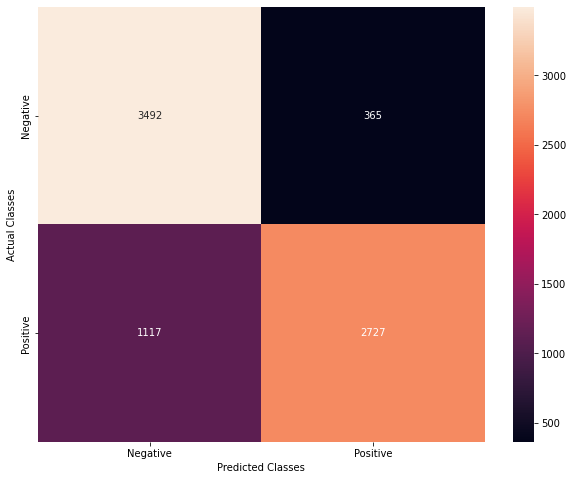


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/RNN_32_Dims_1_Layers_16_Units/assets

Word Embedding Dims: 64
RNN Layers: 1
RNN Units: 16
-----------------------
Accuracy: 0.8571614027023315
Precision: 0.9014043211936951
Recall: 0.8015088438987732
F1: 0.8485265722002755
Total Time (s): 207.1338381767273

Model Accuracy Trend
--------------------


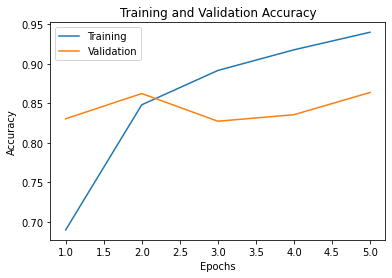


Confusion Matrix
----------------


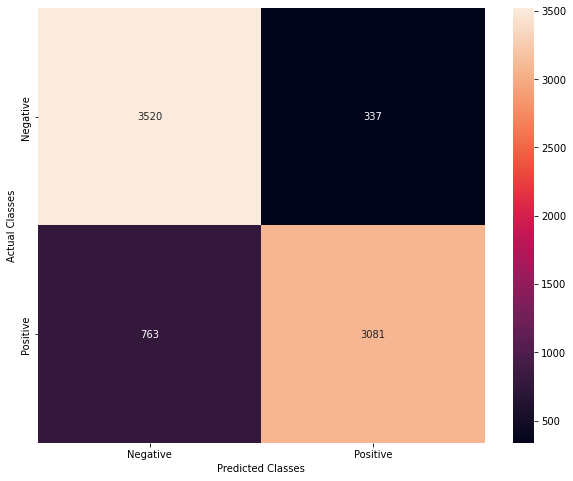


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/RNN_64_Dims_1_Layers_16_Units/assets



In [ ]:
for dims in [1,2,4,8,16,32,64]:

  RNN_units = top_rnn['RNN Units']
  RNN_layers = top_rnn['RNN Layers']
  bidirectional = top_rnn['Bidirectional']
  num_epochs = 5

  start_time = time.time()

  print('Word Embedding Dims:',dims)
  print('RNN Layers:',RNN_layers)
  print('RNN Units:',RNN_units)
  print('-----------------------')

  seed(5)
  tf.random.set_seed(5)

  model = models.Sequential()
  model.add(Embedding(input_dim = voc_size, output_dim = dims, input_length = X_train_seq.shape[1]))

  if RNN_layers > 1:
                    
    for layers in range(1,RNN_layers):
      
      if bidirectional == 1:
        model.add(Bidirectional(SimpleRNN(units=RNN_units, return_sequences=True)))
      else:
        model.add(SimpleRNN(units=RNN_units, return_sequences=True))

  if bidirectional == 1:   
      model.add(Bidirectional(SimpleRNN(units=RNN_units)))
  else:    
      model.add(SimpleRNN(units=RNN_units))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['Precision','Recall','accuracy'])

  history = model.fit(X_train_seq, y_train, batch_size=128, epochs=num_epochs, validation_split=0.2, verbose=False)

  total_time = time.time() - start_time

  loss, precision, recall, accuracy = model.evaluate(X_test_seq, y_test, verbose=0)

  f1_score = (2 * precision * recall) / (precision + recall)

  print('Accuracy:',accuracy)
  print('Precision:',precision)
  print('Recall:',recall)
  print('F1:',f1_score)
  print('Total Time (s):',total_time)
  print()

  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  print('Model Accuracy Trend')
  print('--------------------')
  plot = plt.plot(range(1, len(acc) + 1), history.history['accuracy'], label = 'Training')
  plot = plt.plot(range(1, len(val_acc) + 1), history.history['val_accuracy'], label = 'Validation')
  plot = plt.title('Training and Validation Accuracy')
  plot = plt.xlabel('Epochs')
  plot = plt.ylabel('Accuracy')
  plot = plt.legend()
  plt.show()
  print()

  print('Confusion Matrix')
  print('----------------')
  pred_test = model.predict_classes(X_test_seq)

  conf_matrix = tf.math.confusion_matrix(y_test, pred_test)

  fig, ax = plt.subplots(figsize=(10,8))
  ax = sns.heatmap(conf_matrix, annot=True, fmt='g')

  ax.set_xlabel("Predicted Classes")
  ax.set_ylabel("Actual Classes")
  ax.set_xticklabels(['Negative','Positive'])
  ax.set_yticklabels(['Negative','Positive'], va='center')
  plt.show()
  print()

  if bidirectional == 1:   
      model_name = 'RNN_{}_Dims_{}_Bidirectional_{}_Units'.format(dims,RNN_layers,RNN_units)
  else:    
      model_name = 'RNN_{}_Dims_{}_Layers_{}_Units'.format(dims,RNN_layers,RNN_units)

  model.save('/content/drive/MyDrive/Research Assignment 4/'+model_name)
  print()

  rnn_results = rnn_results.append(
      {'Model':model_name,
        'Embed_Dims':dims,
        'RNN Layers':RNN_layers,
        'RNN Units':RNN_units,
        'Bidirectional':bidirectional,
        'Epochs':num_epochs,
        'Time':total_time,
        'Test Accuracy':accuracy,
        'Test Precision':precision,
        'Test Recall':recall,
        'Test F1':f1_score
      }, ignore_index=True)
  
  rnn_results.to_csv('/content/drive/MyDrive/Research Assignment 4/'+'RNN_Results.csv')

Word Embedding Dims: 1
RNN Layers: 1
RNN Units: 8
-----------------------
Accuracy: 0.8504090309143066
Precision: 0.8834757804870605
Recall: 0.806711733341217
F1: 0.8433505423636827
Total Time (s): 198.19484329223633

Model Accuracy Trend
--------------------


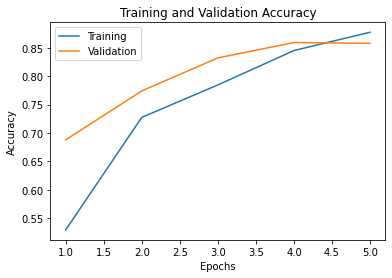


Confusion Matrix
----------------


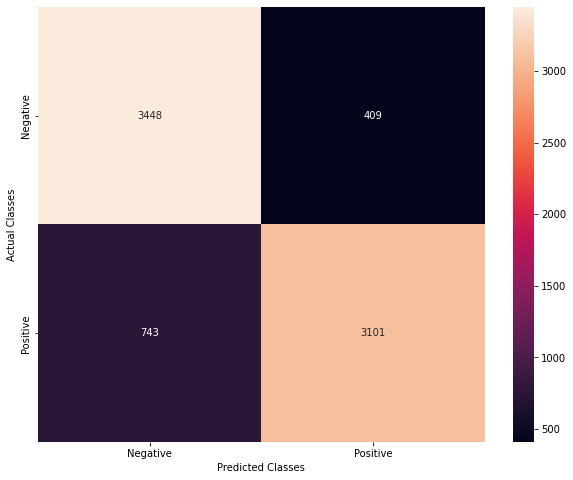


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/RNN_1_Dims_1_Layers_8_Units/assets

Word Embedding Dims: 2
RNN Layers: 1
RNN Units: 8
-----------------------
Accuracy: 0.8022334575653076
Precision: 0.9427699446678162
Recall: 0.6428200006484985
F1: 0.764423838878281
Total Time (s): 197.7818739414215

Model Accuracy Trend
--------------------


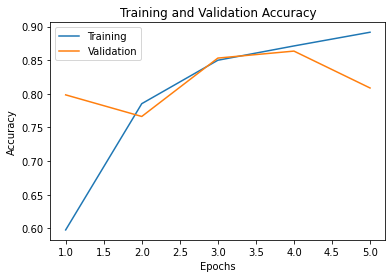


Confusion Matrix
----------------


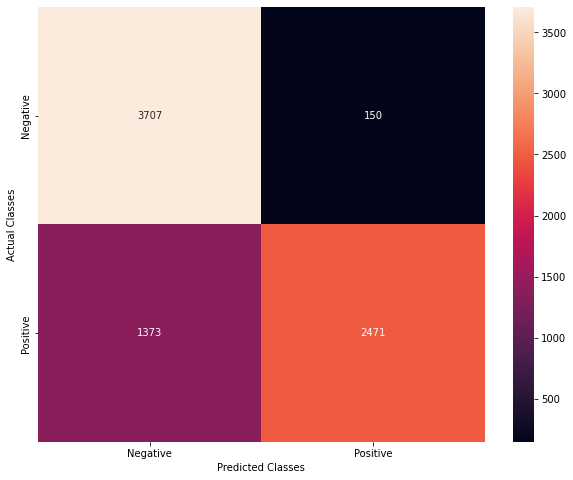


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/RNN_2_Dims_1_Layers_8_Units/assets

Word Embedding Dims: 4
RNN Layers: 1
RNN Units: 8
-----------------------
Accuracy: 0.8453447818756104
Precision: 0.8698076605796814
Recall: 0.8116545081138611
F1: 0.8397254747039624
Total Time (s): 201.54888463020325

Model Accuracy Trend
--------------------


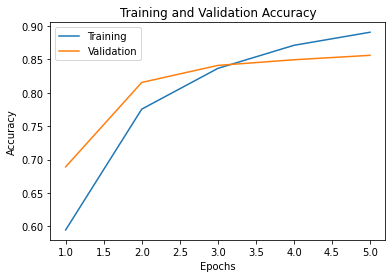


Confusion Matrix
----------------


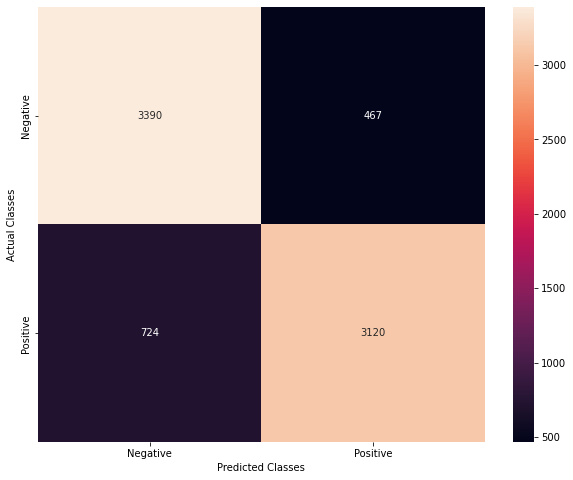


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/RNN_4_Dims_1_Layers_8_Units/assets

Word Embedding Dims: 8
RNN Layers: 1
RNN Units: 8
-----------------------
Accuracy: 0.8671600818634033
Precision: 0.8691442012786865
Recall: 0.8639438152313232
F1: 0.8665362059925739
Total Time (s): 197.23077774047852

Model Accuracy Trend
--------------------


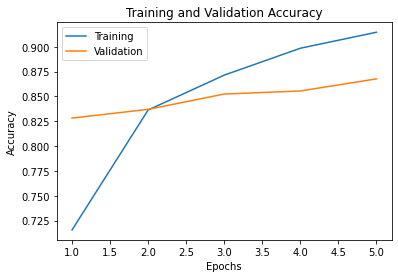


Confusion Matrix
----------------


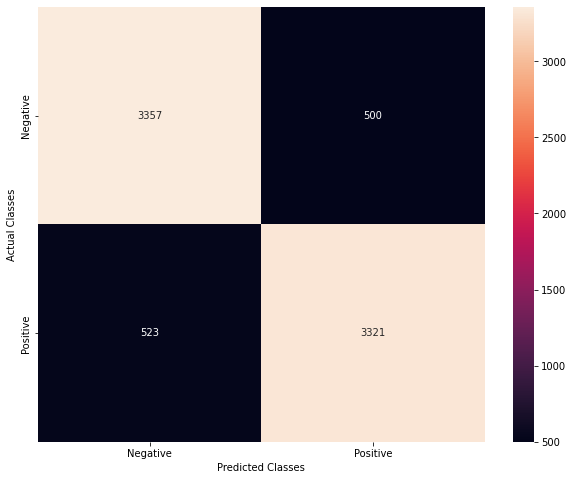


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/RNN_8_Dims_1_Layers_8_Units/assets

Word Embedding Dims: 16
RNN Layers: 1
RNN Units: 8
-----------------------
Accuracy: 0.8563823103904724
Precision: 0.815292477607727
Recall: 0.9209157228469849
F1: 0.864891274158469
Total Time (s): 197.65892910957336

Model Accuracy Trend
--------------------


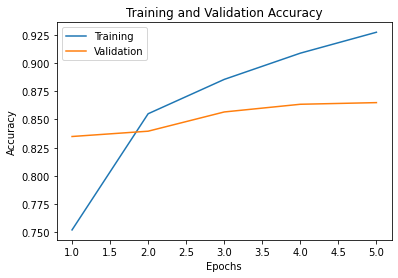


Confusion Matrix
----------------


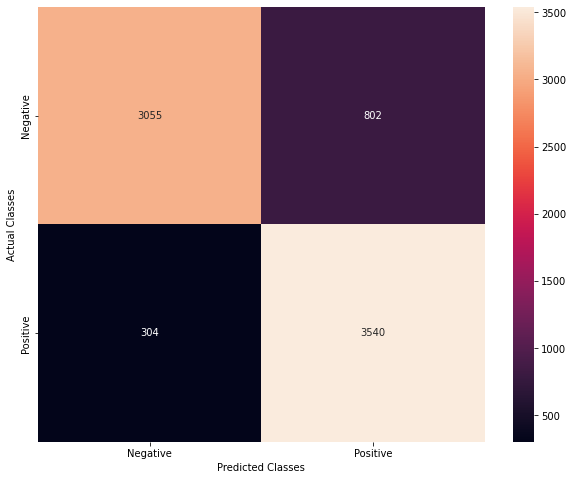


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/RNN_16_Dims_1_Layers_8_Units/assets

Word Embedding Dims: 32
RNN Layers: 1
RNN Units: 8
-----------------------
Accuracy: 0.8614465594291687
Precision: 0.8651065230369568
Recall: 0.8558793067932129
F1: 0.8604681786510979
Total Time (s): 201.05949306488037

Model Accuracy Trend
--------------------


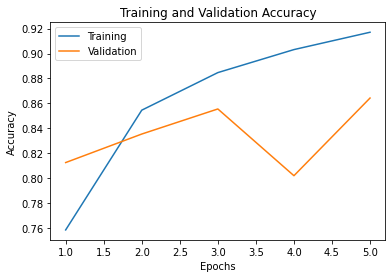


Confusion Matrix
----------------


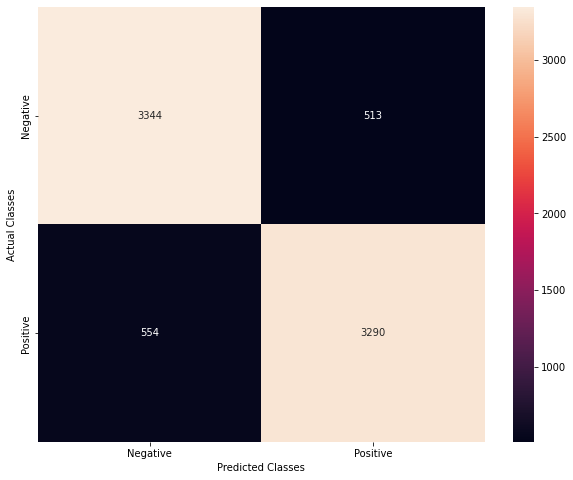


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/RNN_32_Dims_1_Layers_8_Units/assets

Word Embedding Dims: 64
RNN Layers: 1
RNN Units: 8
-----------------------
Accuracy: 0.8428775668144226
Precision: 0.8824042081832886
Recall: 0.7905827164649963
F1: 0.8339736618949953
Total Time (s): 206.7188241481781

Model Accuracy Trend
--------------------


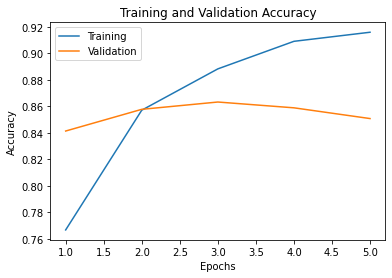


Confusion Matrix
----------------


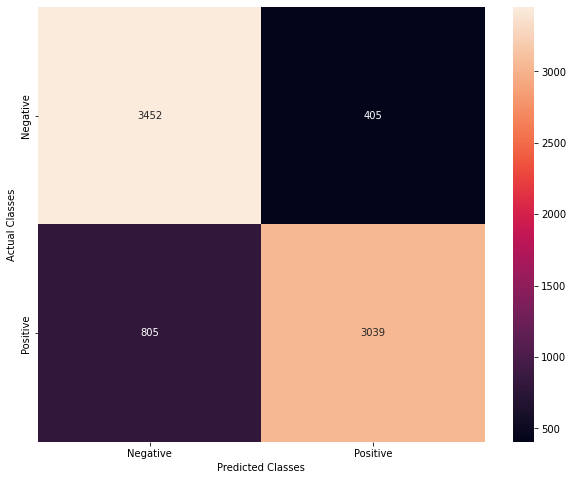


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/RNN_64_Dims_1_Layers_8_Units/assets



In [ ]:
# OLD VERSION
for dims in [1,2,4,8,16,32,64]:

  #dims = 300
  RNN_units = 8
  RNN_layers = 1
  num_epochs = 5

  start_time = time.time()

  print('Word Embedding Dims:',dims)
  print('RNN Layers:',RNN_layers)
  print('RNN Units:',RNN_units)
  print('-----------------------')

  seed(5)
  tf.random.set_seed(5)

  model = models.Sequential()
  model.add(Embedding(input_dim = voc_size, output_dim = dims, input_length = X_train_seq.shape[1]))          
  model.add(SimpleRNN(units=RNN_units))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['Precision','Recall','accuracy'])

  history = model.fit(X_train_seq, y_train, batch_size=128, epochs=num_epochs, validation_split=0.2, verbose=False)

  total_time = time.time() - start_time

  loss, precision, recall, accuracy = model.evaluate(X_test_seq, y_test, verbose=0)

  f1_score = (2 * precision * recall) / (precision + recall)

  print('Accuracy:',accuracy)
  print('Precision:',precision)
  print('Recall:',recall)
  print('F1:',f1_score)
  print('Total Time (s):',total_time)
  print()

  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  print('Model Accuracy Trend')
  print('--------------------')
  plot = plt.plot(range(1, len(acc) + 1), history.history['accuracy'], label = 'Training')
  plot = plt.plot(range(1, len(val_acc) + 1), history.history['val_accuracy'], label = 'Validation')
  plot = plt.title('Training and Validation Accuracy')
  plot = plt.xlabel('Epochs')
  plot = plt.ylabel('Accuracy')
  plot = plt.legend()
  plt.show()
  print()

  print('Confusion Matrix')
  print('----------------')
  pred_test = model.predict_classes(X_test_seq)

  conf_matrix = tf.math.confusion_matrix(y_test, pred_test)

  fig, ax = plt.subplots(figsize=(10,8))
  ax = sns.heatmap(conf_matrix, annot=True, fmt='g')

  ax.set_xlabel("Predicted Classes")
  ax.set_ylabel("Actual Classes")
  ax.set_xticklabels(['Negative','Positive'])
  ax.set_yticklabels(['Negative','Positive'], va='center')
  plt.show()
  print()

  model_name = 'RNN_{}_Dims_{}_Layers_{}_Units'.format(dims,RNN_layers,RNN_units)

  model.save('/content/drive/MyDrive/Research Assignment 4/'+model_name)
  print()

  rnn_results = rnn_results.append(
      {'Model':model_name,
        'Embed_Dims':dims,
        'RNN Layers':RNN_layers,
        'RNN Units':RNN_units,
        'Epochs':num_epochs,
        'Time':total_time,
        'Test Accuracy':accuracy,
        'Test Precision':precision,
        'Test Recall':recall,
        'Test F1':f1_score
      }, ignore_index=True)
  
  rnn_results.to_csv('/content/drive/MyDrive/Research Assignment 4/'+'RNN_Results.csv')

### RNN Summary

In [4]:
rnn_results = pd.read_csv('/content/drive/MyDrive/Research Assignment 4/RNN_Results.csv', header=0, index_col=0)
rnn_results.sort_values(by='Test F1',ascending=False).head()

Model  Embed_Dims  ...  Test Recall   Test F1
19         RNN_300_Dims_1_Layers_16_Units         300  ...     0.884495  0.862178
85         RNN_300_Dims_1_Layers_14_Units         300  ...     0.827003  0.855490
23  RNN_500_Dims_1_Bidirectional_16_Units         500  ...     0.837929  0.853245
89           RNN_4_Dims_1_Layers_16_Units           4  ...     0.815297  0.849323
83         RNN_300_Dims_1_Layers_12_Units         300  ...     0.817118  0.848804

[5 rows x 11 columns]

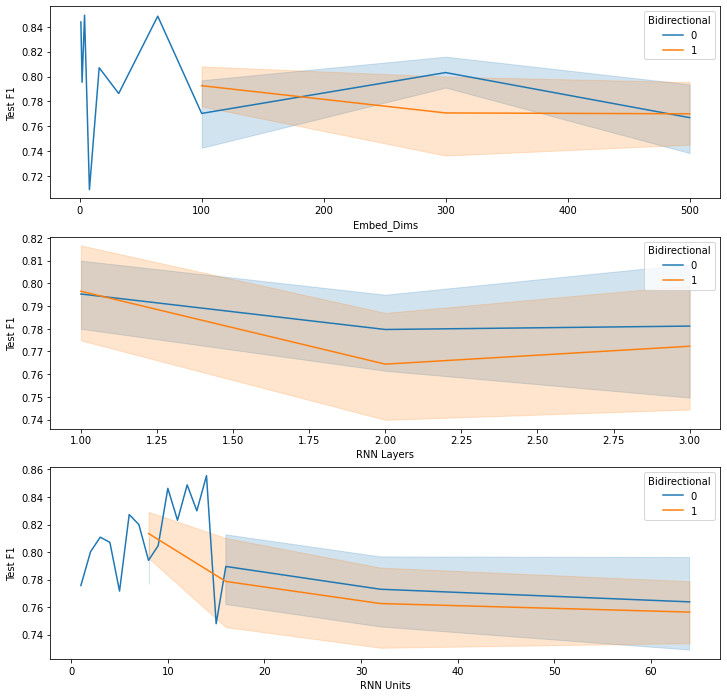

In [ ]:
plot_df = rnn_results[['Embed_Dims','RNN Layers','RNN Units','Bidirectional','Test F1']]

fig, ax = plt.subplots(3,1,figsize=(12,12))

sns.lineplot(x='Embed_Dims',y='Test F1',data=plot_df,hue='Bidirectional',ax=ax[0])
sns.lineplot(x='RNN Layers',y='Test F1',data=plot_df,hue='Bidirectional',ax=ax[1])
sns.lineplot(x='RNN Units',y='Test F1',data=plot_df,hue='Bidirectional',ax=ax[2])

## LSTM

Word Embedding Dims: 100
LSTM Layers: 1
LSTM Units: 8
-----------------------
Accuracy: 0.8770289421081543
Precision: 0.9069963693618774
Recall: 0.8397502899169922
F1: 0.8720789131948158
Total Time (s): 39.18390989303589

Model Accuracy Trend
--------------------


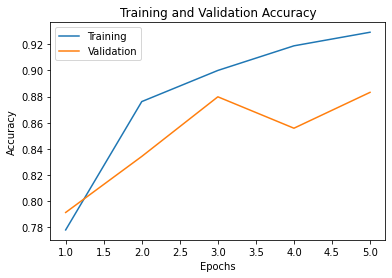


Confusion Matrix
----------------
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


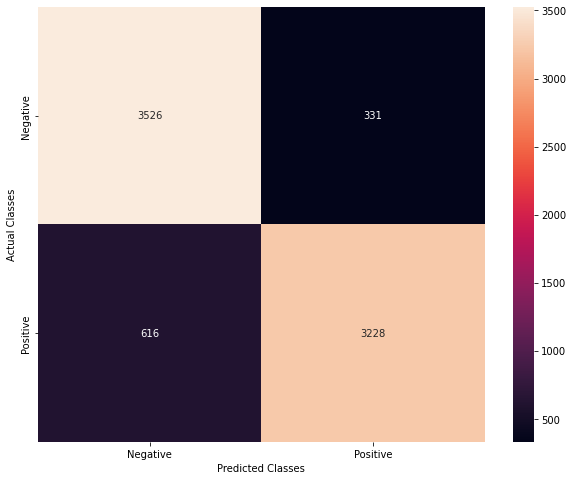


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_100_Dims_1_Layers_8_Units/assets

Word Embedding Dims: 300
LSTM Layers: 1
LSTM Units: 8
-----------------------
Accuracy: 0.8710557222366333
Precision: 0.9076350927352905
Recall: 0.8257023692131042
F1: 0.8647323015912494
Total Time (s): 53.86974763870239

Model Accuracy Trend
--------------------


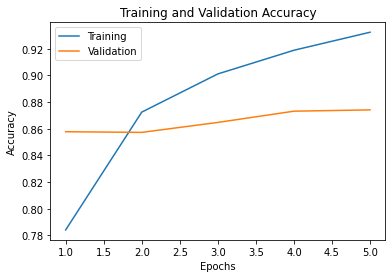


Confusion Matrix
----------------


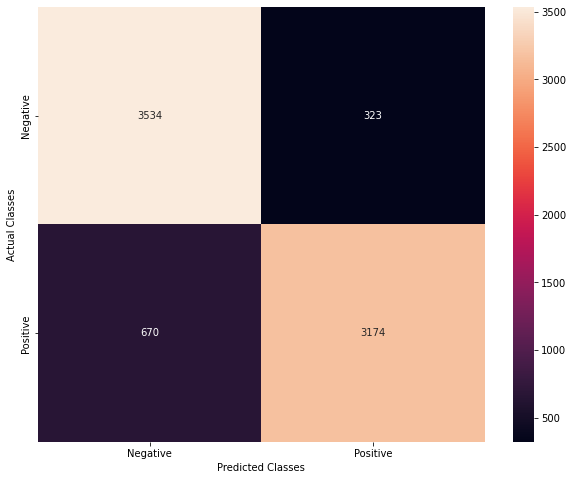


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_300_Dims_1_Layers_8_Units/assets

Word Embedding Dims: 500
LSTM Layers: 1
LSTM Units: 8
-----------------------
Accuracy: 0.8822230696678162
Precision: 0.8774093985557556
Recall: 0.8881373405456543
F1: 0.8827407766046249
Total Time (s): 80.31463885307312

Model Accuracy Trend
--------------------


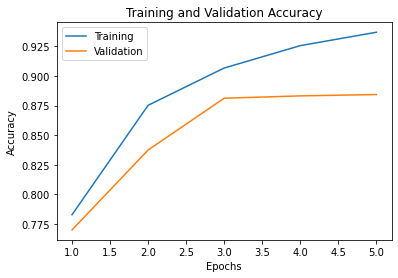


Confusion Matrix
----------------


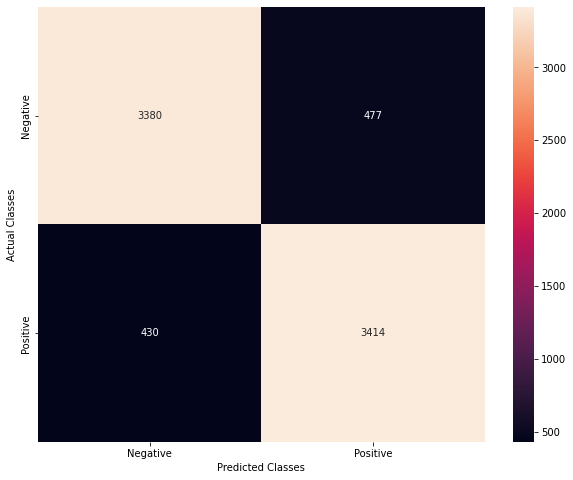


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_500_Dims_1_Layers_8_Units/assets

Word Embedding Dims: 100
LSTM Layers: 1
LSTM Units: 8
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8115829229354858
Precision: 0.9572029113769531
Recall: 0.6516649127006531
F1: 0.7754217498095535
Total Time (s): 41.56441950798035

Model Accuracy Trend
--------------------


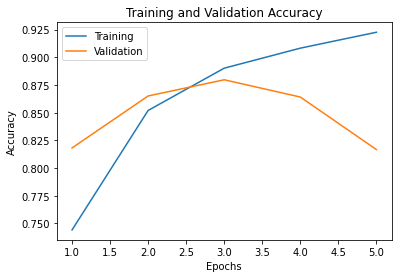


Confusion Matrix
----------------


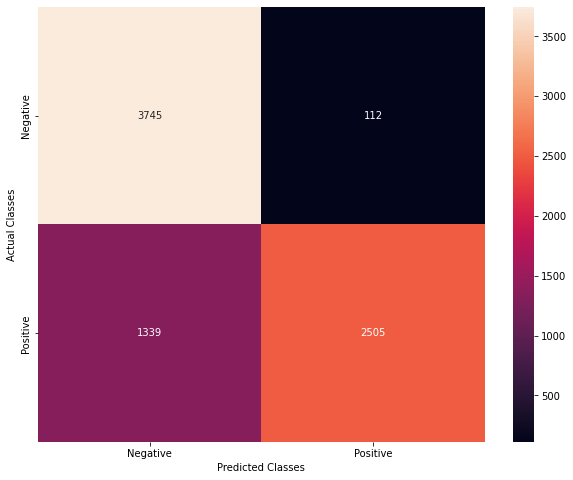


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_100_Dims_1_Bidirectional_8_Units/assets

Word Embedding Dims: 300
LSTM Layers: 1
LSTM Units: 8
Bidirectional Layer(s)
-----------------------
Accuracy: 0.7843137383460999
Precision: 0.9642705321311951
Recall: 0.5897502899169922
F1: 0.7318805743326791
Total Time (s): 68.95310378074646

Model Accuracy Trend
--------------------


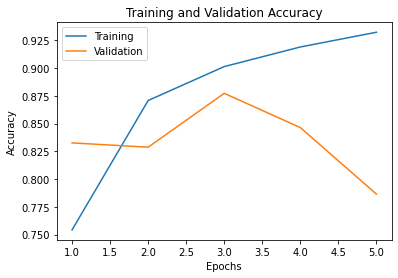


Confusion Matrix
----------------


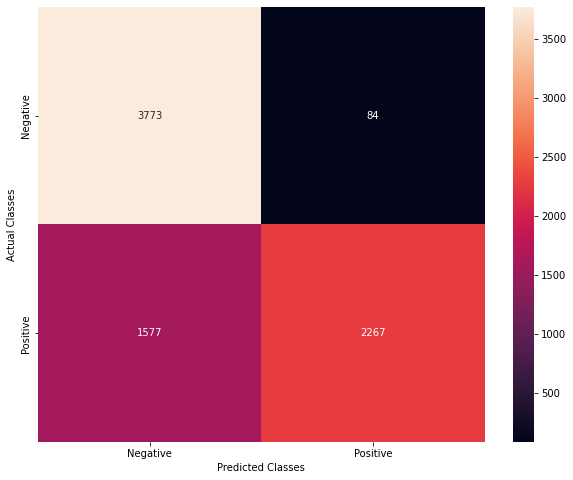


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_300_Dims_1_Bidirectional_8_Units/assets

Word Embedding Dims: 500
LSTM Layers: 1
LSTM Units: 8
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8753408789634705
Precision: 0.9148446321487427
Recall: 0.8272632956504822
F1: 0.8688524669715456
Total Time (s): 94.74117398262024

Model Accuracy Trend
--------------------


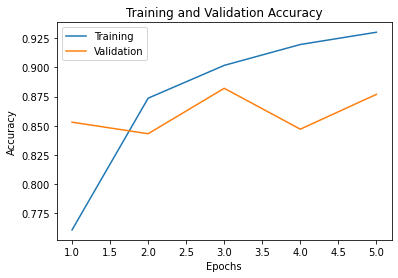


Confusion Matrix
----------------


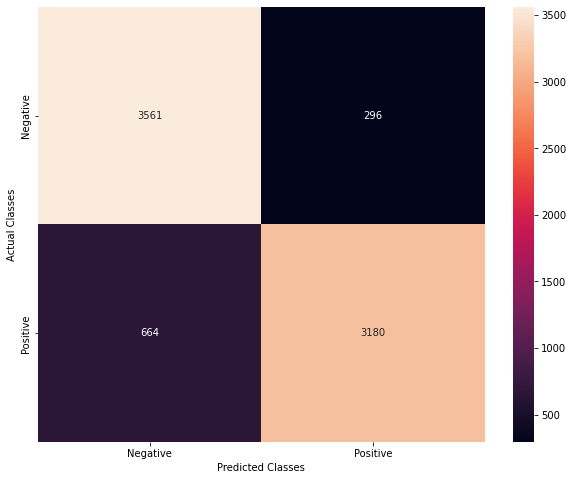


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_500_Dims_1_Bidirectional_8_Units/assets

Word Embedding Dims: 100
LSTM Layers: 2
LSTM Units: 8
-----------------------
Accuracy: 0.8056096434593201
Precision: 0.9578619003295898
Recall: 0.6386576294898987
F1: 0.766349298229196
Total Time (s): 41.37564516067505

Model Accuracy Trend
--------------------


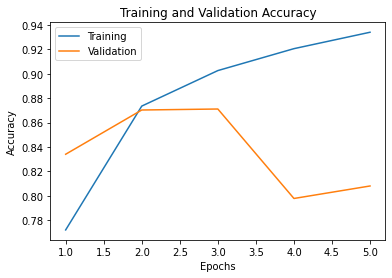


Confusion Matrix
----------------


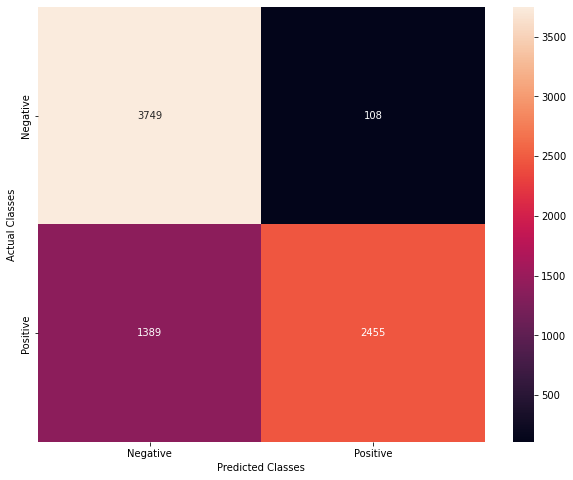


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_100_Dims_2_Layers_8_Units/assets

Word Embedding Dims: 300
LSTM Layers: 2
LSTM Units: 8
-----------------------
Accuracy: 0.8767692446708679
Precision: 0.8467065691947937
Recall: 0.9196149706840515
F1: 0.881656050983189
Total Time (s): 66.54033207893372

Model Accuracy Trend
--------------------


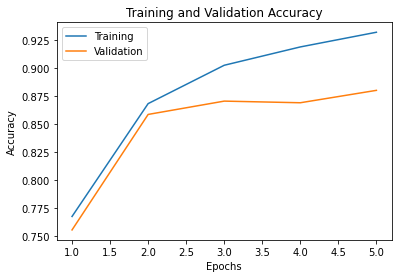


Confusion Matrix
----------------


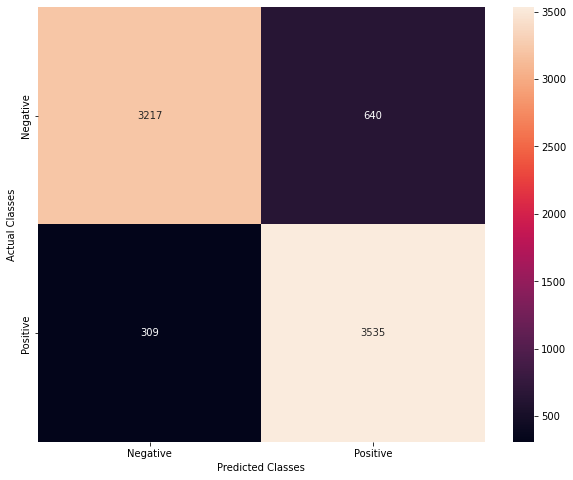


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_300_Dims_2_Layers_8_Units/assets

Word Embedding Dims: 500
LSTM Layers: 2
LSTM Units: 8
-----------------------
Accuracy: 0.8720945119857788
Precision: 0.9215570688247681
Recall: 0.8129552602767944
F1: 0.8638562599718383
Total Time (s): 91.04296278953552

Model Accuracy Trend
--------------------


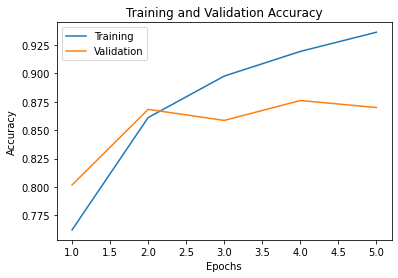


Confusion Matrix
----------------


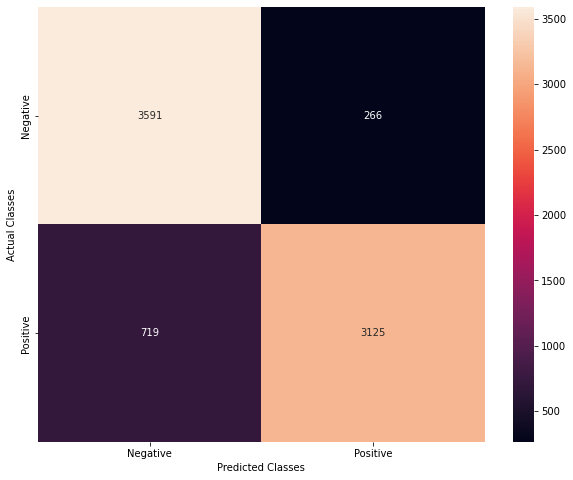


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_500_Dims_2_Layers_8_Units/assets

Word Embedding Dims: 100
LSTM Layers: 2
LSTM Units: 8
Bidirectional Layer(s)
-----------------------
Accuracy: 0.7228931188583374
Precision: 0.969264566898346
Recall: 0.45941728353500366
F1: 0.6233674687140484
Total Time (s): 67.19128394126892

Model Accuracy Trend
--------------------


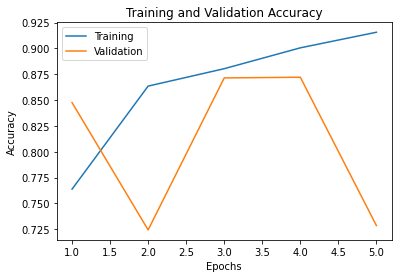


Confusion Matrix
----------------


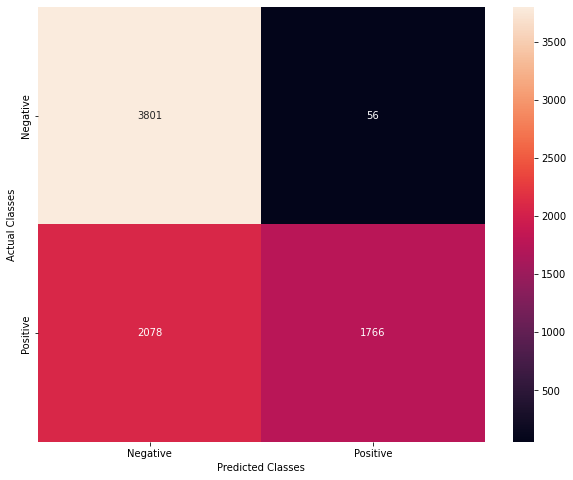


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_100_Dims_2_Bidirectional_8_Units/assets

Word Embedding Dims: 300
LSTM Layers: 2
LSTM Units: 8
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8675496578216553
Precision: 0.8887665271759033
Recall: 0.8397502899169922
F1: 0.8635634221016347
Total Time (s): 93.36960172653198

Model Accuracy Trend
--------------------


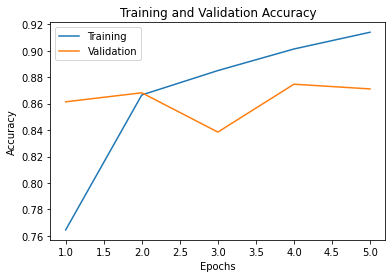


Confusion Matrix
----------------


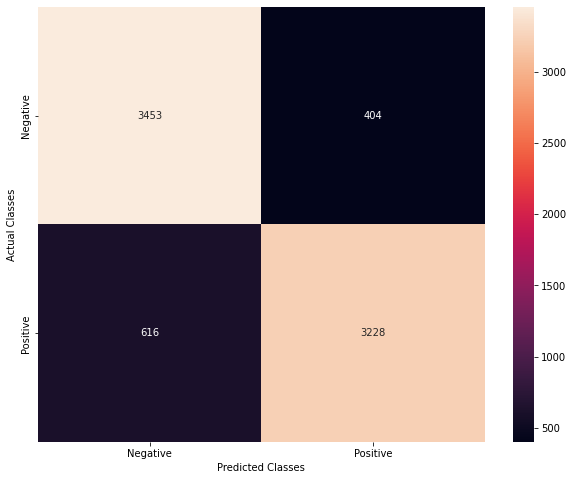


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_300_Dims_2_Bidirectional_8_Units/assets

Word Embedding Dims: 500
LSTM Layers: 2
LSTM Units: 8
Bidirectional Layer(s)
-----------------------
Accuracy: 0.796130359172821
Precision: 0.7182341814041138
Recall: 0.9734651446342468
F1: 0.8265959919948105
Total Time (s): 121.81291818618774

Model Accuracy Trend
--------------------


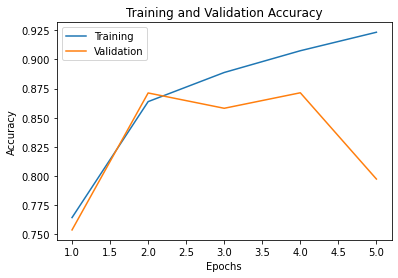


Confusion Matrix
----------------


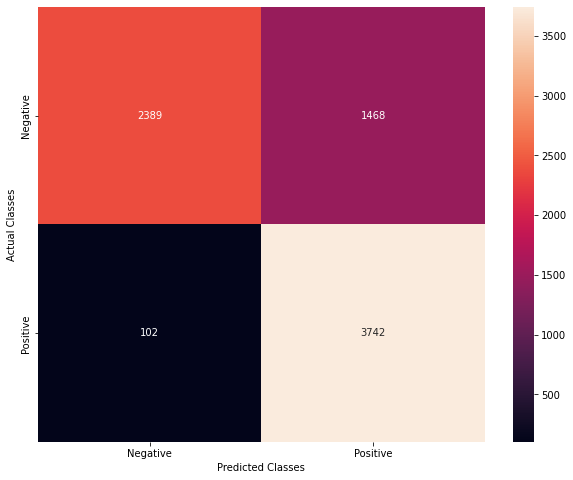


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_500_Dims_2_Bidirectional_8_Units/assets

Word Embedding Dims: 100
LSTM Layers: 3
LSTM Units: 8
-----------------------
Accuracy: 0.8344370722770691
Precision: 0.9477169513702393
Recall: 0.7073361277580261
F1: 0.8100700177494605
Total Time (s): 53.55178189277649

Model Accuracy Trend
--------------------


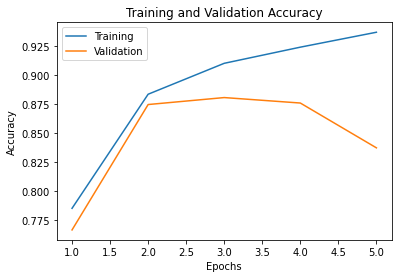


Confusion Matrix
----------------


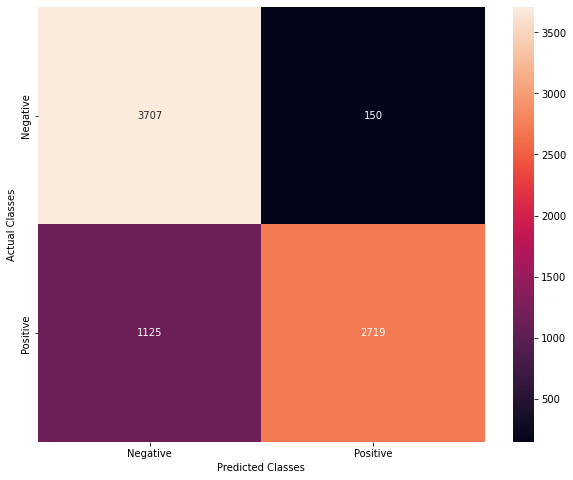


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_100_Dims_3_Layers_8_Units/assets

Word Embedding Dims: 300
LSTM Layers: 3
LSTM Units: 8
-----------------------
Accuracy: 0.8578106760978699
Precision: 0.9217551350593567
Recall: 0.7814776301383972
F1: 0.8458397856507301
Total Time (s): 78.62532210350037

Model Accuracy Trend
--------------------


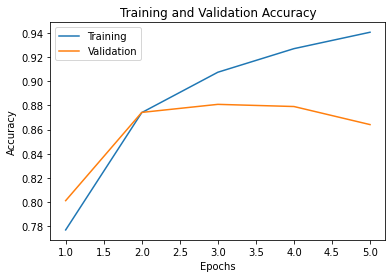


Confusion Matrix
----------------


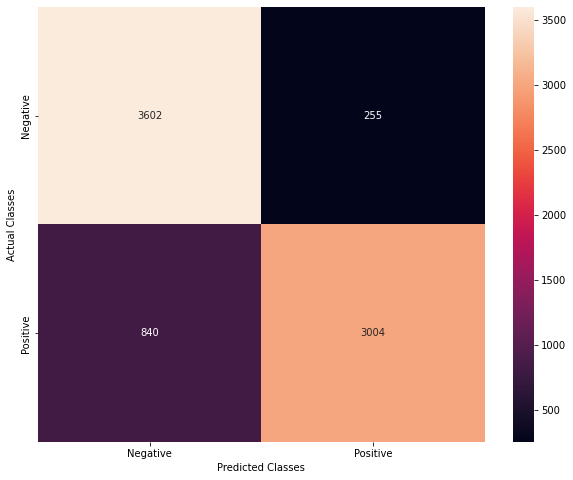


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_300_Dims_3_Layers_8_Units/assets

Word Embedding Dims: 500
LSTM Layers: 3
LSTM Units: 8
-----------------------
Accuracy: 0.864043653011322
Precision: 0.9119293093681335
Recall: 0.8054110407829285
F1: 0.8553667700337197
Total Time (s): 104.76437449455261

Model Accuracy Trend
--------------------


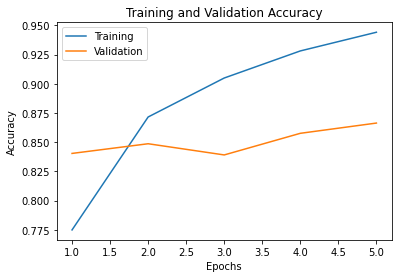


Confusion Matrix
----------------


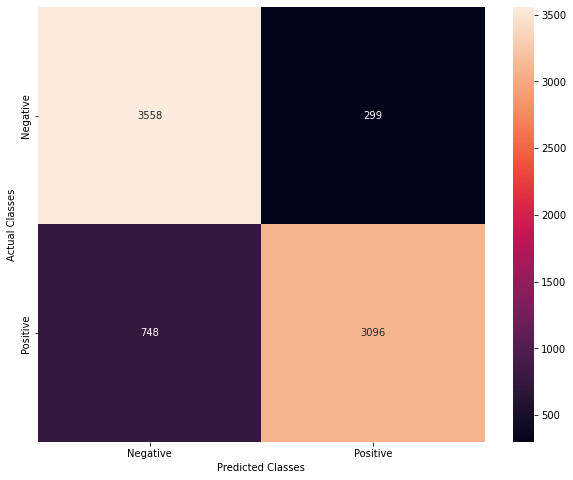


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_500_Dims_3_Layers_8_Units/assets

Word Embedding Dims: 100
LSTM Layers: 3
LSTM Units: 8
Bidirectional Layer(s)
-----------------------
Accuracy: 0.7900272607803345
Precision: 0.960314154624939
Recall: 0.6043184399604797
F1: 0.7418170295099621
Total Time (s): 92.90501046180725

Model Accuracy Trend
--------------------


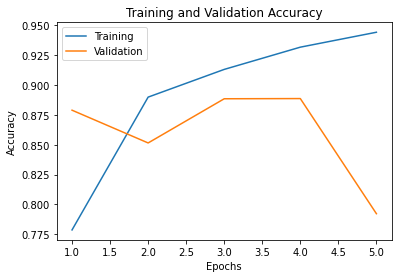


Confusion Matrix
----------------


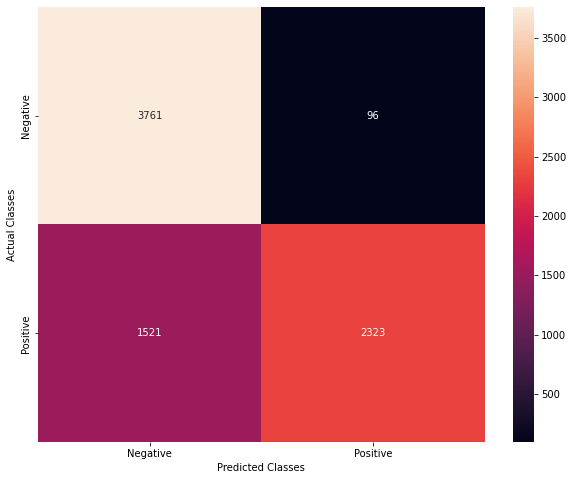


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_100_Dims_3_Bidirectional_8_Units/assets

Word Embedding Dims: 300
LSTM Layers: 3
LSTM Units: 8
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8631346821784973
Precision: 0.9169157147407532
Recall: 0.7981269359588623
F1: 0.8534074993878887
Total Time (s): 117.9973828792572

Model Accuracy Trend
--------------------


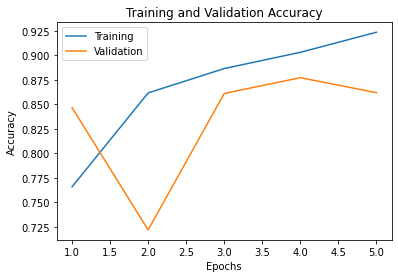


Confusion Matrix
----------------


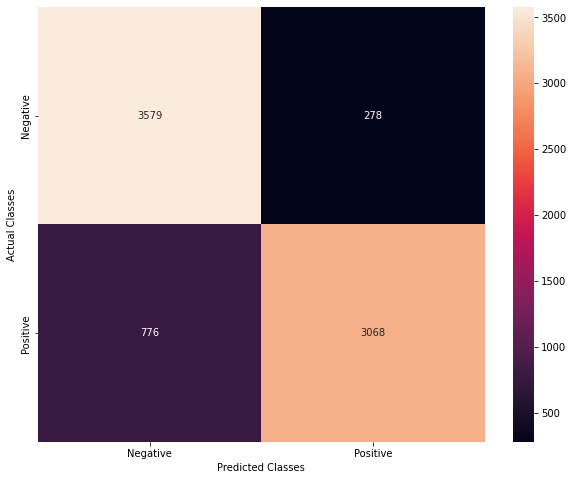


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_300_Dims_3_Bidirectional_8_Units/assets

Word Embedding Dims: 500
LSTM Layers: 3
LSTM Units: 8
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8730034828186035
Precision: 0.9057191610336304
Recall: 0.8322060108184814
F1: 0.8674078057369883
Total Time (s): 146.46108484268188

Model Accuracy Trend
--------------------


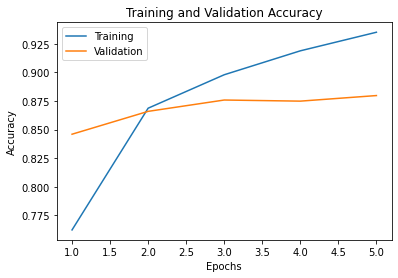


Confusion Matrix
----------------


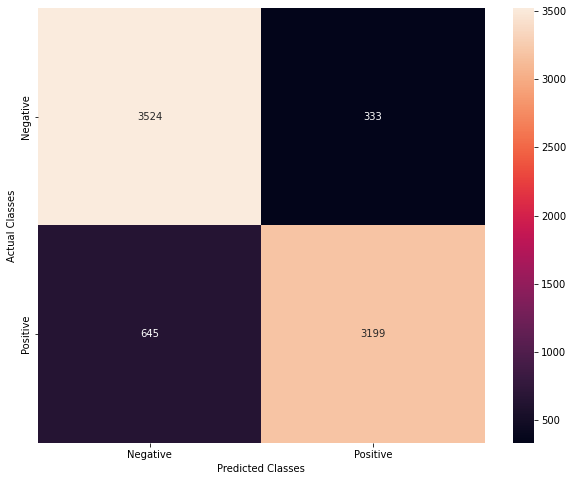


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_500_Dims_3_Bidirectional_8_Units/assets

Word Embedding Dims: 100
LSTM Layers: 1
LSTM Units: 16
-----------------------
Accuracy: 0.8544344902038574
Precision: 0.9424764513969421
Recall: 0.7544224858283997
F1: 0.838029197496266
Total Time (s): 28.845560312271118

Model Accuracy Trend
--------------------


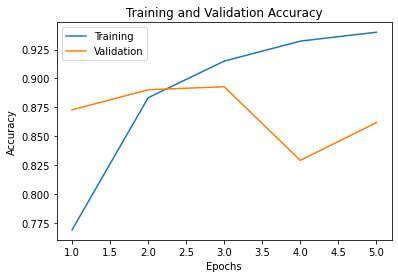


Confusion Matrix
----------------


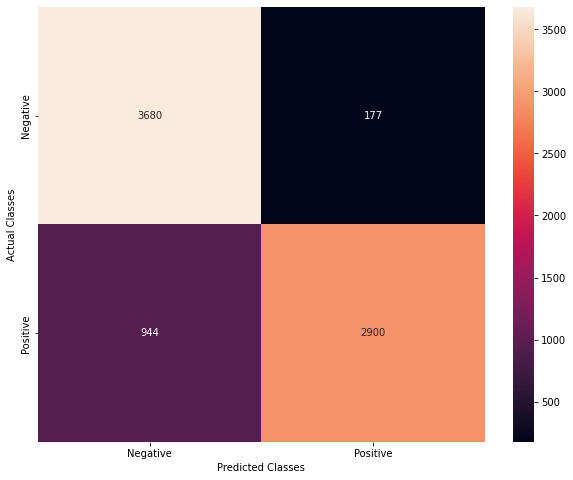


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_100_Dims_1_Layers_16_Units/assets

Word Embedding Dims: 300
LSTM Layers: 1
LSTM Units: 16
-----------------------
Accuracy: 0.8482015132904053
Precision: 0.9447954893112183
Recall: 0.7390738725662231
F1: 0.8293679745913268
Total Time (s): 55.31590485572815

Model Accuracy Trend
--------------------


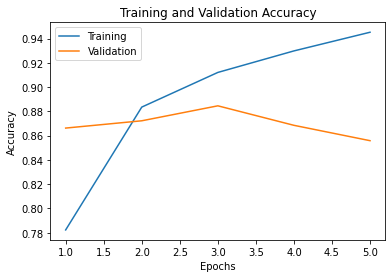


Confusion Matrix
----------------


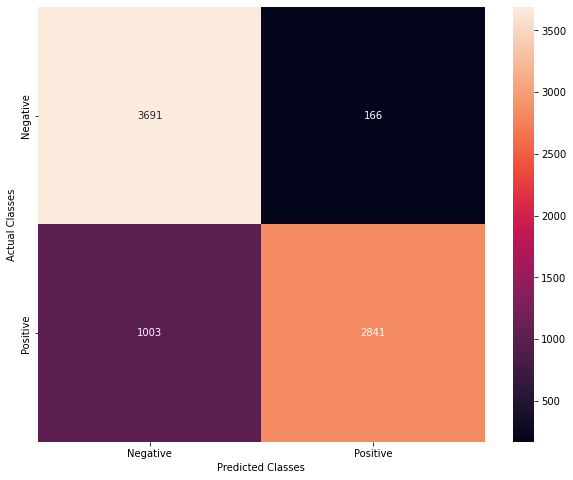


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_300_Dims_1_Layers_16_Units/assets

Word Embedding Dims: 500
LSTM Layers: 1
LSTM Units: 16
-----------------------
Accuracy: 0.8606674671173096
Precision: 0.9272278547286987
Recall: 0.7822580933570862
F1: 0.8485960291862601
Total Time (s): 81.72714948654175

Model Accuracy Trend
--------------------


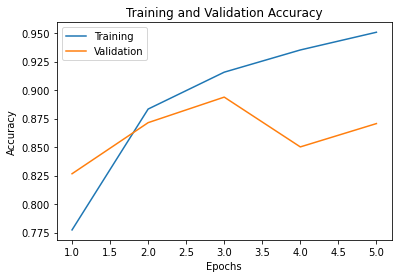


Confusion Matrix
----------------


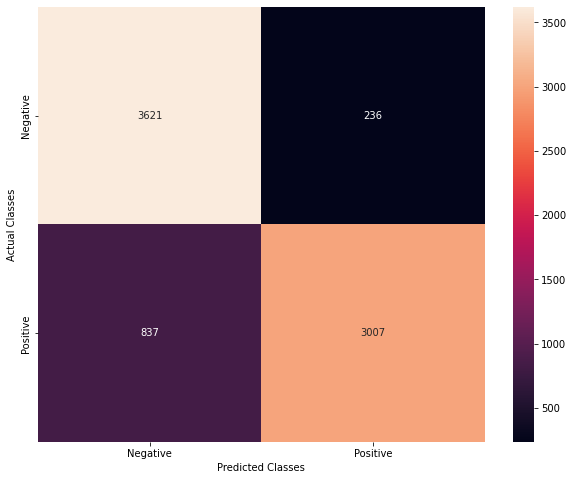


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_500_Dims_1_Layers_16_Units/assets

Word Embedding Dims: 100
LSTM Layers: 1
LSTM Units: 16
Bidirectional Layer(s)
-----------------------
Accuracy: 0.843137264251709
Precision: 0.9378737807273865
Recall: 0.7343912720680237
F1: 0.8237525716587438
Total Time (s): 42.22204041481018

Model Accuracy Trend
--------------------


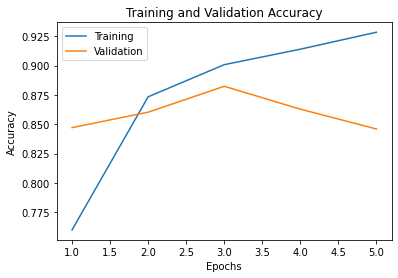


Confusion Matrix
----------------


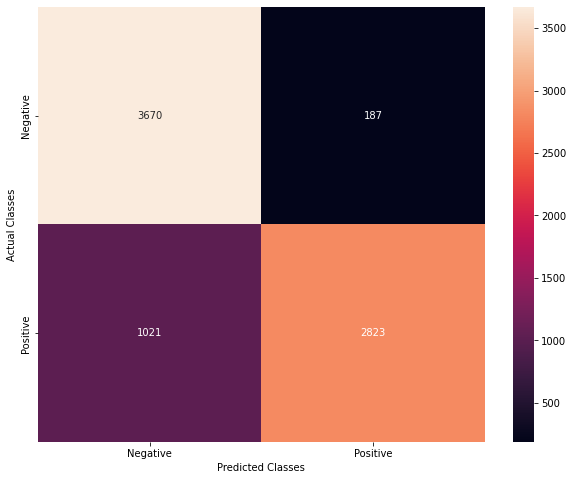


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_100_Dims_1_Bidirectional_16_Units/assets

Word Embedding Dims: 300
LSTM Layers: 1
LSTM Units: 16
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8804051280021667
Precision: 0.902063250541687
Recall: 0.8530176877975464
F1: 0.8768551824764669
Total Time (s): 68.62471175193787

Model Accuracy Trend
--------------------


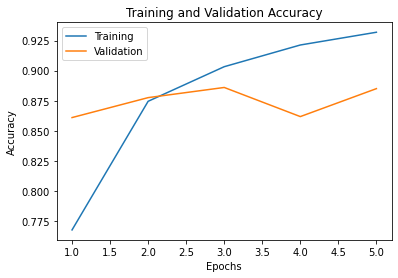


Confusion Matrix
----------------


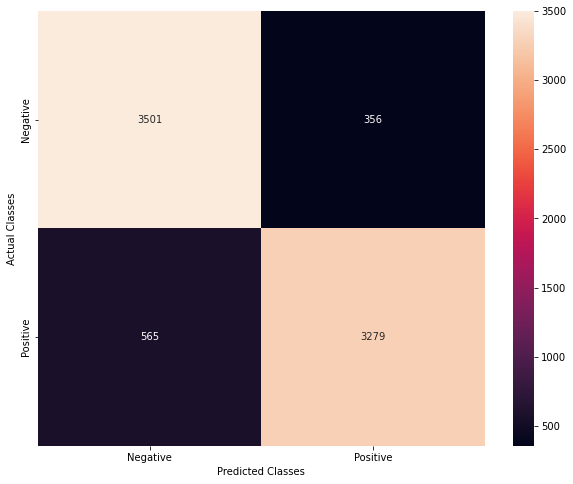


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_300_Dims_1_Bidirectional_16_Units/assets

Word Embedding Dims: 500
LSTM Layers: 1
LSTM Units: 16
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8606674671173096
Precision: 0.9331040978431702
Recall: 0.7765348553657532
F1: 0.8476501477692885
Total Time (s): 96.54288125038147

Model Accuracy Trend
--------------------


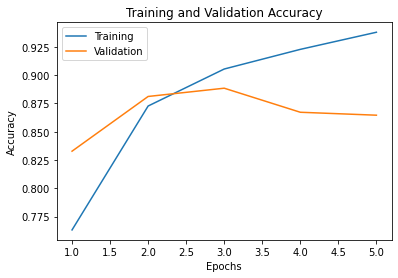


Confusion Matrix
----------------


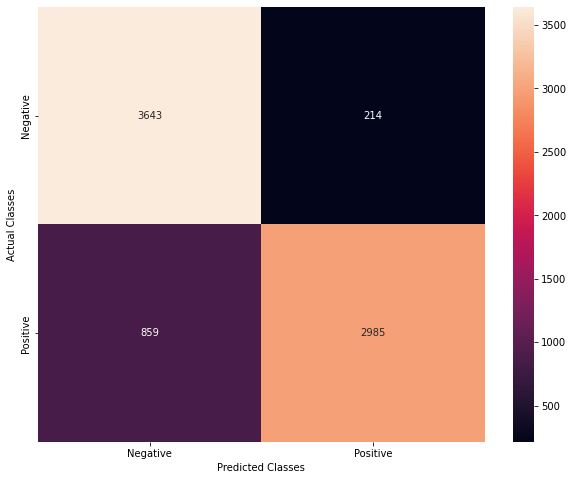


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_500_Dims_1_Bidirectional_16_Units/assets

Word Embedding Dims: 100
LSTM Layers: 2
LSTM Units: 16
-----------------------
Accuracy: 0.8402804732322693
Precision: 0.946990430355072
Recall: 0.7203434109687805
F1: 0.818262425736092
Total Time (s): 42.240179777145386

Model Accuracy Trend
--------------------


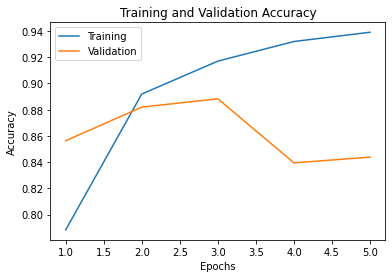


Confusion Matrix
----------------


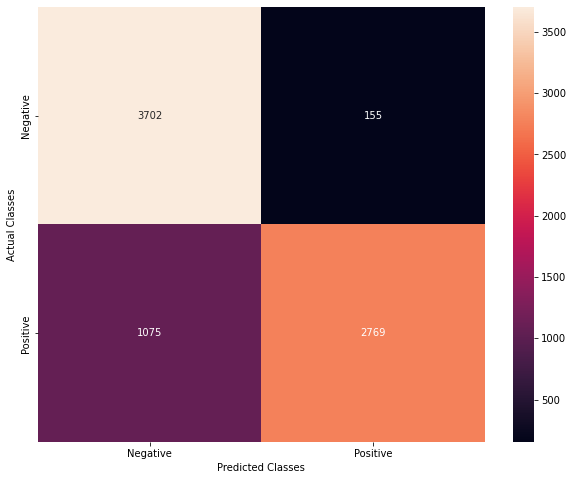


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_100_Dims_2_Layers_16_Units/assets

Word Embedding Dims: 300
LSTM Layers: 2
LSTM Units: 16
-----------------------
Accuracy: 0.8617062568664551
Precision: 0.917894721031189
Recall: 0.7939646244049072
F1: 0.8514437116223698
Total Time (s): 66.37307643890381

Model Accuracy Trend
--------------------


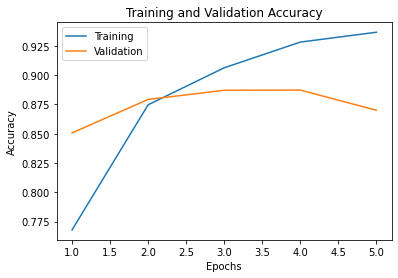


Confusion Matrix
----------------


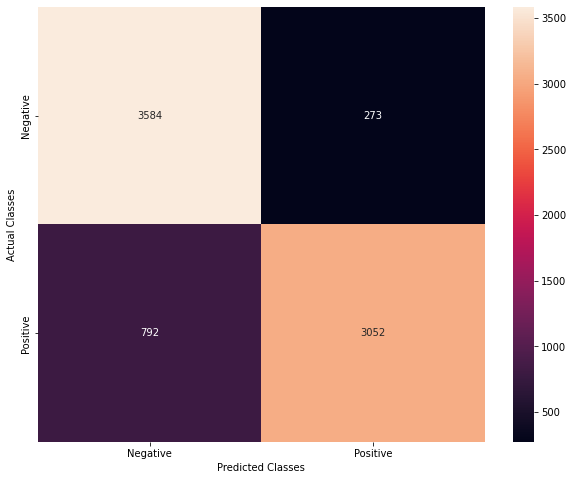


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_300_Dims_2_Layers_16_Units/assets

Word Embedding Dims: 500
LSTM Layers: 2
LSTM Units: 16
-----------------------
Accuracy: 0.8652123212814331
Precision: 0.9153345227241516
Recall: 0.8043704628944397
F1: 0.8562725117436878
Total Time (s): 92.67378807067871

Model Accuracy Trend
--------------------


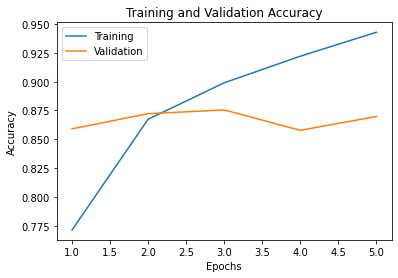


Confusion Matrix
----------------


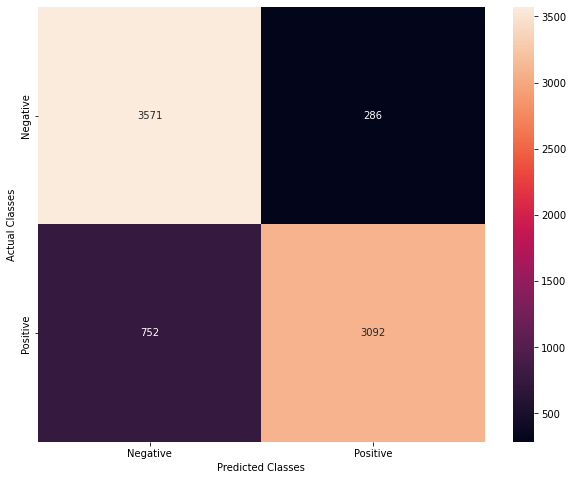


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_500_Dims_2_Layers_16_Units/assets

Word Embedding Dims: 100
LSTM Layers: 2
LSTM Units: 16
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8343072533607483
Precision: 0.954674243927002
Recall: 0.7013527750968933
F1: 0.8086382922500734
Total Time (s): 68.16238975524902

Model Accuracy Trend
--------------------


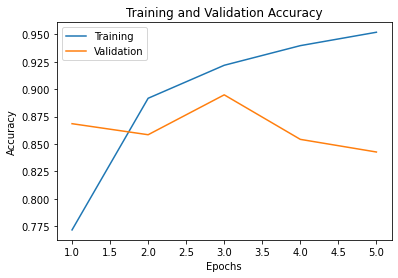


Confusion Matrix
----------------


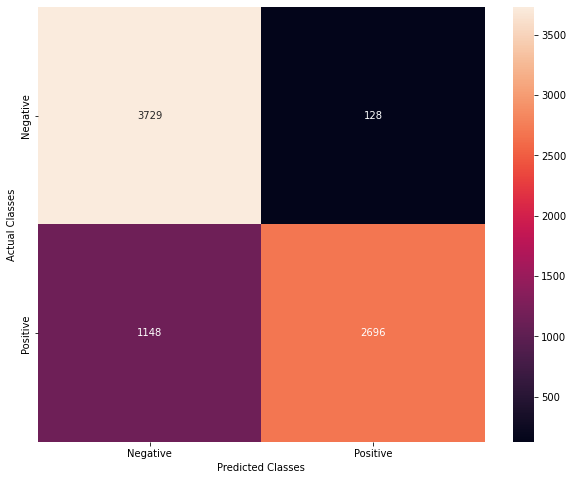


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_100_Dims_2_Bidirectional_16_Units/assets

Word Embedding Dims: 300
LSTM Layers: 2
LSTM Units: 16
Bidirectional Layer(s)
-----------------------
Accuracy: 0.876379668712616
Precision: 0.9126712083816528
Recall: 0.8319458961486816
F1: 0.8704409286994608
Total Time (s): 93.3530342578888

Model Accuracy Trend
--------------------


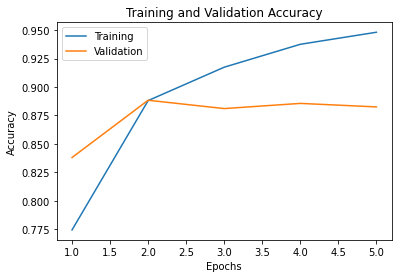


Confusion Matrix
----------------


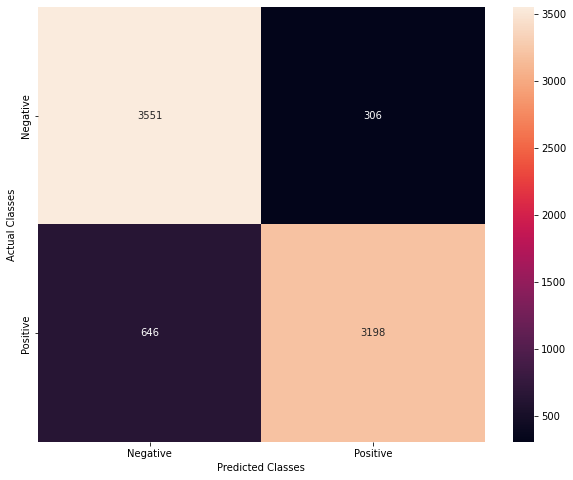


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_300_Dims_2_Bidirectional_16_Units/assets

Word Embedding Dims: 500
LSTM Layers: 2
LSTM Units: 16
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8331385254859924
Precision: 0.9462853074073792
Recall: 0.705775260925293
F1: 0.8085233344916051
Total Time (s): 122.34543180465698

Model Accuracy Trend
--------------------


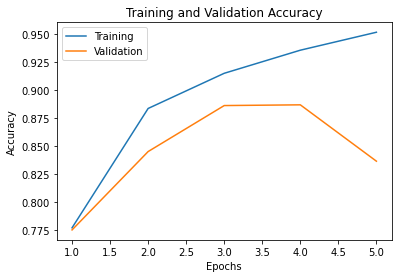


Confusion Matrix
----------------


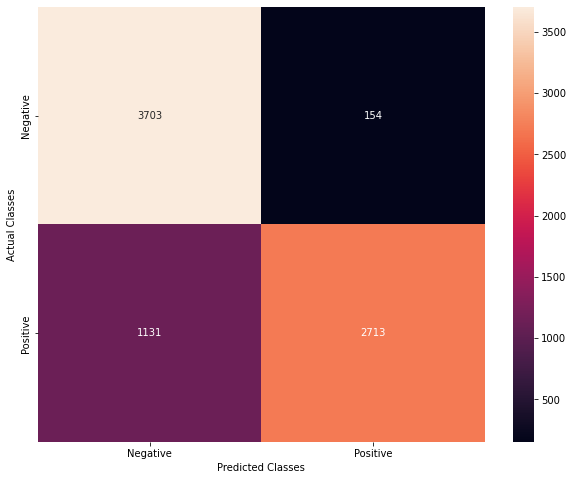


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_500_Dims_2_Bidirectional_16_Units/assets

Word Embedding Dims: 100
LSTM Layers: 3
LSTM Units: 16
-----------------------
Accuracy: 0.8637838959693909
Precision: 0.9121203422546387
Recall: 0.8046305775642395
F1: 0.8550103679267255
Total Time (s): 53.95473766326904

Model Accuracy Trend
--------------------


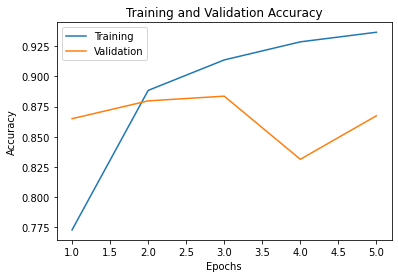


Confusion Matrix
----------------


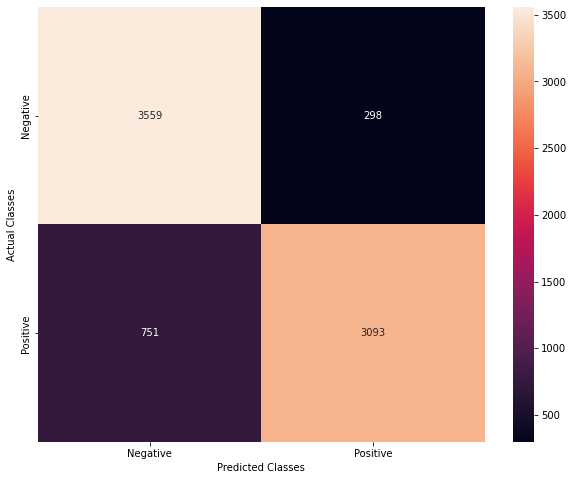


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_100_Dims_3_Layers_16_Units/assets

Word Embedding Dims: 300
LSTM Layers: 3
LSTM Units: 16
-----------------------
Accuracy: 0.8566420078277588
Precision: 0.9297364950180054
Recall: 0.7710717916488647
F1: 0.8430034009062705
Total Time (s): 79.9972231388092

Model Accuracy Trend
--------------------


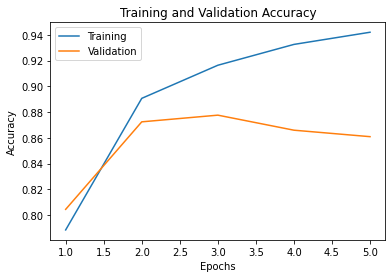


Confusion Matrix
----------------


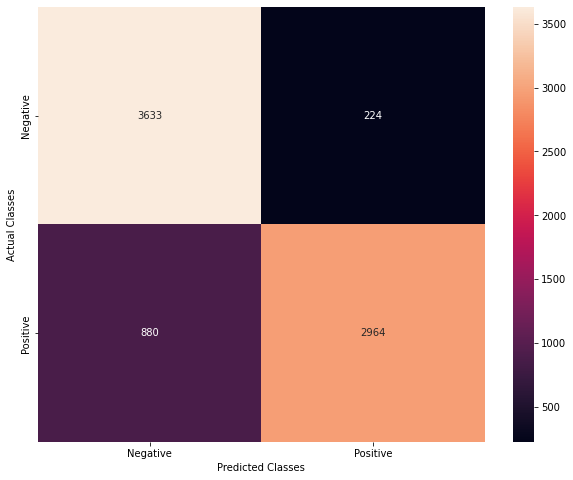


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_300_Dims_3_Layers_16_Units/assets

Word Embedding Dims: 500
LSTM Layers: 3
LSTM Units: 16
-----------------------
Accuracy: 0.8774185180664062
Precision: 0.8641386032104492
Recall: 0.8951612710952759
F1: 0.8793764175736402
Total Time (s): 105.2118718624115

Model Accuracy Trend
--------------------


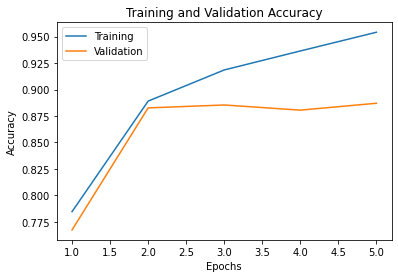


Confusion Matrix
----------------


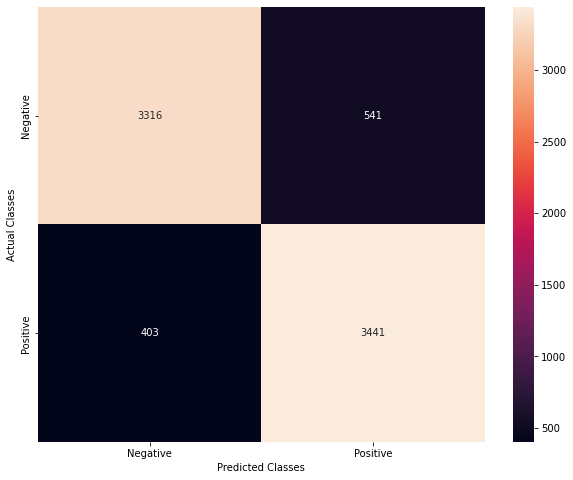


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_500_Dims_3_Layers_16_Units/assets

Word Embedding Dims: 100
LSTM Layers: 3
LSTM Units: 16
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8519672751426697
Precision: 0.9355670213699341
Recall: 0.7554630637168884
F1: 0.8359240140193314
Total Time (s): 94.25927090644836

Model Accuracy Trend
--------------------


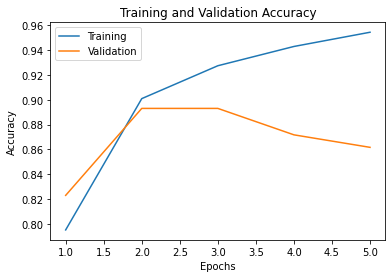


Confusion Matrix
----------------


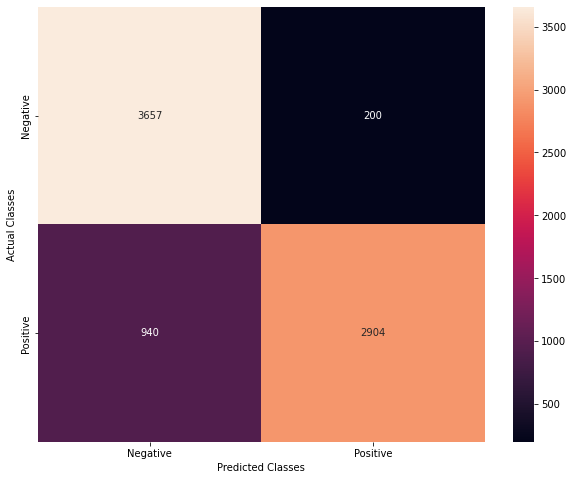


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_100_Dims_3_Bidirectional_16_Units/assets

Word Embedding Dims: 300
LSTM Layers: 3
LSTM Units: 16
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8713154196739197
Precision: 0.9221663475036621
Recall: 0.8106139302253723
F1: 0.8627993945674565
Total Time (s): 121.90186905860901

Model Accuracy Trend
--------------------


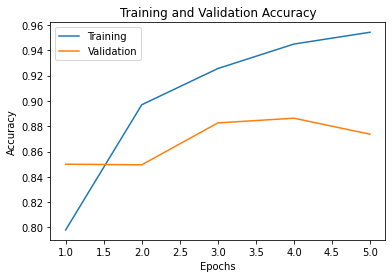


Confusion Matrix
----------------


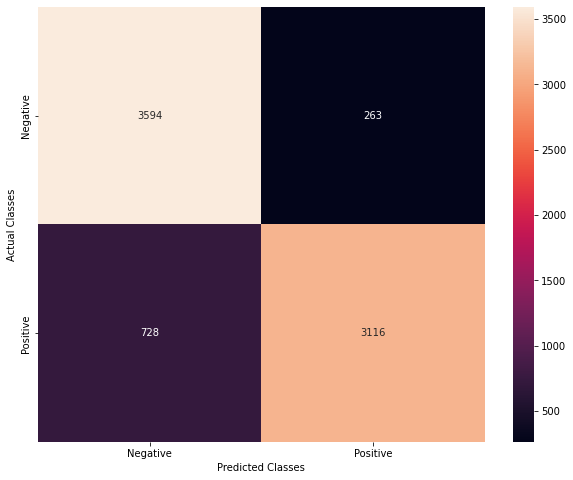


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_300_Dims_3_Bidirectional_16_Units/assets

Word Embedding Dims: 500
LSTM Layers: 3
LSTM Units: 16
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8532658219337463
Precision: 0.9269981384277344
Recall: 0.7663891911506653
F1: 0.8390772047227747
Total Time (s): 147.21663761138916

Model Accuracy Trend
--------------------


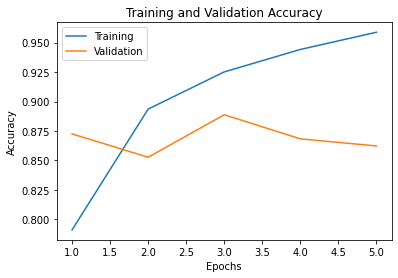


Confusion Matrix
----------------


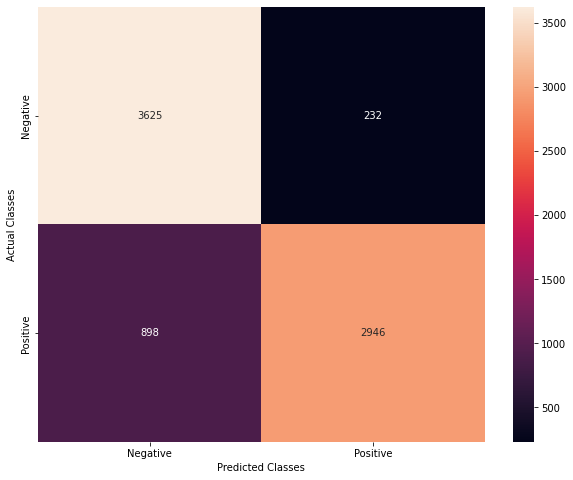


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_500_Dims_3_Bidirectional_16_Units/assets

Word Embedding Dims: 100
LSTM Layers: 1
LSTM Units: 32
-----------------------
Accuracy: 0.8293728232383728
Precision: 0.9495380520820618
Recall: 0.6951092481613159
F1: 0.802643437757931
Total Time (s): 28.879969596862793

Model Accuracy Trend
--------------------


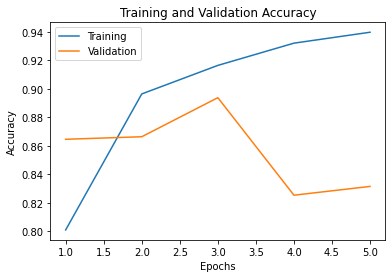


Confusion Matrix
----------------


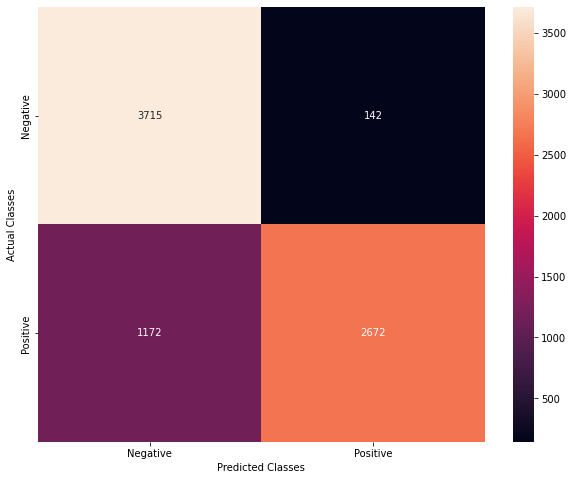


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_100_Dims_1_Layers_32_Units/assets

Word Embedding Dims: 300
LSTM Layers: 1
LSTM Units: 32
-----------------------
Accuracy: 0.7484742403030396
Precision: 0.9680903553962708
Recall: 0.5130072832107544
F1: 0.6706342514885958
Total Time (s): 54.510274171829224

Model Accuracy Trend
--------------------


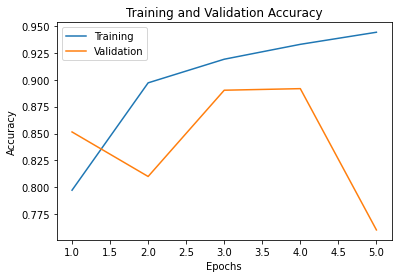


Confusion Matrix
----------------


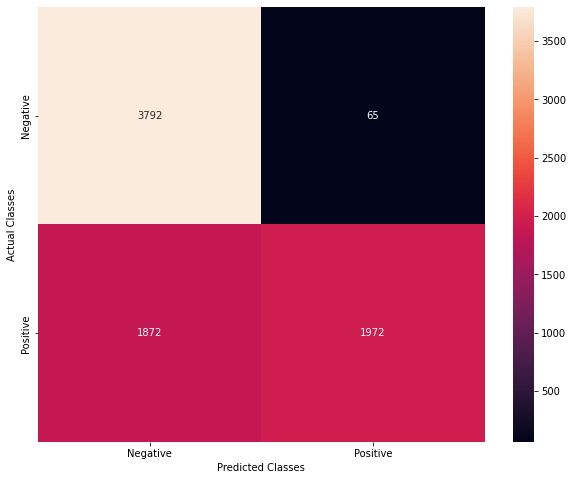


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_300_Dims_1_Layers_32_Units/assets

Word Embedding Dims: 500
LSTM Layers: 1
LSTM Units: 32
-----------------------
Accuracy: 0.8614465594291687
Precision: 0.9351300597190857
Recall: 0.7762747406959534
F1: 0.8483297983614159
Total Time (s): 81.02049112319946

Model Accuracy Trend
--------------------


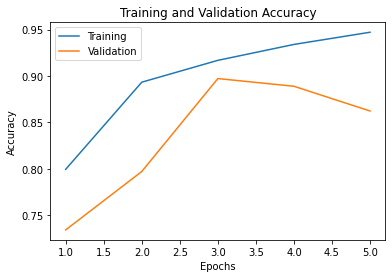


Confusion Matrix
----------------


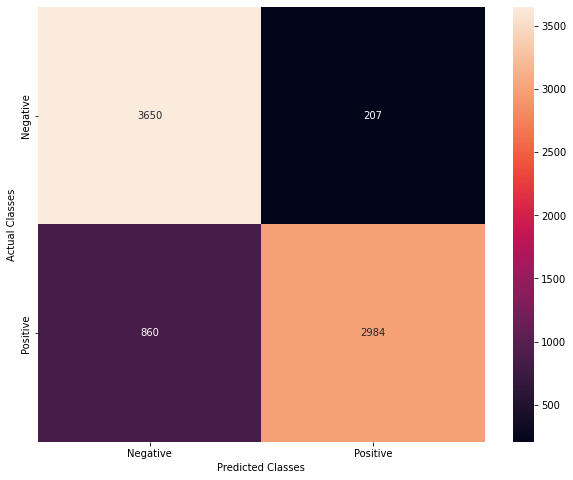


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_500_Dims_1_Layers_32_Units/assets

Word Embedding Dims: 100
LSTM Layers: 1
LSTM Units: 32
Bidirectional Layer(s)
-----------------------
Accuracy: 0.7911959290504456
Precision: 0.9681742191314697
Recall: 0.6014568209648132
F1: 0.7419769017095691
Total Time (s): 41.75977563858032

Model Accuracy Trend
--------------------


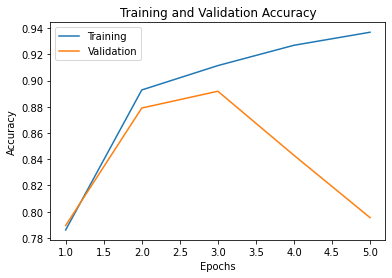


Confusion Matrix
----------------


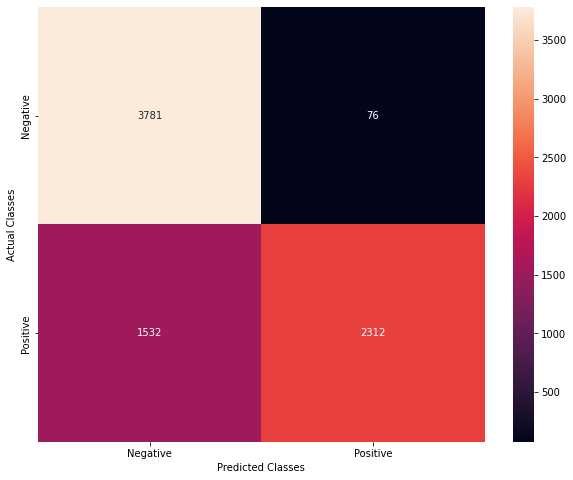


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_100_Dims_1_Bidirectional_32_Units/assets

Word Embedding Dims: 300
LSTM Layers: 1
LSTM Units: 32
Bidirectional Layer(s)
-----------------------
Accuracy: 0.7960005402565002
Precision: 0.9652067422866821
Recall: 0.6134235262870789
F1: 0.7501193094244735
Total Time (s): 68.81740212440491

Model Accuracy Trend
--------------------


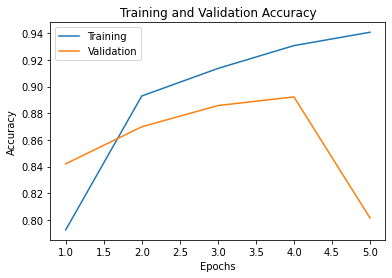


Confusion Matrix
----------------


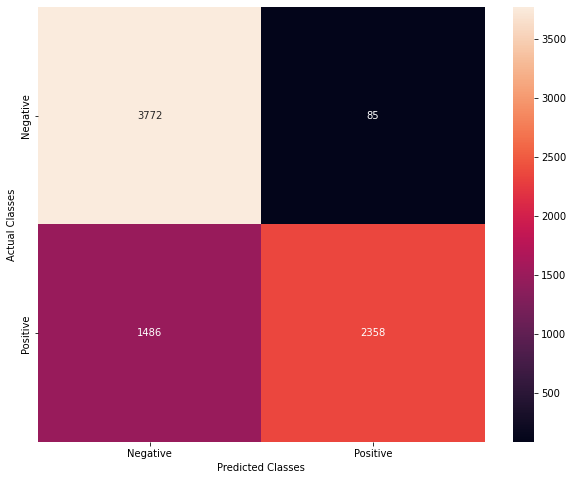


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_300_Dims_1_Bidirectional_32_Units/assets

Word Embedding Dims: 500
LSTM Layers: 1
LSTM Units: 32
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8837813138961792
Precision: 0.9090152382850647
Recall: 0.852497398853302
F1: 0.8798496358390431
Total Time (s): 98.51165986061096

Model Accuracy Trend
--------------------


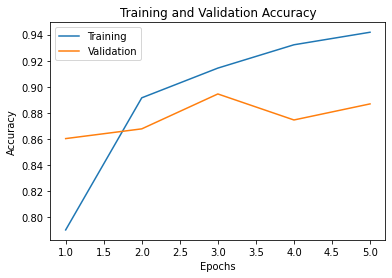


Confusion Matrix
----------------


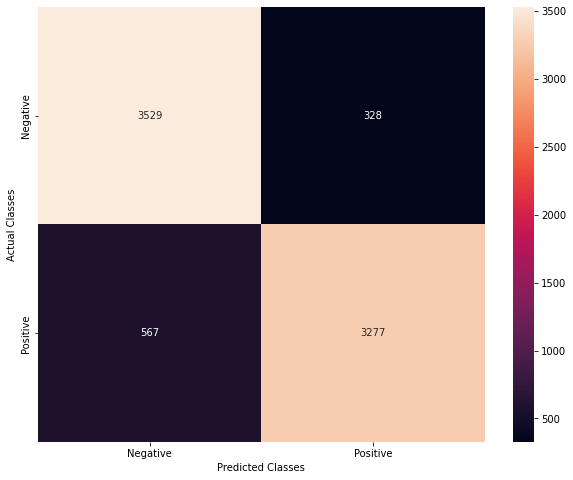


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_500_Dims_1_Bidirectional_32_Units/assets

Word Embedding Dims: 100
LSTM Layers: 2
LSTM Units: 32
-----------------------
Accuracy: 0.8674198389053345
Precision: 0.9278569221496582
Recall: 0.7963059544563293
F1: 0.8570628703544954
Total Time (s): 41.452303886413574

Model Accuracy Trend
--------------------


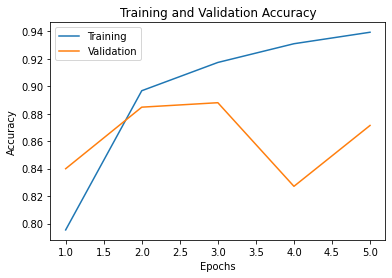


Confusion Matrix
----------------


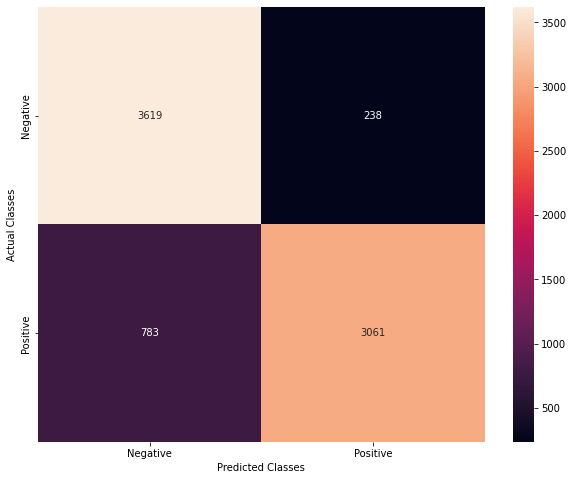


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_100_Dims_2_Layers_32_Units/assets

Word Embedding Dims: 300
LSTM Layers: 2
LSTM Units: 32
-----------------------
Accuracy: 0.8788468837738037
Precision: 0.9094233512878418
Recall: 0.8410509824752808
F1: 0.8739018771469809
Total Time (s): 68.60881638526917

Model Accuracy Trend
--------------------


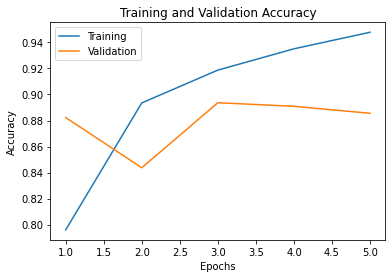


Confusion Matrix
----------------


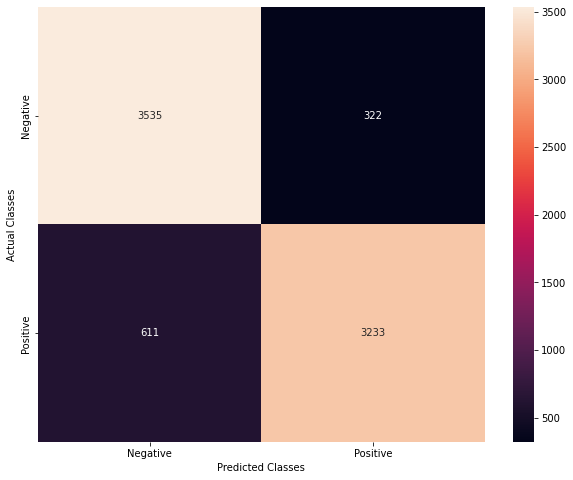


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_300_Dims_2_Layers_32_Units/assets

Word Embedding Dims: 500
LSTM Layers: 2
LSTM Units: 32
-----------------------
Accuracy: 0.871964693069458
Precision: 0.9027621150016785
Recall: 0.8332465887069702
F1: 0.8666125361377018
Total Time (s): 93.28202748298645

Model Accuracy Trend
--------------------


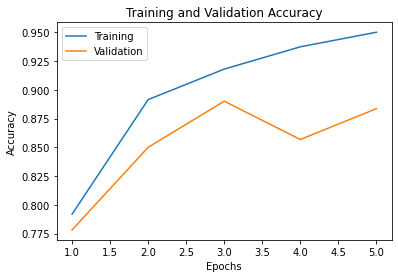


Confusion Matrix
----------------


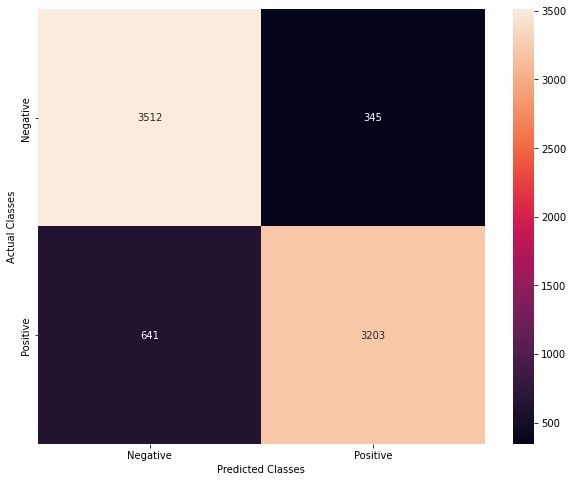


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_500_Dims_2_Layers_32_Units/assets

Word Embedding Dims: 100
LSTM Layers: 2
LSTM Units: 32
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8346967697143555
Precision: 0.950262725353241
Recall: 0.705775260925293
F1: 0.8099716654941046
Total Time (s): 68.12541723251343

Model Accuracy Trend
--------------------


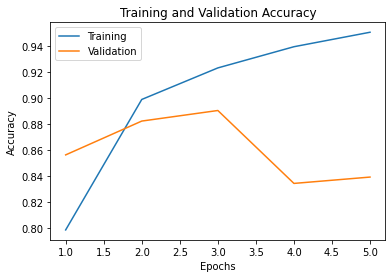


Confusion Matrix
----------------


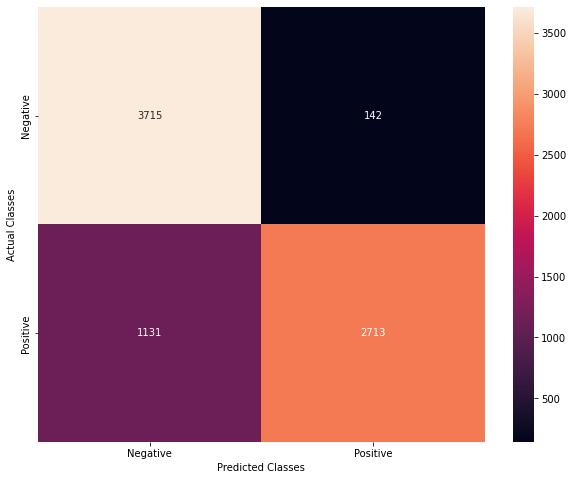


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_100_Dims_2_Bidirectional_32_Units/assets

Word Embedding Dims: 300
LSTM Layers: 2
LSTM Units: 32
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8767692446708679
Precision: 0.8928086757659912
Recall: 0.8558793067932129
F1: 0.8739540479888809
Total Time (s): 95.7571771144867

Model Accuracy Trend
--------------------


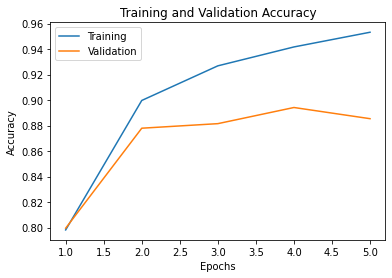


Confusion Matrix
----------------


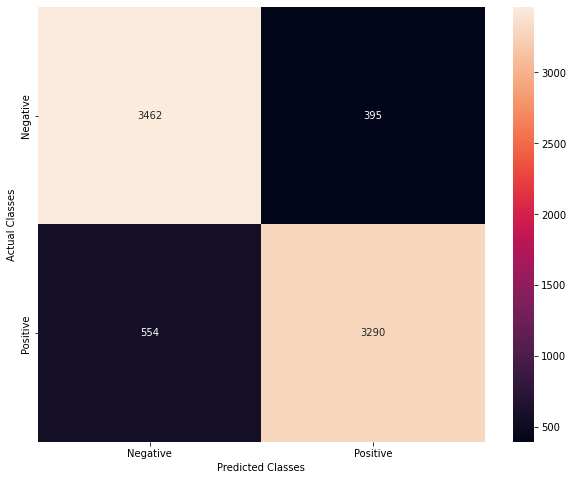


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_300_Dims_2_Bidirectional_32_Units/assets

Word Embedding Dims: 500
LSTM Layers: 2
LSTM Units: 32
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8792364597320557
Precision: 0.9104225635528564
Recall: 0.840790867805481
F1: 0.8742223689839477
Total Time (s): 123.60203051567078

Model Accuracy Trend
--------------------


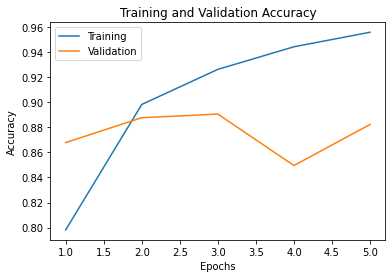


Confusion Matrix
----------------


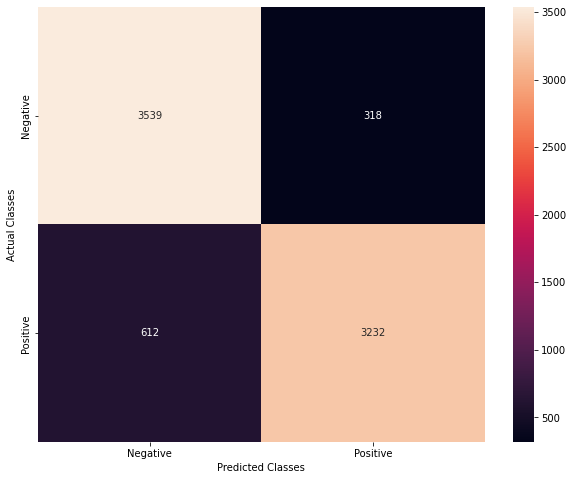


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_500_Dims_2_Bidirectional_32_Units/assets

Word Embedding Dims: 100
LSTM Layers: 3
LSTM Units: 32
-----------------------
Accuracy: 0.8497597575187683
Precision: 0.9357768297195435
Recall: 0.7505202889442444
F1: 0.8329724208803188
Total Time (s): 55.208420276641846

Model Accuracy Trend
--------------------


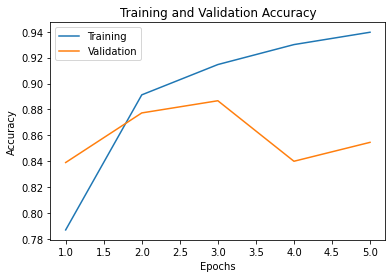


Confusion Matrix
----------------


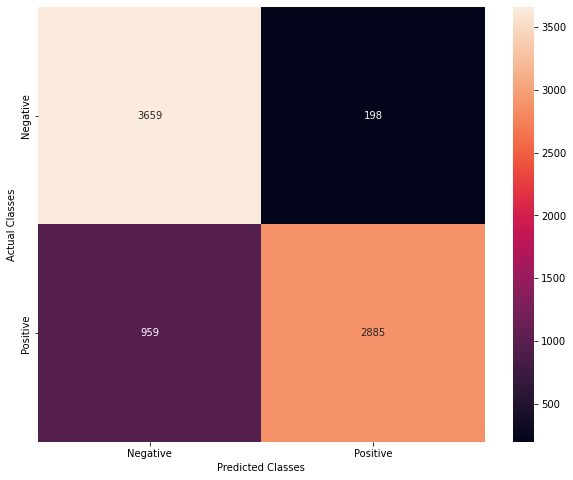


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_100_Dims_3_Layers_32_Units/assets

Word Embedding Dims: 300
LSTM Layers: 3
LSTM Units: 32
-----------------------
Accuracy: 0.8648227453231812
Precision: 0.9103953242301941
Recall: 0.8087929487228394
F1: 0.8565918350790654
Total Time (s): 79.3518590927124

Model Accuracy Trend
--------------------


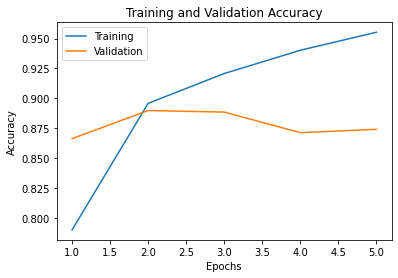


Confusion Matrix
----------------


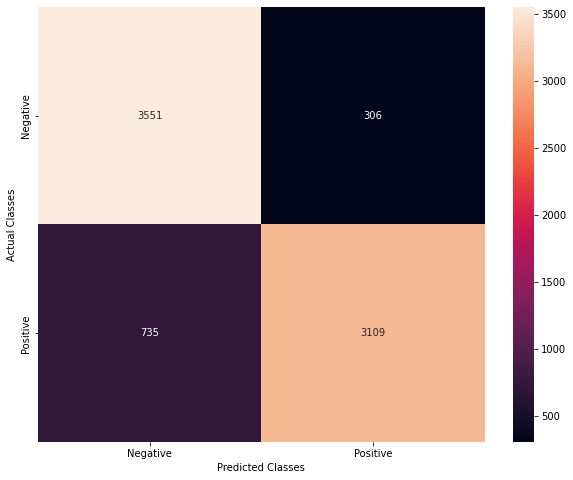


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_300_Dims_3_Layers_32_Units/assets

Word Embedding Dims: 500
LSTM Layers: 3
LSTM Units: 32
-----------------------
Accuracy: 0.8650824427604675
Precision: 0.9155555367469788
Recall: 0.8038501739501953
F1: 0.8560742504184273
Total Time (s): 104.29983019828796

Model Accuracy Trend
--------------------


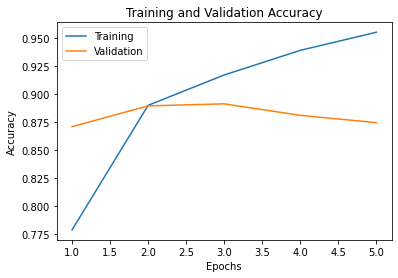


Confusion Matrix
----------------


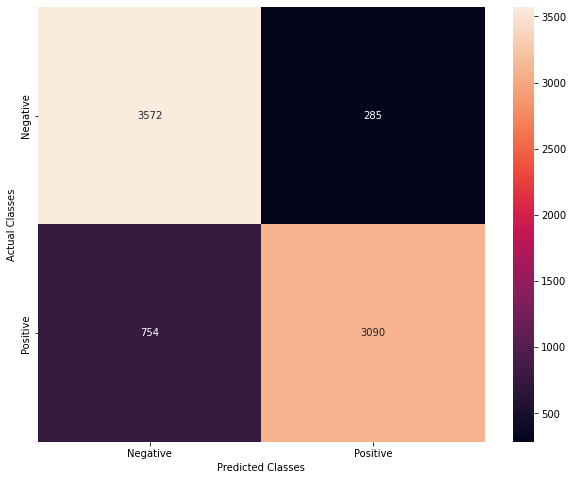


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_500_Dims_3_Layers_32_Units/assets

Word Embedding Dims: 100
LSTM Layers: 3
LSTM Units: 32
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8724840879440308
Precision: 0.9236234426498413
Recall: 0.8116545081138611
F1: 0.8640265736062149
Total Time (s): 92.80833101272583

Model Accuracy Trend
--------------------


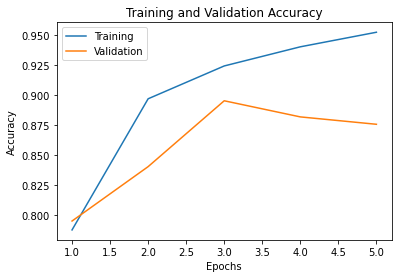


Confusion Matrix
----------------


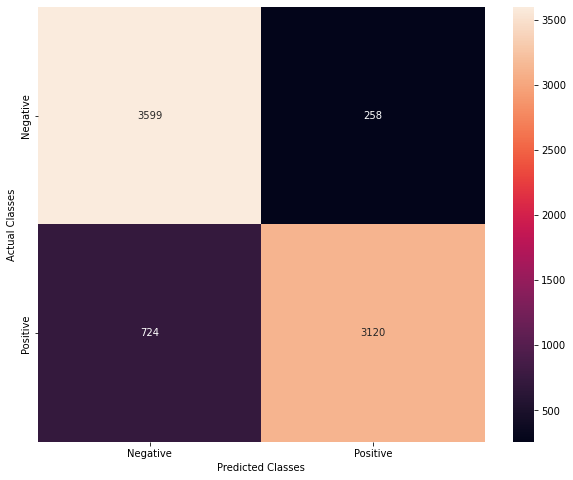


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_100_Dims_3_Bidirectional_32_Units/assets

Word Embedding Dims: 300
LSTM Layers: 3
LSTM Units: 32
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8583300709724426
Precision: 0.9289498329162598
Recall: 0.7754942774772644
F1: 0.8453140529479662
Total Time (s): 122.08272099494934

Model Accuracy Trend
--------------------


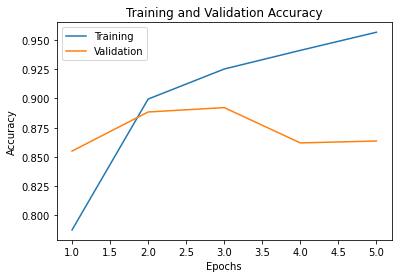


Confusion Matrix
----------------


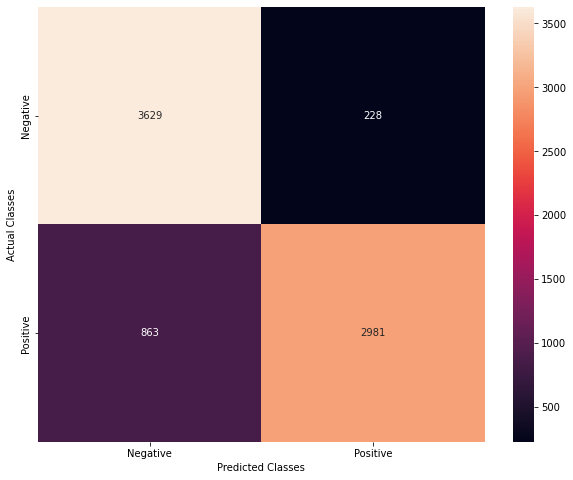


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_300_Dims_3_Bidirectional_32_Units/assets

Word Embedding Dims: 500
LSTM Layers: 3
LSTM Units: 32
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8819633722305298
Precision: 0.9008467793464661
Recall: 0.8579604625701904
F1: 0.8788807563365546
Total Time (s): 146.715487241745

Model Accuracy Trend
--------------------


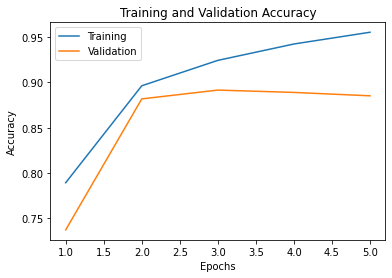


Confusion Matrix
----------------


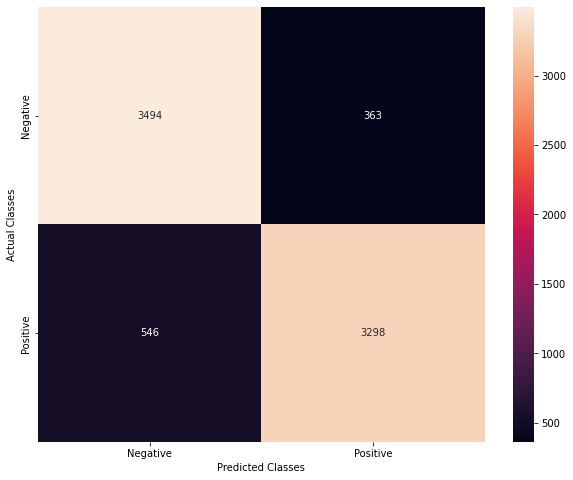


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_500_Dims_3_Bidirectional_32_Units/assets

Word Embedding Dims: 100
LSTM Layers: 1
LSTM Units: 64
-----------------------
Accuracy: 0.8270354270935059
Precision: 0.9573925733566284
Recall: 0.6839230060577393
F1: 0.797875576104689
Total Time (s): 31.249629735946655

Model Accuracy Trend
--------------------


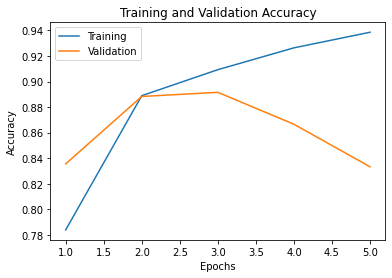


Confusion Matrix
----------------


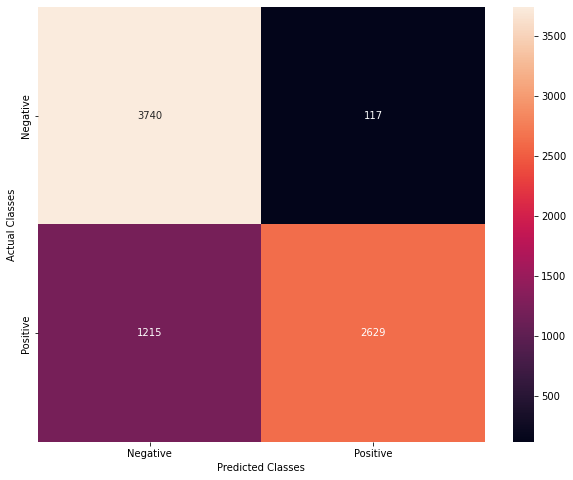


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_100_Dims_1_Layers_64_Units/assets

Word Embedding Dims: 300
LSTM Layers: 1
LSTM Units: 64
-----------------------
Accuracy: 0.8485910892486572
Precision: 0.9472277760505676
Recall: 0.7377731800079346
F1: 0.829482316928024
Total Time (s): 57.09929800033569

Model Accuracy Trend
--------------------


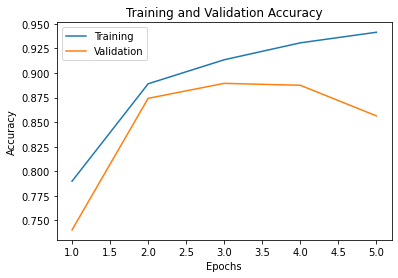


Confusion Matrix
----------------


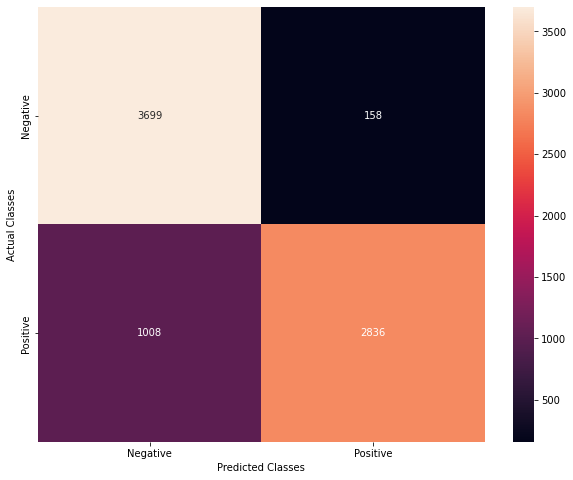


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_300_Dims_1_Layers_64_Units/assets

Word Embedding Dims: 500
LSTM Layers: 1
LSTM Units: 64
-----------------------
Accuracy: 0.8843007683753967
Precision: 0.9006784558296204
Recall: 0.8634235262870789
F1: 0.8816576096696063
Total Time (s): 83.88070249557495

Model Accuracy Trend
--------------------


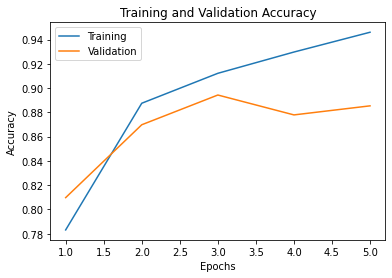


Confusion Matrix
----------------


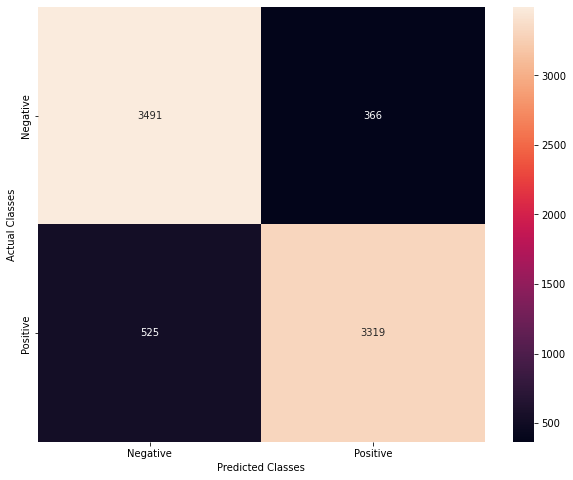


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_500_Dims_1_Layers_64_Units/assets

Word Embedding Dims: 100
LSTM Layers: 1
LSTM Units: 64
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8648227453231812
Precision: 0.9123271703720093
Recall: 0.806711733341217
F1: 0.856275016691385
Total Time (s): 45.46853685379028

Model Accuracy Trend
--------------------


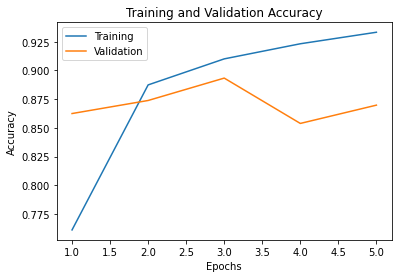


Confusion Matrix
----------------


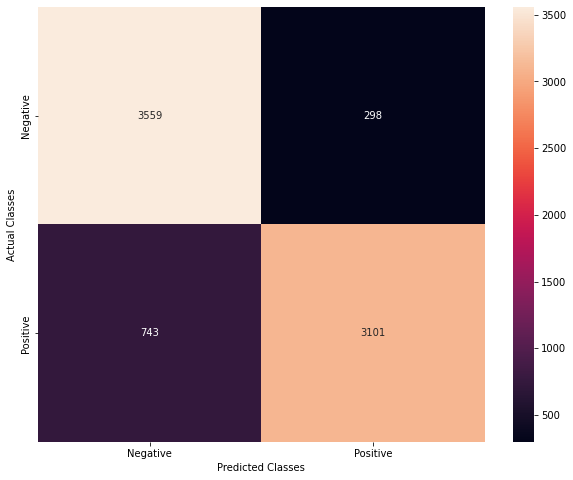


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_100_Dims_1_Bidirectional_64_Units/assets

Word Embedding Dims: 300
LSTM Layers: 1
LSTM Units: 64
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8784573674201965
Precision: 0.9140090942382812
Recall: 0.835067629814148
F1: 0.8727569207893235
Total Time (s): 75.08660054206848

Model Accuracy Trend
--------------------


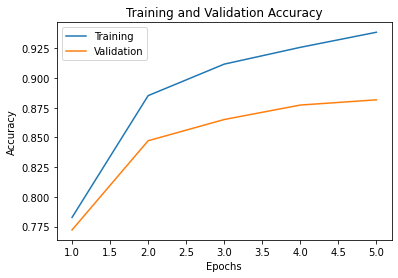


Confusion Matrix
----------------


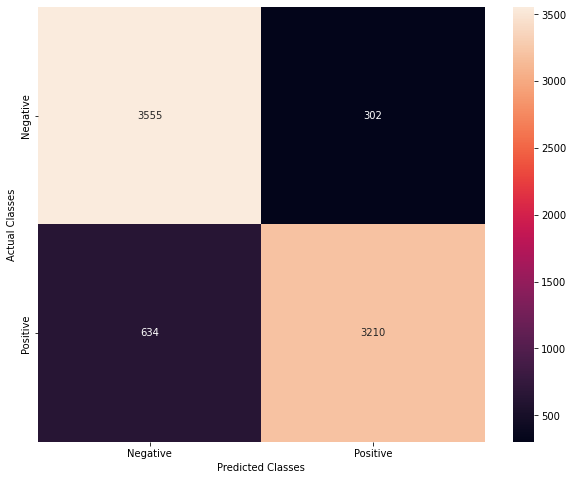


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_300_Dims_1_Bidirectional_64_Units/assets

Word Embedding Dims: 500
LSTM Layers: 1
LSTM Units: 64
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8804051280021667
Precision: 0.9208177328109741
Recall: 0.8319458961486816
F1: 0.8741287430384672
Total Time (s): 109.89674139022827

Model Accuracy Trend
--------------------


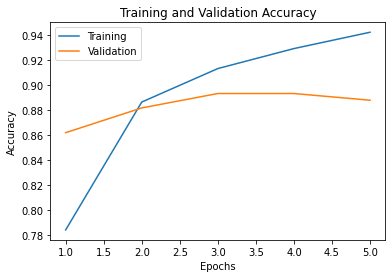


Confusion Matrix
----------------


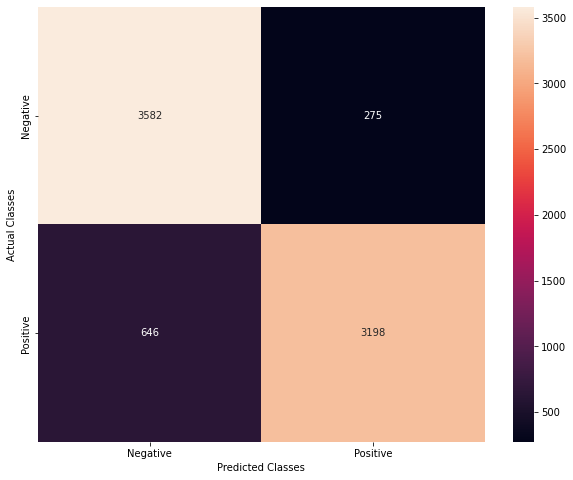


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_500_Dims_1_Bidirectional_64_Units/assets

Word Embedding Dims: 100
LSTM Layers: 2
LSTM Units: 64
-----------------------
Accuracy: 0.8788468837738037
Precision: 0.9087334871292114
Recall: 0.8418314456939697
F1: 0.8740040553500299
Total Time (s): 43.774473428726196

Model Accuracy Trend
--------------------


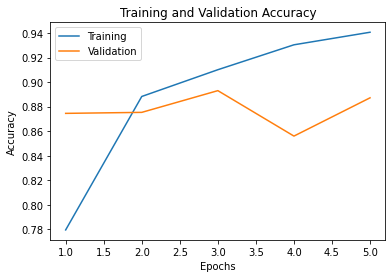


Confusion Matrix
----------------


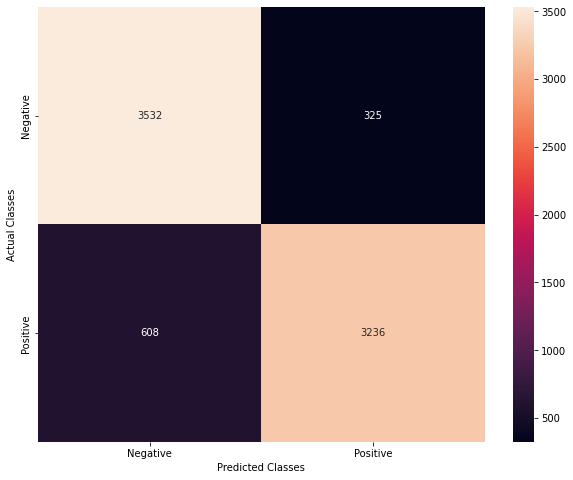


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_100_Dims_2_Layers_64_Units/assets

Word Embedding Dims: 300
LSTM Layers: 2
LSTM Units: 64
-----------------------
Accuracy: 0.8598883152008057
Precision: 0.9268292784690857
Recall: 0.7809573411941528
F1: 0.8476634267070701
Total Time (s): 70.03368496894836

Model Accuracy Trend
--------------------


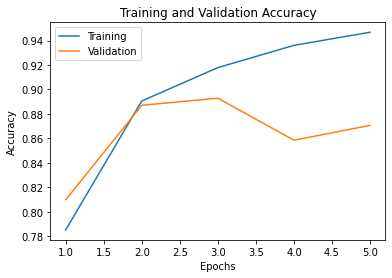


Confusion Matrix
----------------


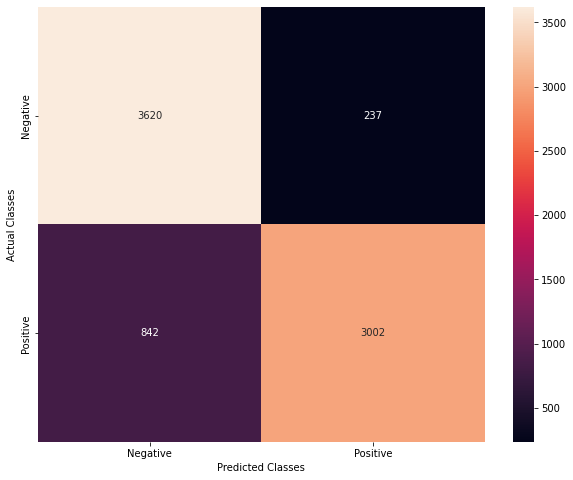


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_300_Dims_2_Layers_64_Units/assets

Word Embedding Dims: 500
LSTM Layers: 2
LSTM Units: 64
-----------------------
Accuracy: 0.860927164554596
Precision: 0.9270095229148865
Recall: 0.7830384969711304
F1: 0.8489634619144568
Total Time (s): 99.08664870262146

Model Accuracy Trend
--------------------


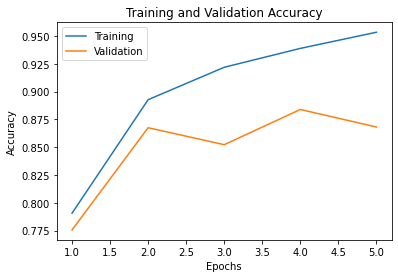


Confusion Matrix
----------------


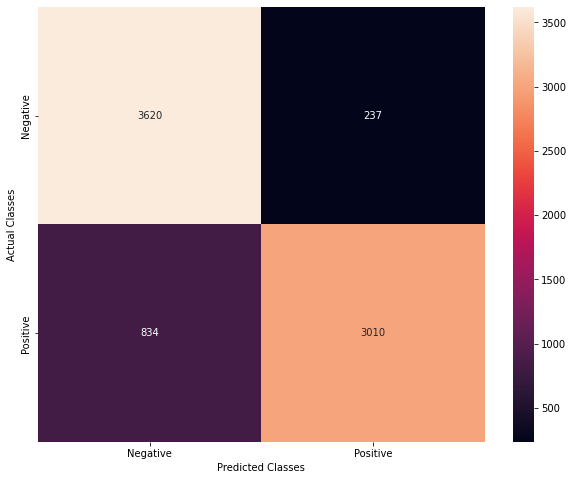


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_500_Dims_2_Layers_64_Units/assets

Word Embedding Dims: 100
LSTM Layers: 2
LSTM Units: 64
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8688482046127319
Precision: 0.92578125
Recall: 0.8015088438987732
F1: 0.8591745671577352
Total Time (s): 78.27834391593933

Model Accuracy Trend
--------------------


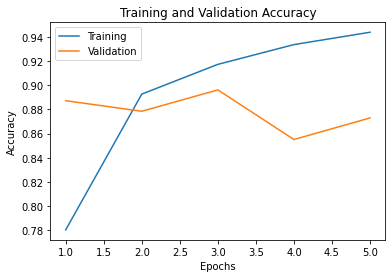


Confusion Matrix
----------------


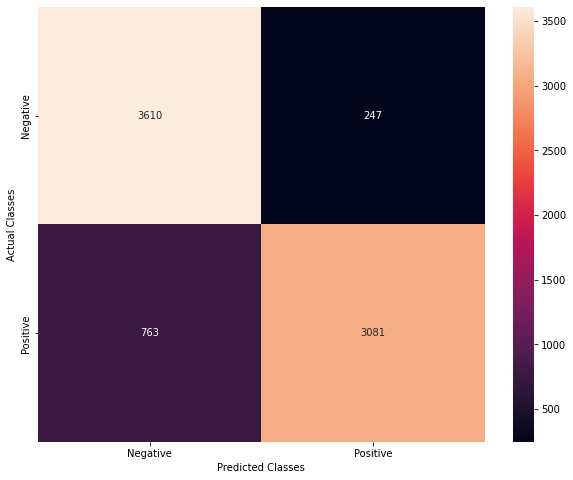


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_100_Dims_2_Bidirectional_64_Units/assets

Word Embedding Dims: 300
LSTM Layers: 2
LSTM Units: 64
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8205428123474121
Precision: 0.9349823594093323
Recall: 0.6883454918861389
F1: 0.7929278014652086
Total Time (s): 110.77901673316956

Model Accuracy Trend
--------------------


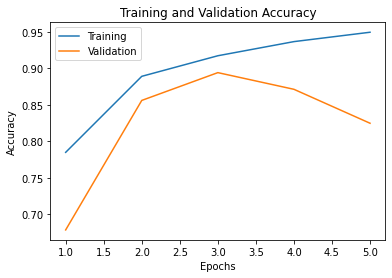


Confusion Matrix
----------------


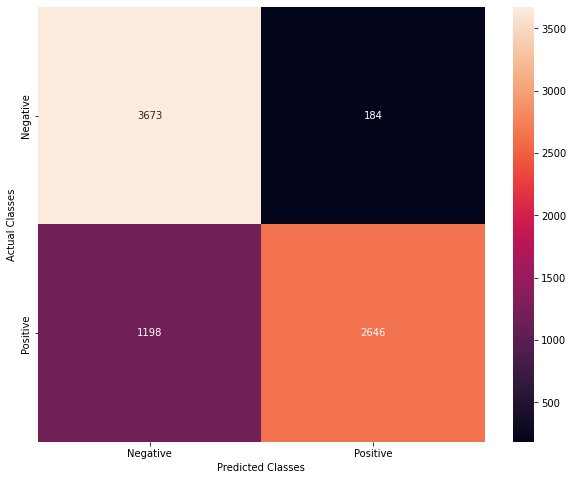


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_300_Dims_2_Bidirectional_64_Units/assets

Word Embedding Dims: 500
LSTM Layers: 2
LSTM Units: 64
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8005453944206238
Precision: 0.9619695544242859
Recall: 0.6251300573348999
F1: 0.7578050908160981
Total Time (s): 144.27984237670898

Model Accuracy Trend
--------------------


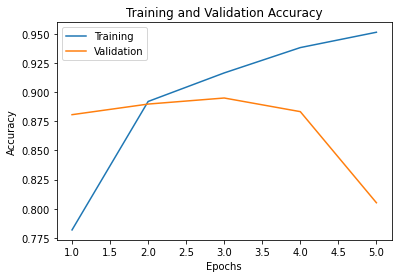


Confusion Matrix
----------------


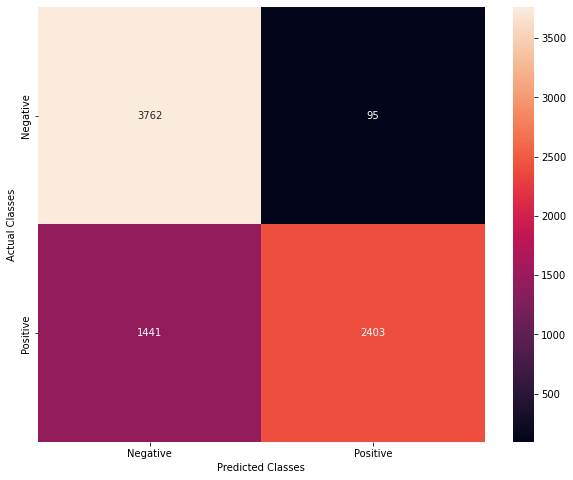


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_500_Dims_2_Bidirectional_64_Units/assets

Word Embedding Dims: 100
LSTM Layers: 3
LSTM Units: 64
-----------------------
Accuracy: 0.8559927344322205
Precision: 0.9348171949386597
Recall: 0.7648283243179321
F1: 0.8413220999885289
Total Time (s): 59.014583587646484

Model Accuracy Trend
--------------------


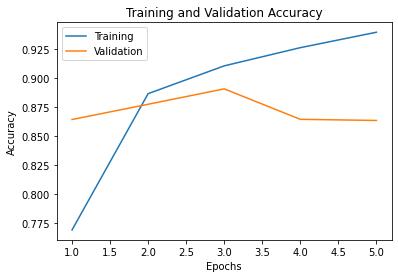


Confusion Matrix
----------------


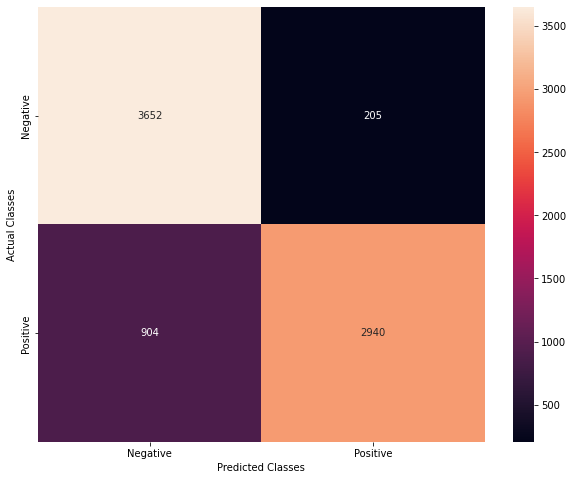


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_100_Dims_3_Layers_64_Units/assets

Word Embedding Dims: 300
LSTM Layers: 3
LSTM Units: 64
-----------------------
Accuracy: 0.8659914135932922
Precision: 0.9268366694450378
Recall: 0.794224739074707
F1: 0.8554216698031442
Total Time (s): 86.96209526062012

Model Accuracy Trend
--------------------


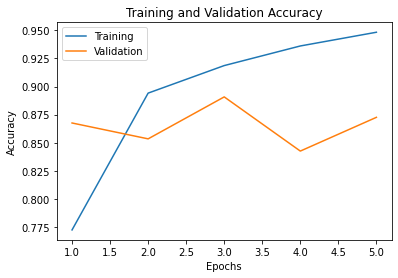


Confusion Matrix
----------------


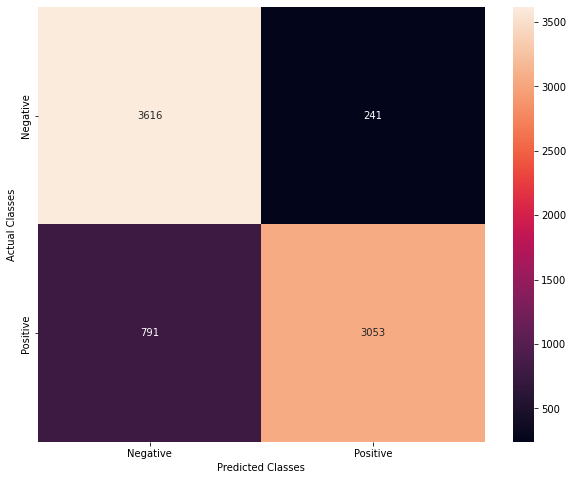


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_300_Dims_3_Layers_64_Units/assets

Word Embedding Dims: 500
LSTM Layers: 3
LSTM Units: 64
-----------------------
Accuracy: 0.8553434610366821
Precision: 0.9358237385749817
Recall: 0.76248699426651
F1: 0.8403096274324542
Total Time (s): 115.38378667831421

Model Accuracy Trend
--------------------


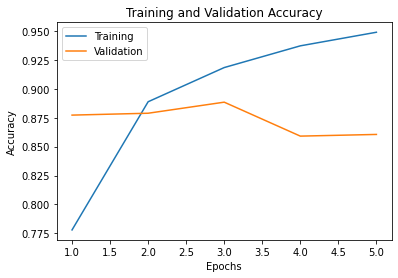


Confusion Matrix
----------------


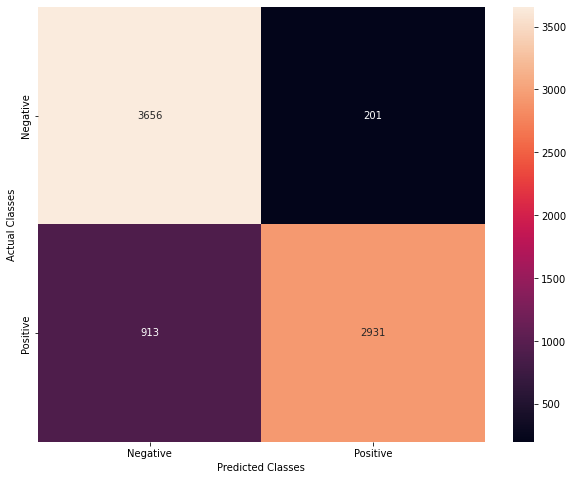


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_500_Dims_3_Layers_64_Units/assets

Word Embedding Dims: 100
LSTM Layers: 3
LSTM Units: 64
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8583300709724426
Precision: 0.9357391595840454
Recall: 0.7689906358718872
F1: 0.8442096257797959
Total Time (s): 112.92711997032166

Model Accuracy Trend
--------------------


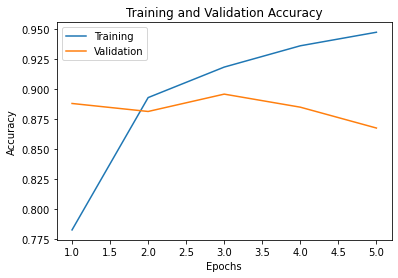


Confusion Matrix
----------------


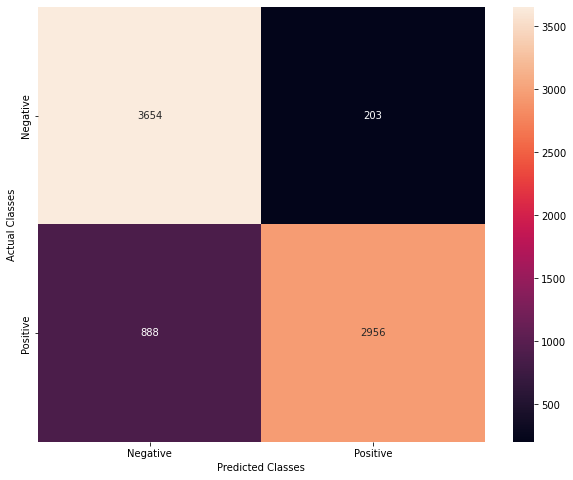


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_100_Dims_3_Bidirectional_64_Units/assets

Word Embedding Dims: 300
LSTM Layers: 3
LSTM Units: 64
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8767692446708679
Precision: 0.9097084403038025
Recall: 0.8361082077026367
F1: 0.8713569027113184
Total Time (s): 143.54333686828613

Model Accuracy Trend
--------------------


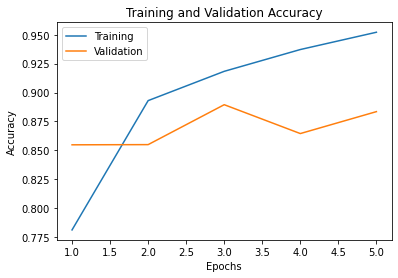


Confusion Matrix
----------------


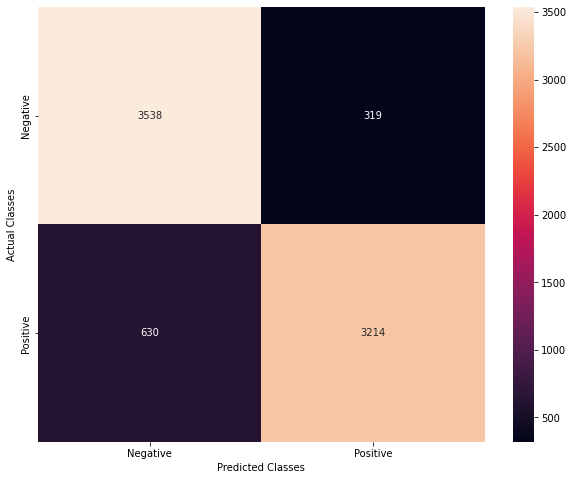


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_300_Dims_3_Bidirectional_64_Units/assets

Word Embedding Dims: 500
LSTM Layers: 3
LSTM Units: 64
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8748214244842529
Precision: 0.9070096015930176
Recall: 0.8348075151443481
F1: 0.8694120920527169
Total Time (s): 178.8357298374176

Model Accuracy Trend
--------------------


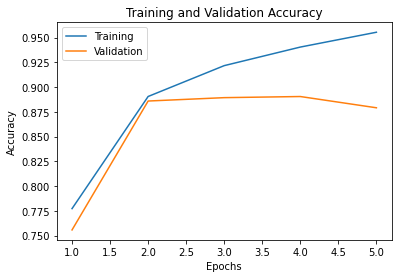


Confusion Matrix
----------------


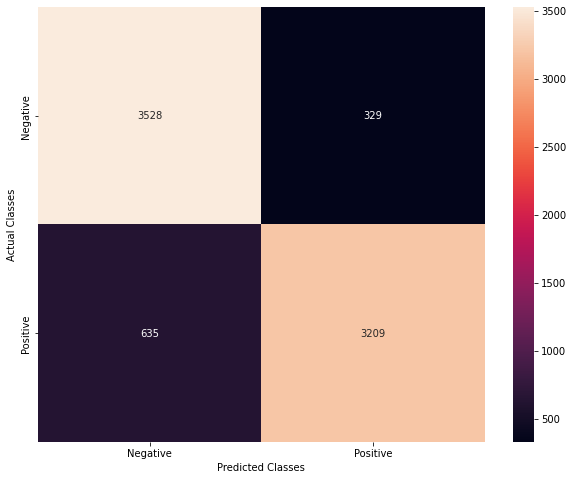


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_500_Dims_3_Bidirectional_64_Units/assets



In [ ]:
lstm_results = pd.DataFrame(columns=['Model','Embed_Dims','LSTM Layers','LSTM Units','Bidirectional','Epochs','Time','Test Accuracy','Test Precision','Test Recall','Test F1'])

for LSTM_units in [8,16,32,64]:
    
    for LSTM_layers in [1,2,3]:

        for bidirectional in [0,1]:
    
            for embed_dims in [100,300,500]:

                dims = embed_dims

                num_epochs = 5

                start_time = time.time()

                print('Word Embedding Dims:',dims)
                print('LSTM Layers:',LSTM_layers)
                print('LSTM Units:',LSTM_units)
                if bidirectional == 1:
                  print('Bidirectional Layer(s)')
                print('-----------------------')

                seed(5)
                tf.random.set_seed(5)

                model = models.Sequential()
                model.add(Embedding(input_dim = voc_size, output_dim = dims, input_length = X_train_seq.shape[1]))
                
                if LSTM_layers > 1:
                    
                    for layers in range(1,LSTM_layers):
                        
                        if bidirectional == 1:
                          model.add(Bidirectional(LSTM(units=LSTM_units, return_sequences=True)))
                        else:
                          model.add(LSTM(units=LSTM_units, return_sequences=True))

                if bidirectional == 1:   
                    model.add(Bidirectional(LSTM(units=LSTM_units)))
                else:    
                    model.add(LSTM(units=LSTM_units))

                model.add(Dense(1, activation='sigmoid'))

                model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['Precision','Recall','accuracy'])

                history = model.fit(X_train_seq, y_train, batch_size=128, epochs=num_epochs, validation_split=0.2, verbose=False)

                total_time = time.time() - start_time

                loss, precision, recall, accuracy = model.evaluate(X_test_seq, y_test, verbose=0)

                f1_score = (2 * precision * recall) / (precision + recall)

                print('Accuracy:',accuracy)
                print('Precision:',precision)
                print('Recall:',recall)
                print('F1:',f1_score)
                print('Total Time (s):',total_time)
                print()

                acc = history.history['accuracy']
                val_acc = history.history['val_accuracy']
                loss = history.history['loss']
                val_loss = history.history['val_loss']

                print('Model Accuracy Trend')
                print('--------------------')
                plot = plt.plot(range(1, len(acc) + 1), history.history['accuracy'], label = 'Training')
                plot = plt.plot(range(1, len(val_acc) + 1), history.history['val_accuracy'], label = 'Validation')
                plot = plt.title('Training and Validation Accuracy')
                plot = plt.xlabel('Epochs')
                plot = plt.ylabel('Accuracy')
                plot = plt.legend()
                plt.show()
                print()

                print('Confusion Matrix')
                print('----------------')
                pred_test = model.predict_classes(X_test_seq)

                conf_matrix = tf.math.confusion_matrix(y_test, pred_test)

                fig, ax = plt.subplots(figsize=(10,8))
                ax = sns.heatmap(conf_matrix, annot=True, fmt='g')

                ax.set_xlabel("Predicted Classes")
                ax.set_ylabel("Actual Classes")
                ax.set_xticklabels(['Negative','Positive'])
                ax.set_yticklabels(['Negative','Positive'], va='center')
                plt.show()
                print()

                if bidirectional == 1:
                    model_name = 'LSTM_{}_Dims_{}_Bidirectional_{}_Units'.format(embed_dims,LSTM_layers,LSTM_units)

                else:
                    model_name = 'LSTM_{}_Dims_{}_Layers_{}_Units'.format(embed_dims,LSTM_layers,LSTM_units)

                model.save('/content/drive/MyDrive/Research Assignment 4/'+model_name)
                print()

                lstm_results = lstm_results.append(
                    {'Model':model_name,
                    'Embed_Dims':dims,
                    'LSTM Layers':LSTM_layers,
                    'LSTM Units':LSTM_units,
                    'Bidirectional':bidirectional,
                    'Epochs':num_epochs,
                    'Time':total_time,
                    'Test Accuracy':accuracy,
                    'Test Precision':precision,
                    'Test Recall':recall,
                    'Test F1':f1_score
                    }, ignore_index=True)
                
                lstm_results.to_csv('/content/drive/MyDrive/Research Assignment 4/'+'LSTM_Results.csv')

### LSTM Analysis

In [5]:
lstm_results = pd.read_csv('/content/drive/MyDrive/Research Assignment 4/LSTM_Results.csv', header=0, index_col=0)
lstm_results.sort_values(by='Test F1',ascending=False).head()

Model  Embed_Dims  ...  Test Recall   Test F1
2           LSTM_500_Dims_1_Layers_8_Units         500  ...     0.888137  0.882741
56         LSTM_500_Dims_1_Layers_64_Units         500  ...     0.863424  0.881658
7           LSTM_300_Dims_2_Layers_8_Units         300  ...     0.919615  0.881656
80            LSTM_2_Dims_1_Layers_8_Units           2  ...     0.911290  0.880815
41  LSTM_500_Dims_1_Bidirectional_32_Units         500  ...     0.852497  0.879850

[5 rows x 11 columns]

#### Top Performer

Model Summary
-------------
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 299, 500)          5000000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 8)                 16288     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 5,016,297
Trainable params: 5,016,297
Non-trainable params: 0
_________________________________________________________________
Confusion Matrix
----------------


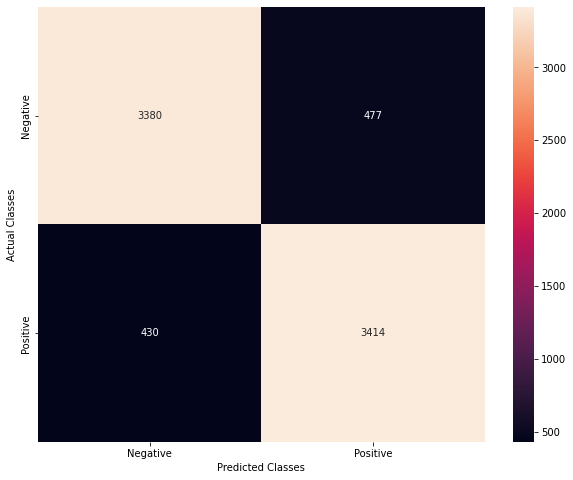

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Research Assignment 4/LSTM_500_Dims_1_Layers_8_Units')

print('Model Summary')
print('-------------')
model.summary()

print('Confusion Matrix')
print('----------------')
pred_test = model.predict_classes(X_test_seq)

conf_matrix = tf.math.confusion_matrix(y_test, pred_test)

fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(conf_matrix, annot=True, fmt='g')

ax.set_xlabel("Predicted Classes")
ax.set_ylabel("Actual Classes")
ax.set_xticklabels(['Negative','Positive'])
ax.set_yticklabels(['Negative','Positive'], va='center')
plt.show()
print()

#### Reduce LSTM Units

Word Embedding Dims: 500
LSTM Layers: 1
LSTM Units: 1
-----------------------
Accuracy: 0.8726139664649963
Precision: 0.8940269947052002
Recall: 0.844953179359436
F1: 0.8687976583926743
Total Time (s): 90.40184187889099

Model Accuracy Trend
--------------------


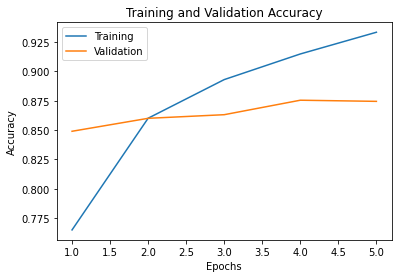


Confusion Matrix
----------------


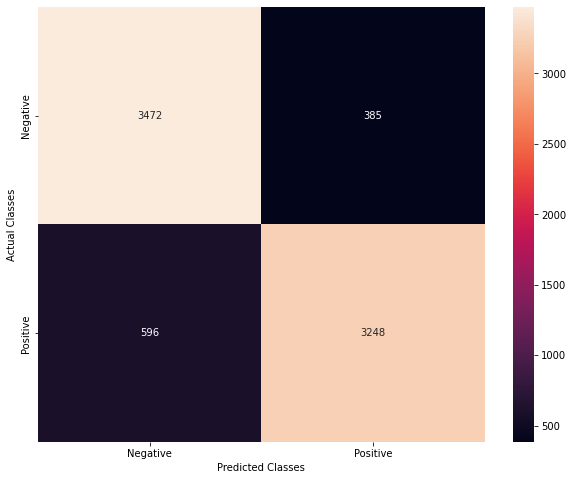


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_500_Dims_1_Layers_1_Units/assets

Word Embedding Dims: 500
LSTM Layers: 1
LSTM Units: 2
-----------------------
Accuracy: 0.8669003844261169
Precision: 0.9163958430290222
Recall: 0.8069719076156616
F1: 0.8582099802013301
Total Time (s): 92.48079991340637

Model Accuracy Trend
--------------------


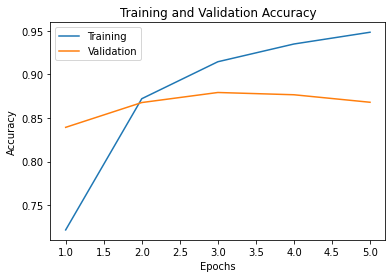


Confusion Matrix
----------------


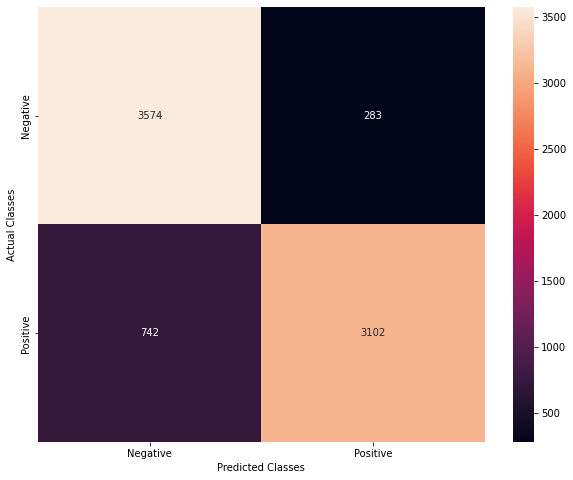


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_500_Dims_1_Layers_2_Units/assets

Word Embedding Dims: 500
LSTM Layers: 1
LSTM Units: 3
-----------------------
Accuracy: 0.8423581123352051
Precision: 0.9305828213691711
Recall: 0.7393340468406677
F1: 0.824006962670936
Total Time (s): 92.67104625701904

Model Accuracy Trend
--------------------


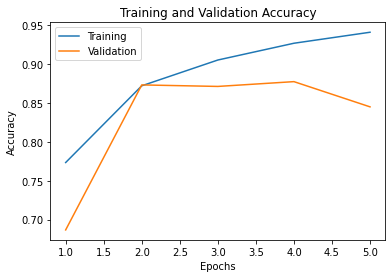


Confusion Matrix
----------------


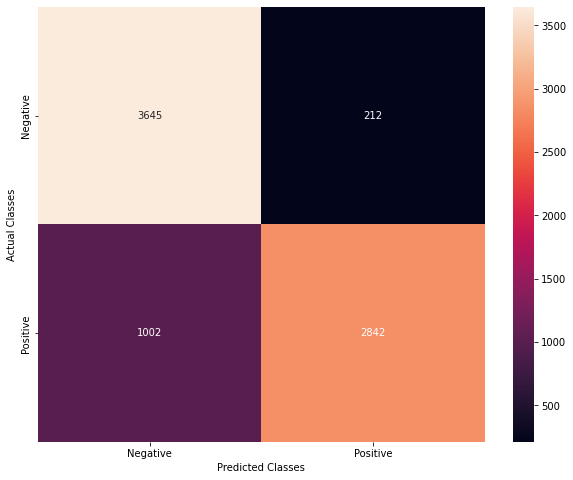


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_500_Dims_1_Layers_3_Units/assets

Word Embedding Dims: 500
LSTM Layers: 1
LSTM Units: 4
-----------------------
Accuracy: 0.8706661462783813
Precision: 0.9033994078636169
Recall: 0.8296045660972595
F1: 0.8649308195875339
Total Time (s): 93.85107207298279

Model Accuracy Trend
--------------------


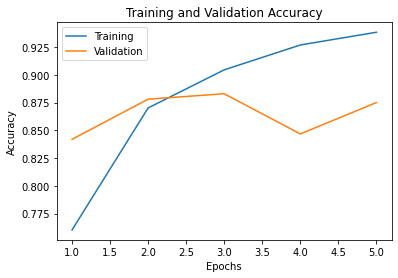


Confusion Matrix
----------------


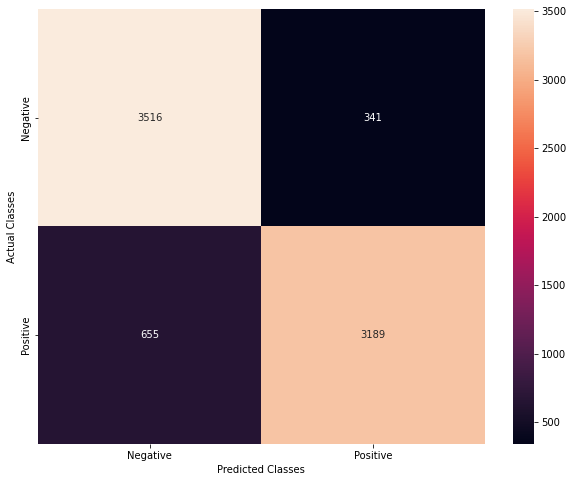


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_500_Dims_1_Layers_4_Units/assets

Word Embedding Dims: 500
LSTM Layers: 1
LSTM Units: 5
-----------------------
Accuracy: 0.877937912940979
Precision: 0.898463249206543
Recall: 0.851716935634613
F1: 0.8744658087463906
Total Time (s): 90.83017182350159

Model Accuracy Trend
--------------------


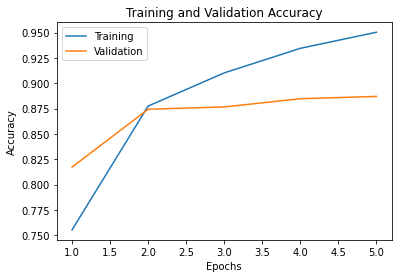


Confusion Matrix
----------------


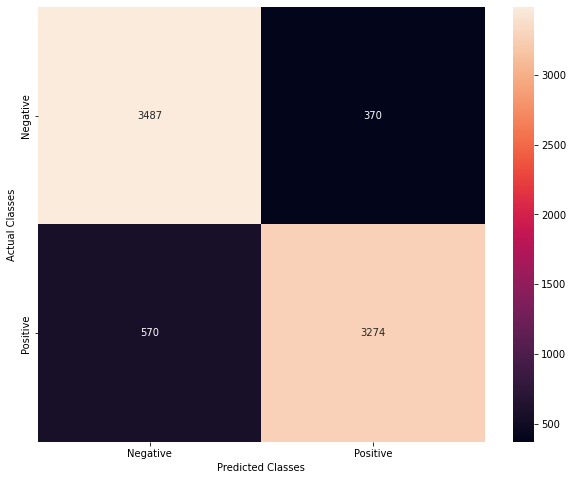


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_500_Dims_1_Layers_5_Units/assets

Word Embedding Dims: 500
LSTM Layers: 1
LSTM Units: 6
-----------------------
Accuracy: 0.8722243905067444
Precision: 0.8959025740623474
Recall: 0.8418314456939697
F1: 0.8680257744273386
Total Time (s): 92.22833013534546

Model Accuracy Trend
--------------------


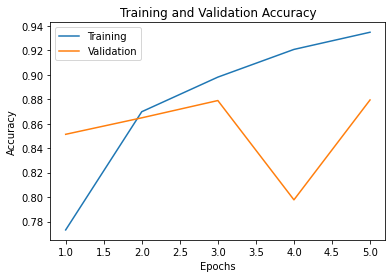


Confusion Matrix
----------------


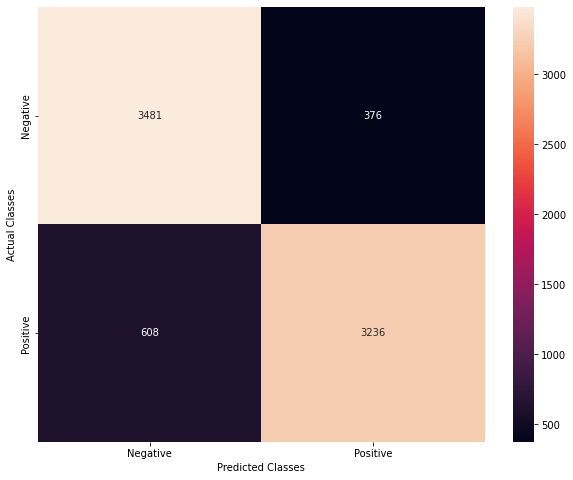


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_500_Dims_1_Layers_6_Units/assets

Word Embedding Dims: 500
LSTM Layers: 1
LSTM Units: 7
-----------------------
Accuracy: 0.8733930587768555
Precision: 0.8894922733306885
Recall: 0.8522372245788574
F1: 0.8704663120392911
Total Time (s): 92.5059425830841

Model Accuracy Trend
--------------------


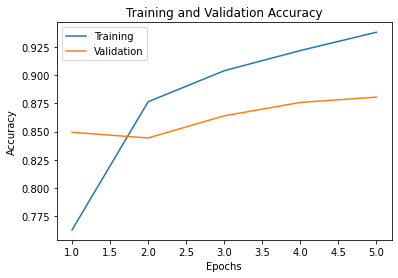


Confusion Matrix
----------------


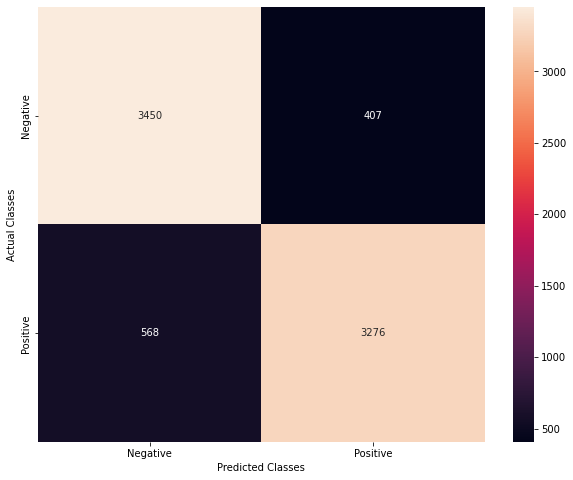


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_500_Dims_1_Layers_7_Units/assets



In [ ]:
for LSTM_units in range(1,8):

  dims = 500
  LSTM_layers = 1
  num_epochs = 5

  start_time = time.time()

  print('Word Embedding Dims:',dims)
  print('LSTM Layers:',LSTM_layers)
  print('LSTM Units:',LSTM_units)
  print('-----------------------')

  seed(5)
  tf.random.set_seed(5)

  model = models.Sequential()
  model.add(Embedding(input_dim = voc_size, output_dim = dims, input_length = X_train_seq.shape[1]))          
  model.add(LSTM(units=LSTM_units))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['Precision','Recall','accuracy'])

  history = model.fit(X_train_seq, y_train, batch_size=128, epochs=num_epochs, validation_split=0.2, verbose=False)

  total_time = time.time() - start_time

  loss, precision, recall, accuracy = model.evaluate(X_test_seq, y_test, verbose=0)

  f1_score = (2 * precision * recall) / (precision + recall)

  print('Accuracy:',accuracy)
  print('Precision:',precision)
  print('Recall:',recall)
  print('F1:',f1_score)
  print('Total Time (s):',total_time)
  print()

  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  print('Model Accuracy Trend')
  print('--------------------')
  plot = plt.plot(range(1, len(acc) + 1), history.history['accuracy'], label = 'Training')
  plot = plt.plot(range(1, len(val_acc) + 1), history.history['val_accuracy'], label = 'Validation')
  plot = plt.title('Training and Validation Accuracy')
  plot = plt.xlabel('Epochs')
  plot = plt.ylabel('Accuracy')
  plot = plt.legend()
  plt.show()
  print()

  print('Confusion Matrix')
  print('----------------')
  pred_test = model.predict_classes(X_test_seq)

  conf_matrix = tf.math.confusion_matrix(y_test, pred_test)

  fig, ax = plt.subplots(figsize=(10,8))
  ax = sns.heatmap(conf_matrix, annot=True, fmt='g')

  ax.set_xlabel("Predicted Classes")
  ax.set_ylabel("Actual Classes")
  ax.set_xticklabels(['Negative','Positive'])
  ax.set_yticklabels(['Negative','Positive'], va='center')
  plt.show()
  print()

  model_name = 'LSTM_{}_Dims_{}_Layers_{}_Units'.format(dims,LSTM_layers,LSTM_units)

  model.save('/content/drive/MyDrive/Research Assignment 4/'+model_name)
  print()

  lstm_results = lstm_results.append(
      {'Model':model_name,
        'Embed_Dims':dims,
        'LSTM Layers':LSTM_layers,
        'LSTM Units':LSTM_units,
        'Bidirectional':0,
        'Epochs':num_epochs,
        'Time':total_time,
        'Test Accuracy':accuracy,
        'Test Precision':precision,
        'Test Recall':recall,
        'Test F1':f1_score
      }, ignore_index=True)
  
  lstm_results.to_csv('/content/drive/MyDrive/Research Assignment 4/'+'LSTM_Results.csv')

#### Reduce Word Embedding Dimensions

Word Embedding Dims: 1
LSTM Layers: 1
LSTM Units: 8
-----------------------
Accuracy: 0.854174792766571
Precision: 0.8510967493057251
Recall: 0.8579604625701904
F1: 0.8545148233215979
Total Time (s): 19.711127996444702

Model Accuracy Trend
--------------------


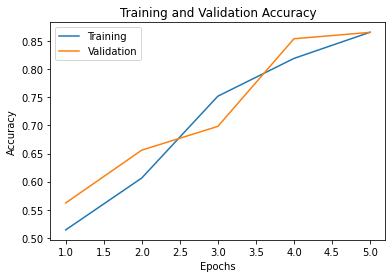


Confusion Matrix
----------------


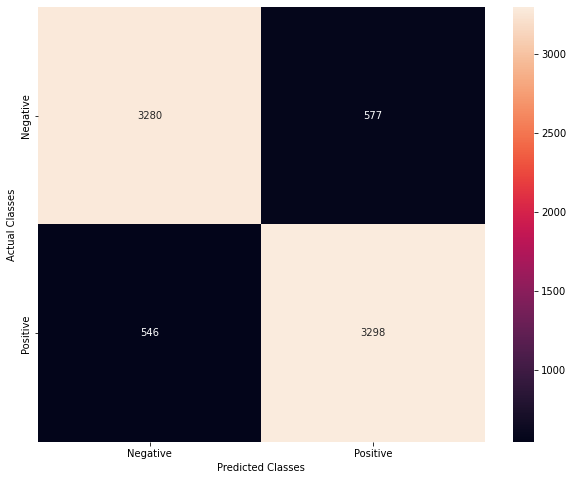


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_1_Dims_1_Layers_8_Units/assets

Word Embedding Dims: 2
LSTM Layers: 1
LSTM Units: 8
-----------------------
Accuracy: 0.8768991231918335
Precision: 0.8523114323616028
Recall: 0.9112903475761414
F1: 0.8808146944230708
Total Time (s): 20.338643074035645

Model Accuracy Trend
--------------------


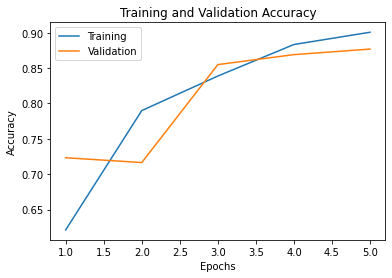


Confusion Matrix
----------------


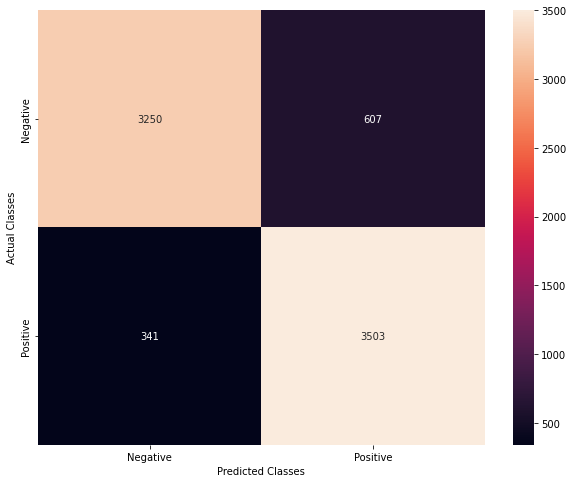


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_2_Dims_1_Layers_8_Units/assets

Word Embedding Dims: 4
LSTM Layers: 1
LSTM Units: 8
-----------------------
Accuracy: 0.8732632398605347
Precision: 0.8809776902198792
Recall: 0.8626430630683899
F1: 0.8717139799500283
Total Time (s): 19.81888699531555

Model Accuracy Trend
--------------------


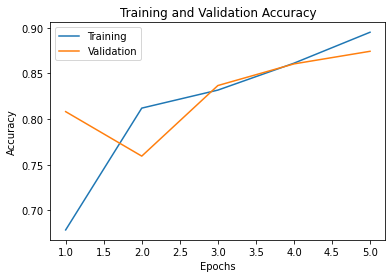


Confusion Matrix
----------------


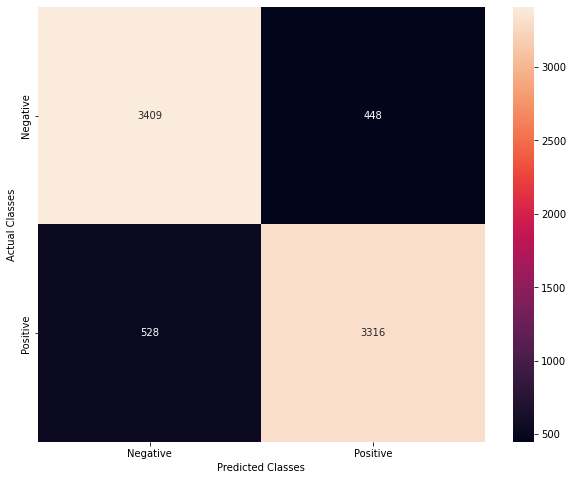


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_4_Dims_1_Layers_8_Units/assets

Word Embedding Dims: 8
LSTM Layers: 1
LSTM Units: 8
-----------------------
Accuracy: 0.8804051280021667
Precision: 0.9083542823791504
Recall: 0.8457335829734802
F1: 0.8759261574292735
Total Time (s): 20.031910181045532

Model Accuracy Trend
--------------------


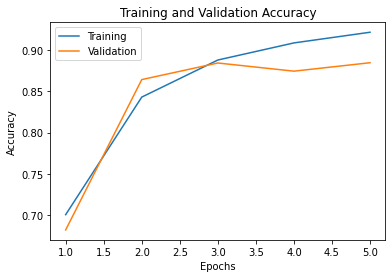


Confusion Matrix
----------------


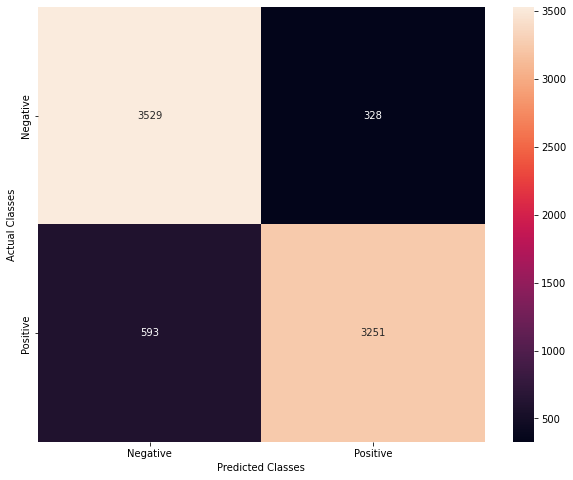


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_8_Dims_1_Layers_8_Units/assets

Word Embedding Dims: 16
LSTM Layers: 1
LSTM Units: 8
-----------------------
Accuracy: 0.85300612449646
Precision: 0.938551127910614
Recall: 0.754942774772644
F1: 0.8367935563844277
Total Time (s): 20.876673460006714

Model Accuracy Trend
--------------------


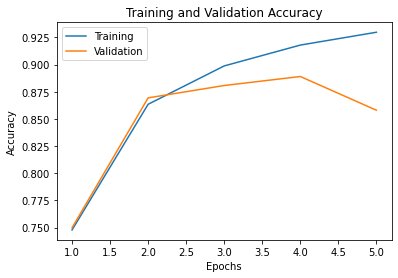


Confusion Matrix
----------------


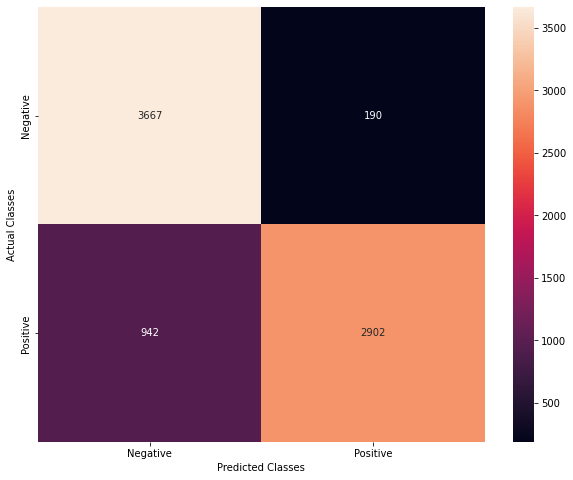


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_16_Dims_1_Layers_8_Units/assets

Word Embedding Dims: 32
LSTM Layers: 1
LSTM Units: 8
-----------------------
Accuracy: 0.8643033504486084
Precision: 0.9344924092292786
Recall: 0.7830384969711304
F1: 0.8520877602984359
Total Time (s): 23.36689567565918

Model Accuracy Trend
--------------------


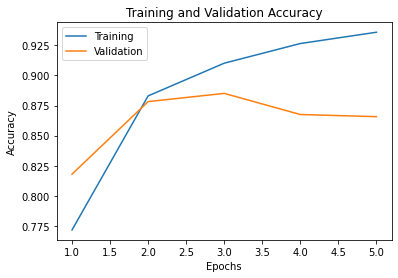


Confusion Matrix
----------------


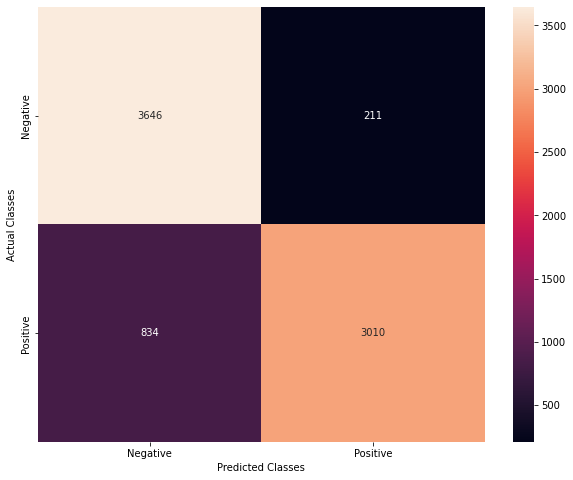


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_32_Dims_1_Layers_8_Units/assets

Word Embedding Dims: 64
LSTM Layers: 1
LSTM Units: 8
-----------------------
Accuracy: 0.8771588206291199
Precision: 0.9081690311431885
Recall: 0.8387096524238586
F1: 0.8720584201037697
Total Time (s): 26.5333354473114

Model Accuracy Trend
--------------------


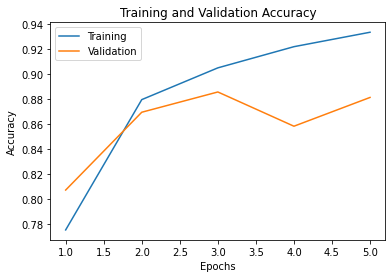


Confusion Matrix
----------------


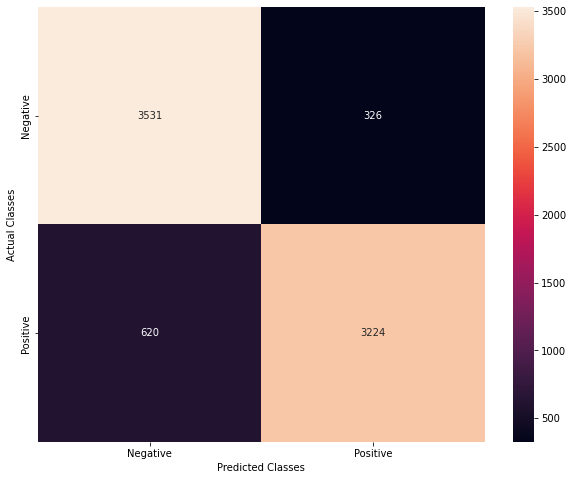


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/LSTM_64_Dims_1_Layers_8_Units/assets



In [ ]:
for dims in [1,2,4,8,16,32,64]:
  
  #dims = 500
  LSTM_units = 8
  LSTM_layers = 1
  num_epochs = 5

  start_time = time.time()

  print('Word Embedding Dims:',dims)
  print('LSTM Layers:',LSTM_layers)
  print('LSTM Units:',LSTM_units)
  print('-----------------------')

  seed(5)
  tf.random.set_seed(5)

  model = models.Sequential()
  model.add(Embedding(input_dim = voc_size, output_dim = dims, input_length = X_train_seq.shape[1]))          
  model.add(LSTM(units=LSTM_units))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['Precision','Recall','accuracy'])

  history = model.fit(X_train_seq, y_train, batch_size=128, epochs=num_epochs, validation_split=0.2, verbose=False)

  total_time = time.time() - start_time

  loss, precision, recall, accuracy = model.evaluate(X_test_seq, y_test, verbose=0)

  f1_score = (2 * precision * recall) / (precision + recall)

  print('Accuracy:',accuracy)
  print('Precision:',precision)
  print('Recall:',recall)
  print('F1:',f1_score)
  print('Total Time (s):',total_time)
  print()

  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  print('Model Accuracy Trend')
  print('--------------------')
  plot = plt.plot(range(1, len(acc) + 1), history.history['accuracy'], label = 'Training')
  plot = plt.plot(range(1, len(val_acc) + 1), history.history['val_accuracy'], label = 'Validation')
  plot = plt.title('Training and Validation Accuracy')
  plot = plt.xlabel('Epochs')
  plot = plt.ylabel('Accuracy')
  plot = plt.legend()
  plt.show()
  print()

  print('Confusion Matrix')
  print('----------------')
  pred_test = model.predict_classes(X_test_seq)

  conf_matrix = tf.math.confusion_matrix(y_test, pred_test)

  fig, ax = plt.subplots(figsize=(10,8))
  ax = sns.heatmap(conf_matrix, annot=True, fmt='g')

  ax.set_xlabel("Predicted Classes")
  ax.set_ylabel("Actual Classes")
  ax.set_xticklabels(['Negative','Positive'])
  ax.set_yticklabels(['Negative','Positive'], va='center')
  plt.show()
  print()

  model_name = 'LSTM_{}_Dims_{}_Layers_{}_Units'.format(dims,LSTM_layers,LSTM_units)

  model.save('/content/drive/MyDrive/Research Assignment 4/'+model_name)
  print()

  lstm_results = lstm_results.append(
      {'Model':model_name,
        'Embed_Dims':dims,
        'LSTM Layers':LSTM_layers,
        'LSTM Units':LSTM_units,
        'Bidirectional':0,
        'Epochs':num_epochs,
        'Time':total_time,
        'Test Accuracy':accuracy,
        'Test Precision':precision,
        'Test Recall':recall,
        'Test F1':f1_score
      }, ignore_index=True)
  
  lstm_results.to_csv('/content/drive/MyDrive/Research Assignment 4/'+'LSTM_Results.csv')

### LSTM Summary

In [6]:
lstm_results = pd.read_csv('/content/drive/MyDrive/Research Assignment 4/LSTM_Results.csv', header=0, index_col=0)
lstm_results.sort_values(by='Test F1',ascending=False).head()

Model  Embed_Dims  ...  Test Recall   Test F1
2           LSTM_500_Dims_1_Layers_8_Units         500  ...     0.888137  0.882741
56         LSTM_500_Dims_1_Layers_64_Units         500  ...     0.863424  0.881658
7           LSTM_300_Dims_2_Layers_8_Units         300  ...     0.919615  0.881656
80            LSTM_2_Dims_1_Layers_8_Units           2  ...     0.911290  0.880815
41  LSTM_500_Dims_1_Bidirectional_32_Units         500  ...     0.852497  0.879850

[5 rows x 11 columns]

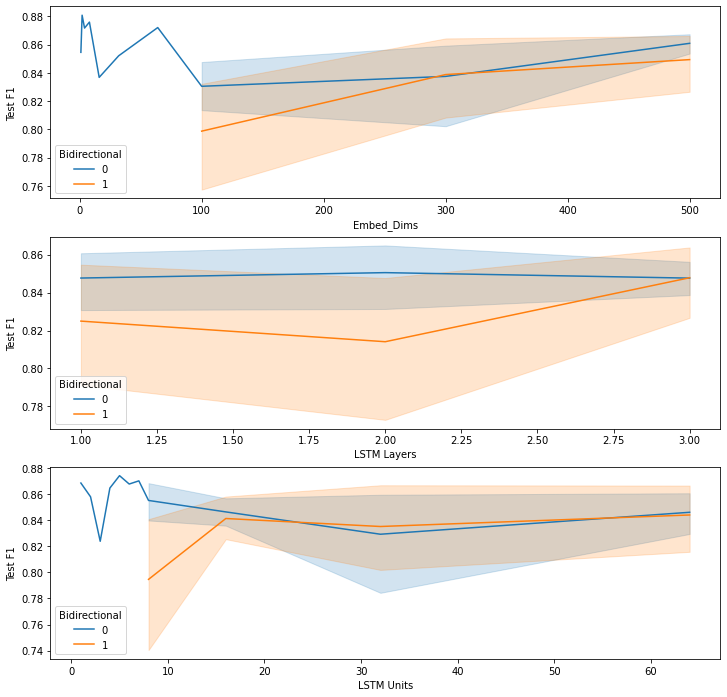

In [ ]:
plot_df = lstm_results[['Embed_Dims','LSTM Layers','LSTM Units','Bidirectional','Test F1']]

fig, ax = plt.subplots(3,1,figsize=(12,12))

sns.lineplot(x='Embed_Dims',y='Test F1',data=plot_df,hue='Bidirectional',ax=ax[0])
sns.lineplot(x='LSTM Layers',y='Test F1',data=plot_df,hue='Bidirectional',ax=ax[1])
sns.lineplot(x='LSTM Units',y='Test F1',data=plot_df,hue='Bidirectional',ax=ax[2])

## GRU

Word Embedding Dims: 100
GRU Layers: 1
GRU Units: 8
-----------------------
Accuracy: 0.8380729556083679
Precision: 0.940617561340332
Recall: 0.7211238145828247
F1: 0.8163745980273416
Total Time (s): 33.38325619697571

Model Accuracy Trend
--------------------


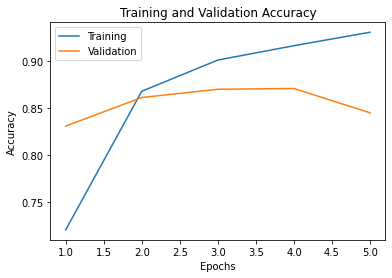


Confusion Matrix
----------------
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


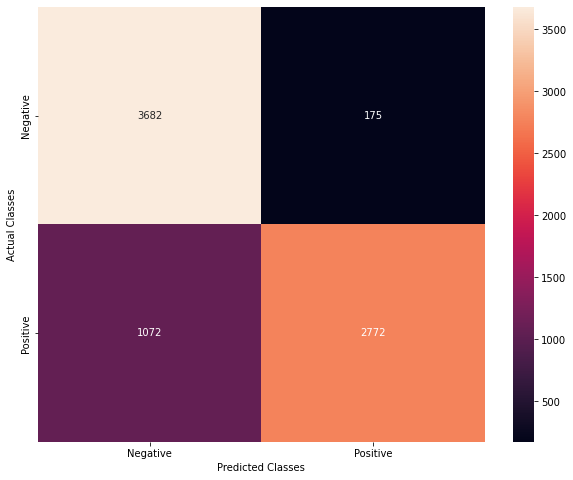


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_100_Dims_1_Layers_8_Units/assets

Word Embedding Dims: 300
GRU Layers: 1
GRU Units: 8
-----------------------
Accuracy: 0.8592390418052673
Precision: 0.932330846786499
Recall: 0.774193525314331
F1: 0.8459351847924118
Total Time (s): 50.76484704017639

Model Accuracy Trend
--------------------


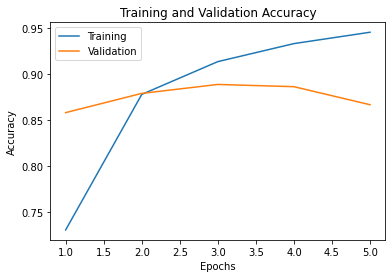


Confusion Matrix
----------------


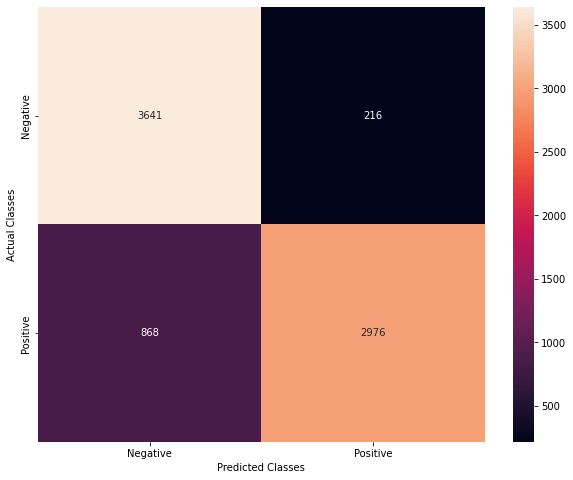


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_300_Dims_1_Layers_8_Units/assets

Word Embedding Dims: 500
GRU Layers: 1
GRU Units: 8
-----------------------
Accuracy: 0.860537588596344
Precision: 0.9290582537651062
Recall: 0.7801768779754639
F1: 0.8481334772725844
Total Time (s): 75.52616930007935

Model Accuracy Trend
--------------------


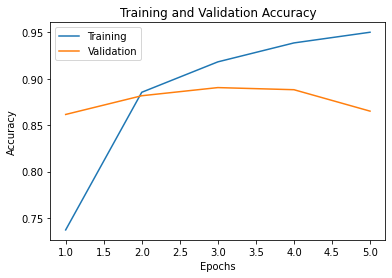


Confusion Matrix
----------------


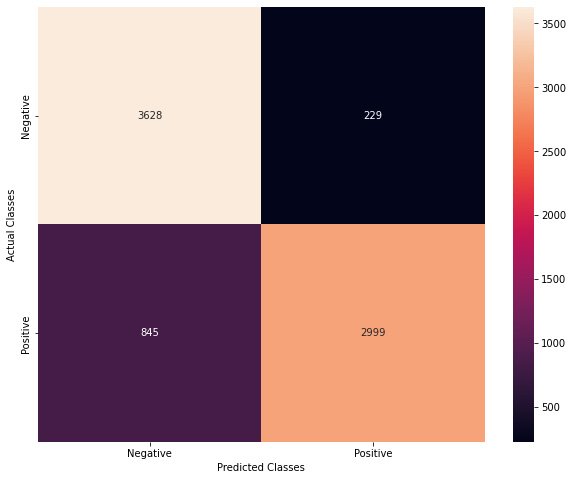


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_500_Dims_1_Layers_8_Units/assets

Word Embedding Dims: 100
GRU Layers: 1
GRU Units: 8
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8141799569129944
Precision: 0.936663031578064
Recall: 0.673257052898407
F1: 0.7834115472932983
Total Time (s): 38.65559530258179

Model Accuracy Trend
--------------------


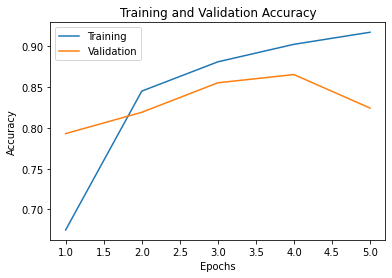


Confusion Matrix
----------------


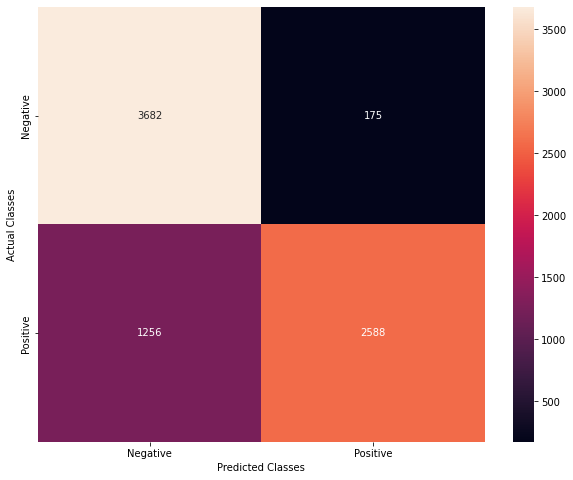


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_100_Dims_1_Bidirectional_8_Units/assets

Word Embedding Dims: 300
GRU Layers: 1
GRU Units: 8
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8722243905067444
Precision: 0.9208357930183411
Recall: 0.8139958381652832
F1: 0.8641259355401049
Total Time (s): 64.00441360473633

Model Accuracy Trend
--------------------


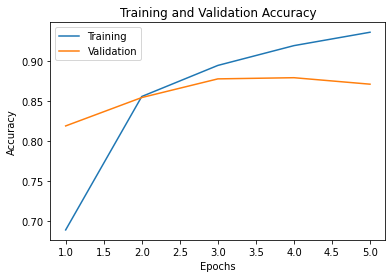


Confusion Matrix
----------------


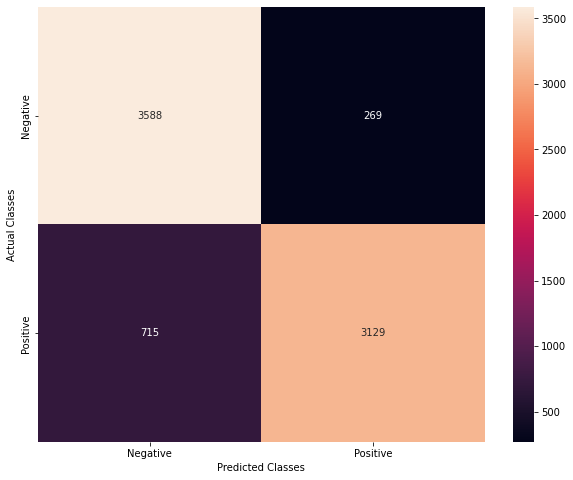


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_300_Dims_1_Bidirectional_8_Units/assets

Word Embedding Dims: 500
GRU Layers: 1
GRU Units: 8
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8843007683753967
Precision: 0.9015501737594604
Recall: 0.8623829483985901
F1: 0.8815317170582405
Total Time (s): 89.67343044281006

Model Accuracy Trend
--------------------


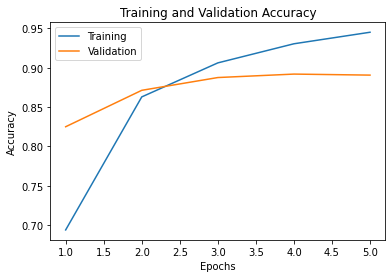


Confusion Matrix
----------------


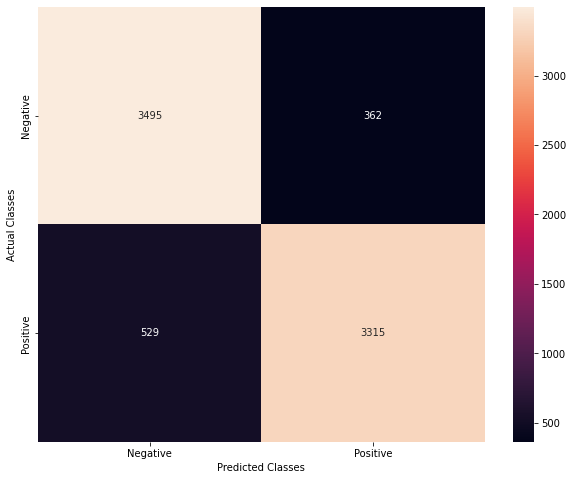


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_500_Dims_1_Bidirectional_8_Units/assets

Word Embedding Dims: 100
GRU Layers: 2
GRU Units: 8
-----------------------
Accuracy: 0.8470328450202942
Precision: 0.9464166164398193
Recall: 0.7351716756820679
F1: 0.8275256114247286
Total Time (s): 38.25538754463196

Model Accuracy Trend
--------------------


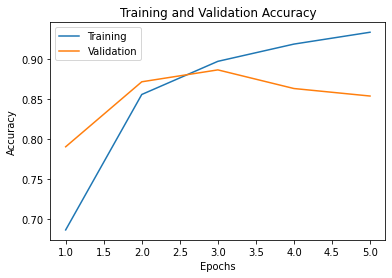


Confusion Matrix
----------------


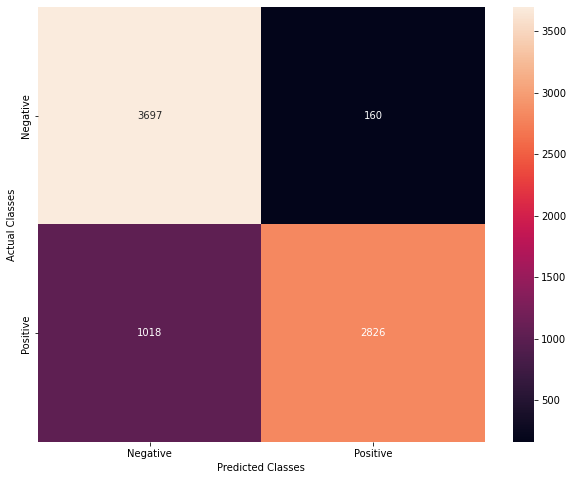


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_100_Dims_2_Layers_8_Units/assets

Word Embedding Dims: 300
GRU Layers: 2
GRU Units: 8
-----------------------
Accuracy: 0.8636540770530701
Precision: 0.9290540814399719
Recall: 0.7869406938552856
F1: 0.8521126917203582
Total Time (s): 63.3070387840271

Model Accuracy Trend
--------------------


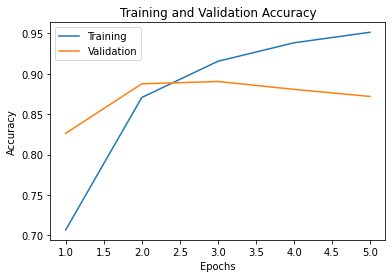


Confusion Matrix
----------------


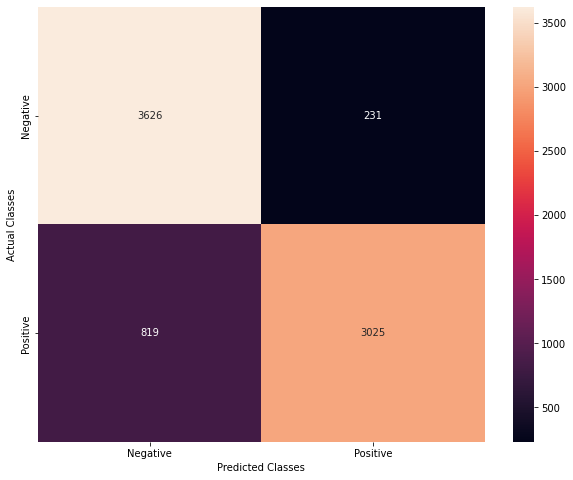


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_300_Dims_2_Layers_8_Units/assets

Word Embedding Dims: 500
GRU Layers: 2
GRU Units: 8
-----------------------
Accuracy: 0.8743020296096802
Precision: 0.9187536239624023
Recall: 0.820759654045105
F1: 0.8669964364052568
Total Time (s): 88.8079125881195

Model Accuracy Trend
--------------------


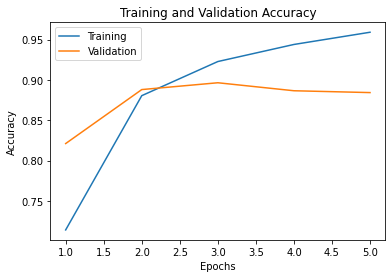


Confusion Matrix
----------------


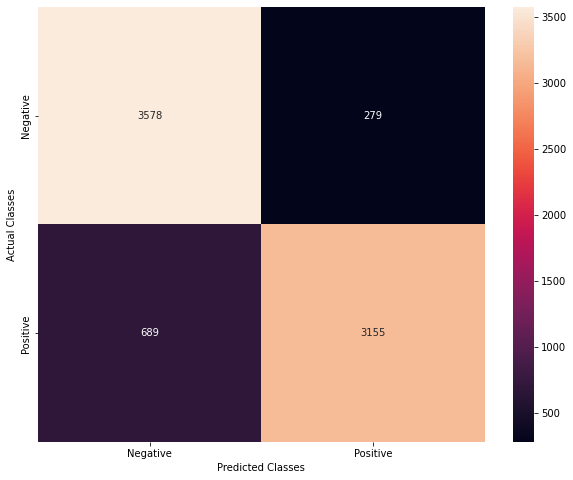


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_500_Dims_2_Layers_8_Units/assets

Word Embedding Dims: 100
GRU Layers: 2
GRU Units: 8
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8671600818634033
Precision: 0.9028849005699158
Recall: 0.8223205208778381
F1: 0.8607215958159136
Total Time (s): 63.34998941421509

Model Accuracy Trend
--------------------


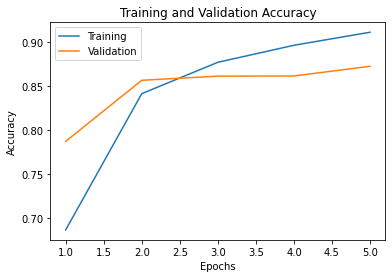


Confusion Matrix
----------------


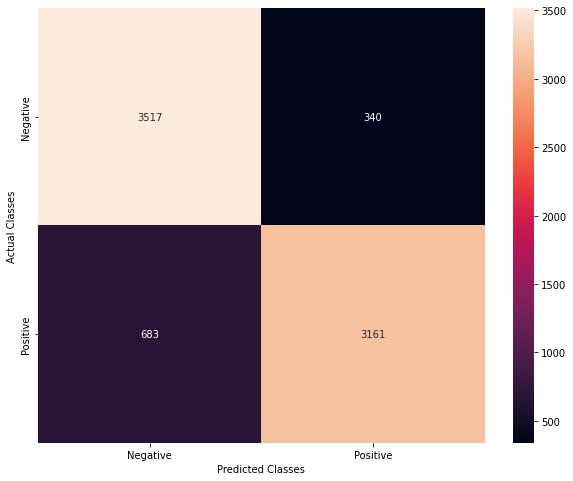


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_100_Dims_2_Bidirectional_8_Units/assets

Word Embedding Dims: 300
GRU Layers: 2
GRU Units: 8
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8654720187187195
Precision: 0.9228915572166443
Recall: 0.7970863580703735
F1: 0.8553880415527951
Total Time (s): 88.67931056022644

Model Accuracy Trend
--------------------


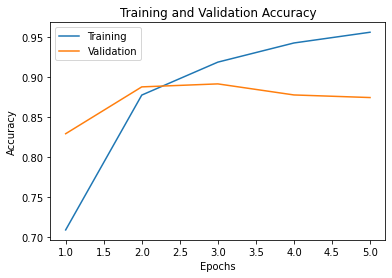


Confusion Matrix
----------------


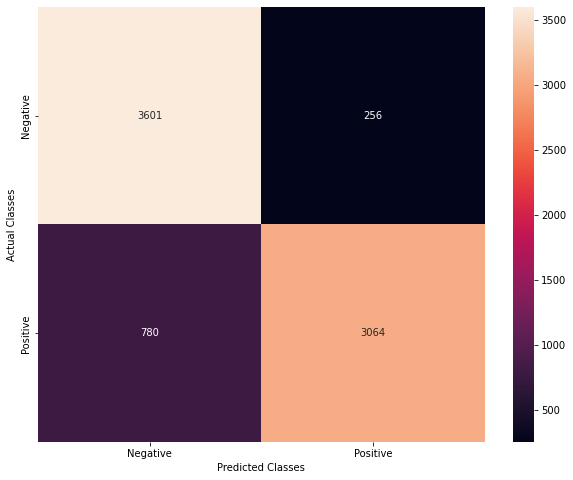


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_300_Dims_2_Bidirectional_8_Units/assets

Word Embedding Dims: 500
GRU Layers: 2
GRU Units: 8
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8845604658126831
Precision: 0.9172549843788147
Recall: 0.844953179359436
F1: 0.8796208430791147
Total Time (s): 115.99055480957031

Model Accuracy Trend
--------------------


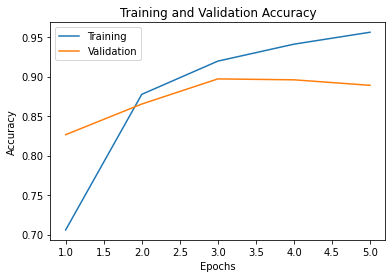


Confusion Matrix
----------------


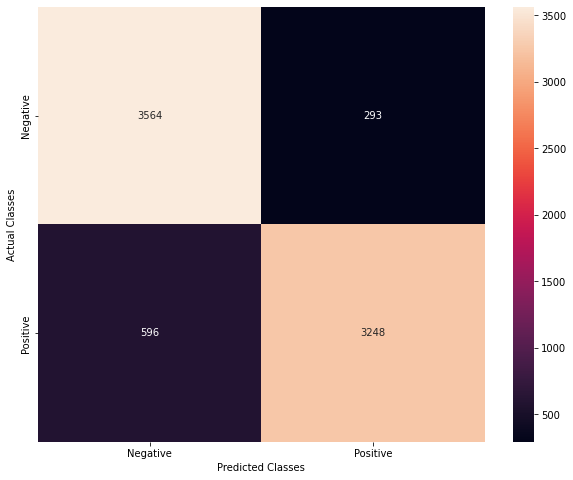


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_500_Dims_2_Bidirectional_8_Units/assets

Word Embedding Dims: 100
GRU Layers: 3
GRU Units: 8
-----------------------
Accuracy: 0.8163874745368958
Precision: 0.9581447839736938
Recall: 0.6610301733016968
F1: 0.782327579552016
Total Time (s): 50.35386657714844

Model Accuracy Trend
--------------------


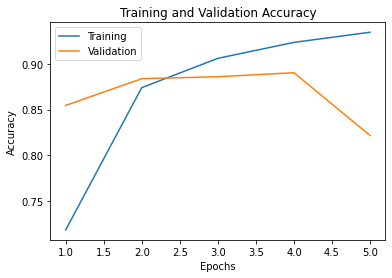


Confusion Matrix
----------------


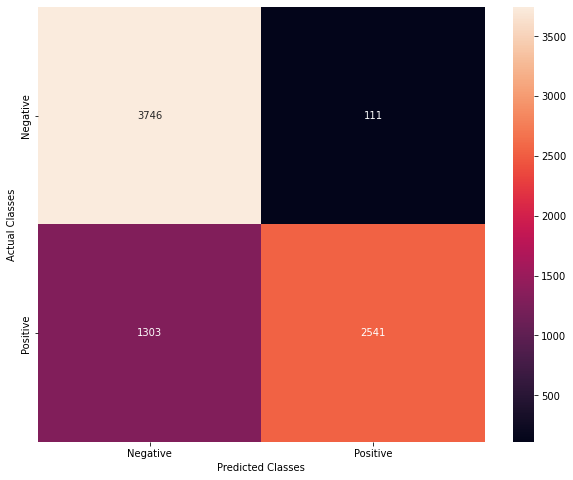


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_100_Dims_3_Layers_8_Units/assets

Word Embedding Dims: 300
GRU Layers: 3
GRU Units: 8
-----------------------
Accuracy: 0.8635241985321045
Precision: 0.9346405267715454
Recall: 0.7812174558639526
F1: 0.8510698459441437
Total Time (s): 75.70301818847656

Model Accuracy Trend
--------------------


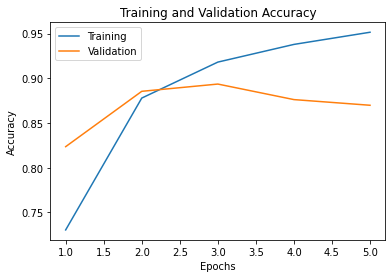


Confusion Matrix
----------------


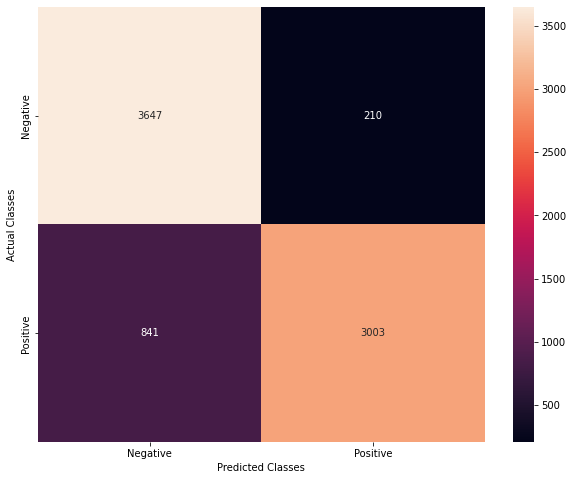


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_300_Dims_3_Layers_8_Units/assets

Word Embedding Dims: 500
GRU Layers: 3
GRU Units: 8
-----------------------
Accuracy: 0.8588495254516602
Precision: 0.93199622631073
Recall: 0.7736732363700867
F1: 0.8454868337283035
Total Time (s): 101.47472929954529

Model Accuracy Trend
--------------------


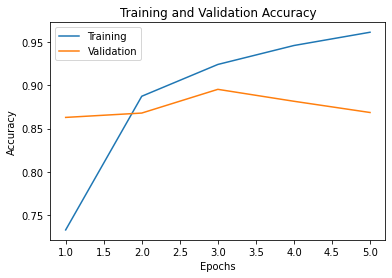


Confusion Matrix
----------------


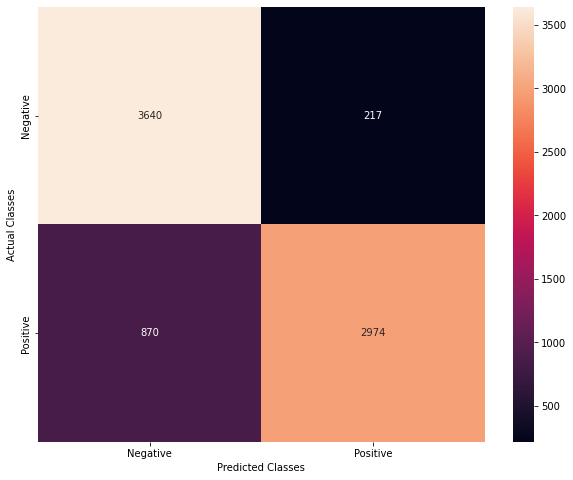


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_500_Dims_3_Layers_8_Units/assets

Word Embedding Dims: 100
GRU Layers: 3
GRU Units: 8
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8259966373443604
Precision: 0.9510086178779602
Recall: 0.6867846250534058
F1: 0.7975830891607155
Total Time (s): 87.9564037322998

Model Accuracy Trend
--------------------


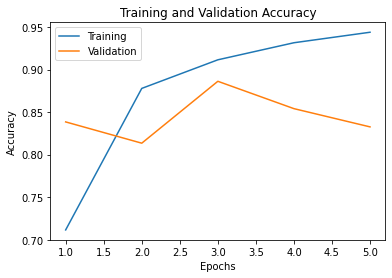


Confusion Matrix
----------------


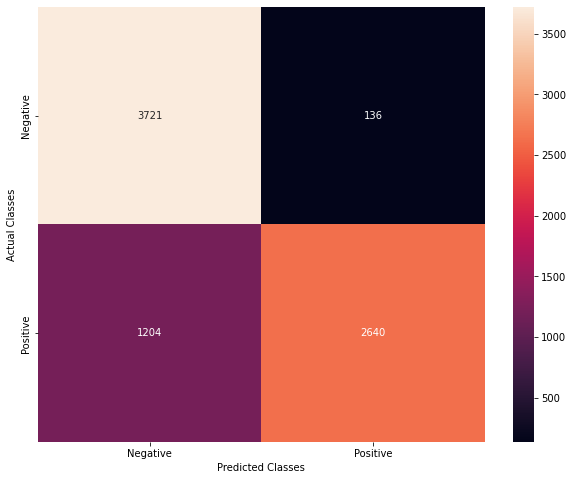


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_100_Dims_3_Bidirectional_8_Units/assets

Word Embedding Dims: 300
GRU Layers: 3
GRU Units: 8
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8706661462783813
Precision: 0.9122756123542786
Recall: 0.8197190165519714
F1: 0.863524234201161
Total Time (s): 114.14201378822327

Model Accuracy Trend
--------------------


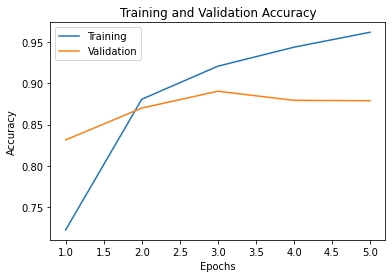


Confusion Matrix
----------------


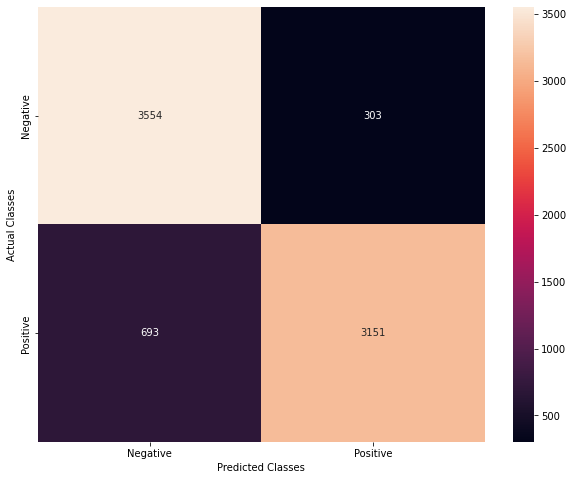


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_300_Dims_3_Bidirectional_8_Units/assets

Word Embedding Dims: 500
GRU Layers: 3
GRU Units: 8
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8711855411529541
Precision: 0.912377119064331
Recall: 0.820759654045105
F1: 0.8641468350572301
Total Time (s): 140.30079317092896

Model Accuracy Trend
--------------------


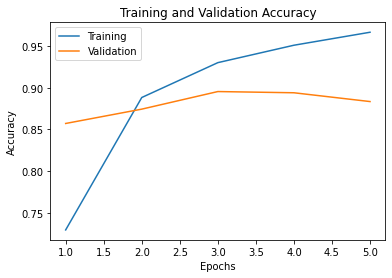


Confusion Matrix
----------------


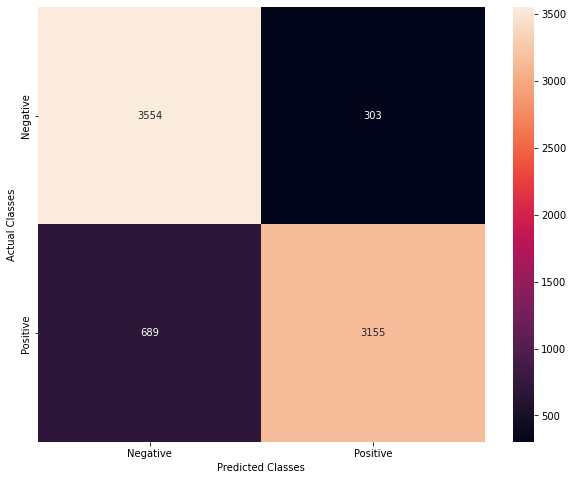


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_500_Dims_3_Bidirectional_8_Units/assets

Word Embedding Dims: 100
GRU Layers: 1
GRU Units: 16
-----------------------
Accuracy: 0.8052201271057129
Precision: 0.9643422961235046
Recall: 0.6331945657730103
F1: 0.764447213725732
Total Time (s): 27.44516110420227

Model Accuracy Trend
--------------------


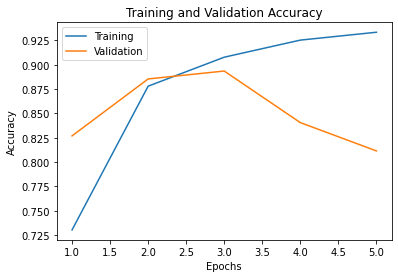


Confusion Matrix
----------------


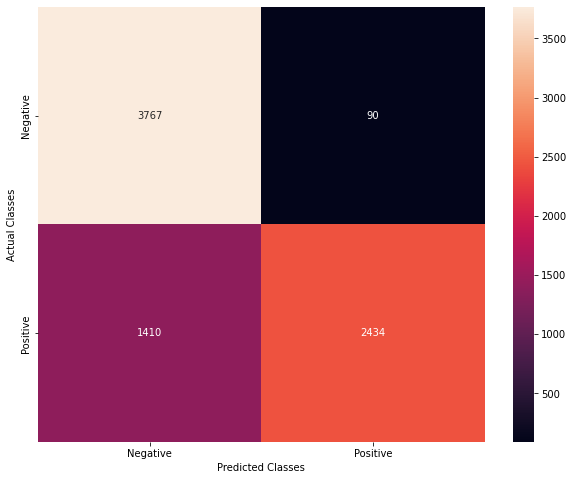


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_100_Dims_1_Layers_16_Units/assets

Word Embedding Dims: 300
GRU Layers: 1
GRU Units: 16
-----------------------
Accuracy: 0.8740423321723938
Precision: 0.9236438870429993
Recall: 0.815036416053772
F1: 0.8659480435416214
Total Time (s): 52.28039240837097

Model Accuracy Trend
--------------------


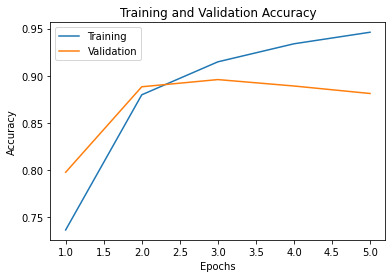


Confusion Matrix
----------------


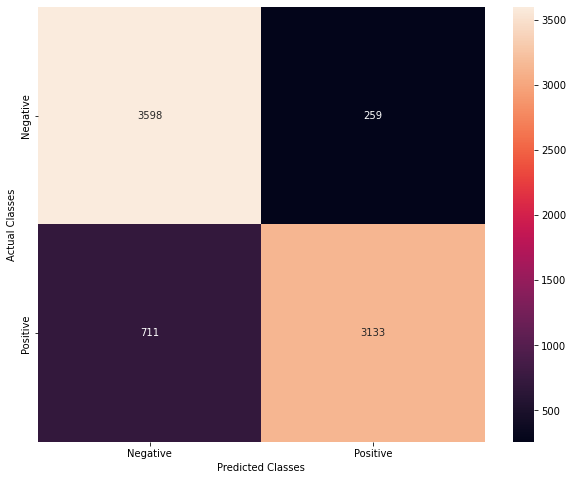


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_300_Dims_1_Layers_16_Units/assets

Word Embedding Dims: 500
GRU Layers: 1
GRU Units: 16
-----------------------
Accuracy: 0.8746916055679321
Precision: 0.9252585172653198
Recall: 0.8147763013839722
F1: 0.8665099162862228
Total Time (s): 81.37971091270447

Model Accuracy Trend
--------------------


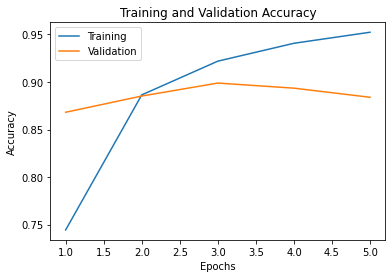


Confusion Matrix
----------------


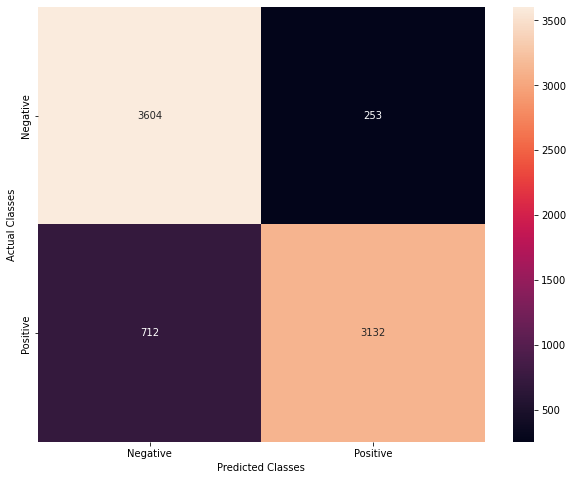


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_500_Dims_1_Layers_16_Units/assets

Word Embedding Dims: 100
GRU Layers: 1
GRU Units: 16
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8071678876876831
Precision: 0.9587709307670593
Recall: 0.6412591338157654
F1: 0.7685113301314392
Total Time (s): 41.09704232215881

Model Accuracy Trend
--------------------


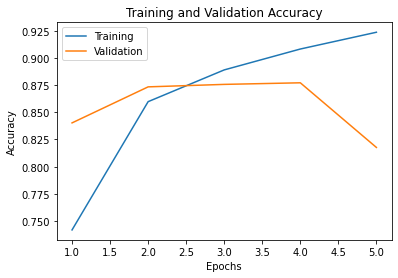


Confusion Matrix
----------------


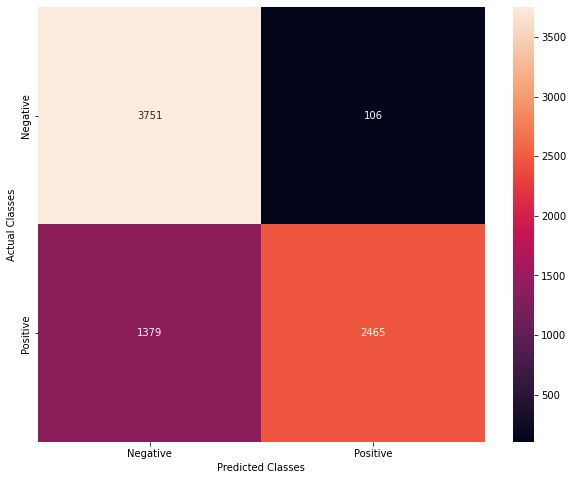


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_100_Dims_1_Bidirectional_16_Units/assets

Word Embedding Dims: 300
GRU Layers: 1
GRU Units: 16
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8544344902038574
Precision: 0.9315372705459595
Recall: 0.7645681500434875
F1: 0.839834268544894
Total Time (s): 65.07981038093567

Model Accuracy Trend
--------------------


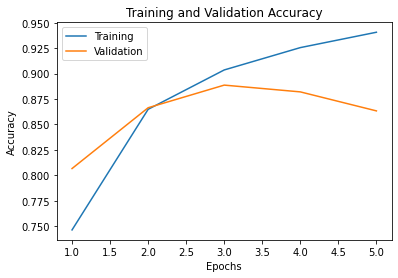


Confusion Matrix
----------------


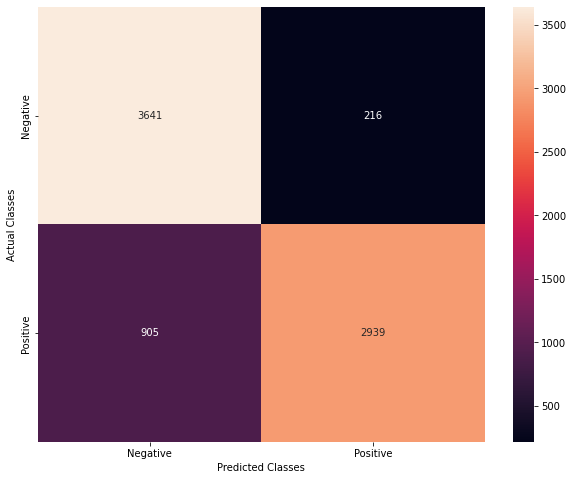


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_300_Dims_1_Bidirectional_16_Units/assets

Word Embedding Dims: 500
GRU Layers: 1
GRU Units: 16
Bidirectional Layer(s)
-----------------------
Accuracy: 0.839631199836731
Precision: 0.9478201270103455
Recall: 0.718262255191803
F1: 0.8172266020156875
Total Time (s): 93.23304963111877

Model Accuracy Trend
--------------------


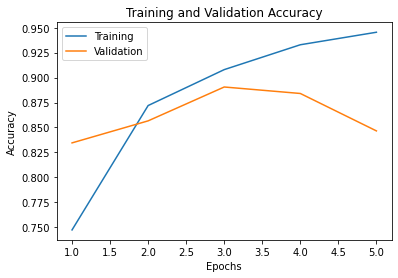


Confusion Matrix
----------------


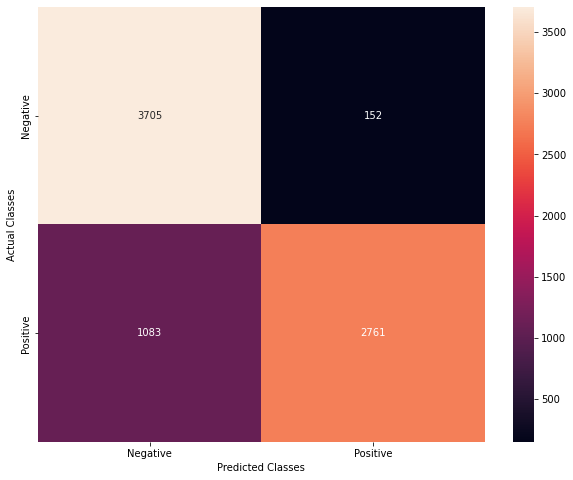


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_500_Dims_1_Bidirectional_16_Units/assets

Word Embedding Dims: 100
GRU Layers: 2
GRU Units: 16
-----------------------
Accuracy: 0.8518373966217041
Precision: 0.9444261789321899
Recall: 0.7471383810043335
F1: 0.834277405684101
Total Time (s): 39.85277056694031

Model Accuracy Trend
--------------------


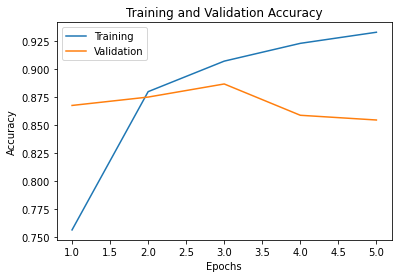


Confusion Matrix
----------------


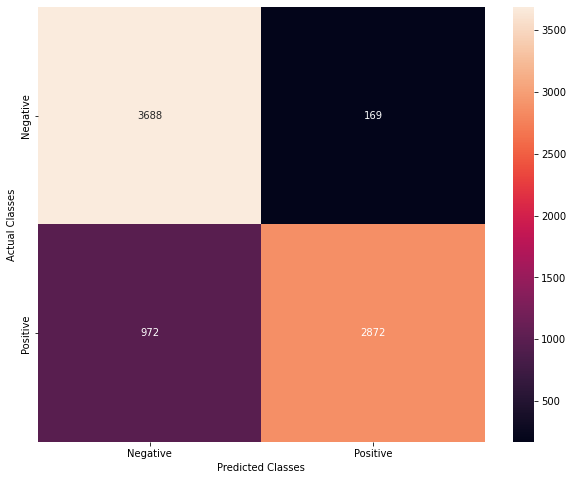


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_100_Dims_2_Layers_16_Units/assets

Word Embedding Dims: 300
GRU Layers: 2
GRU Units: 16
-----------------------
Accuracy: 0.8587196469306946
Precision: 0.9405370950698853
Recall: 0.7653486132621765
F1: 0.843947232710213
Total Time (s): 63.75562572479248

Model Accuracy Trend
--------------------


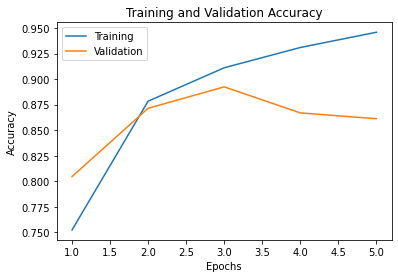


Confusion Matrix
----------------


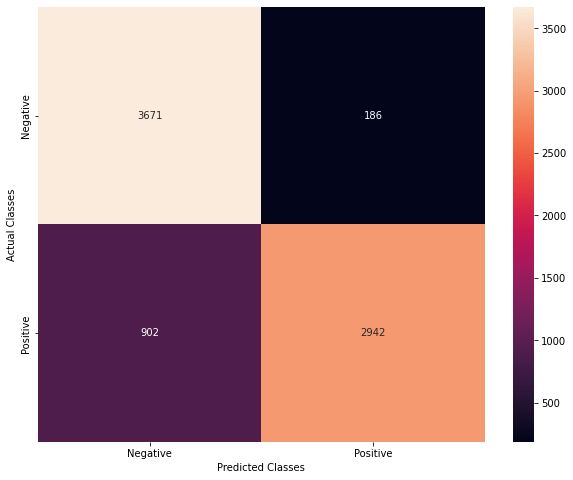


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_300_Dims_2_Layers_16_Units/assets

Word Embedding Dims: 500
GRU Layers: 2
GRU Units: 16
-----------------------
Accuracy: 0.8574211001396179
Precision: 0.9380982518196106
Recall: 0.7648283243179321
F1: 0.8426483255809195
Total Time (s): 89.38275265693665

Model Accuracy Trend
--------------------


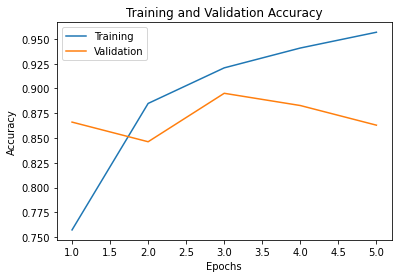


Confusion Matrix
----------------


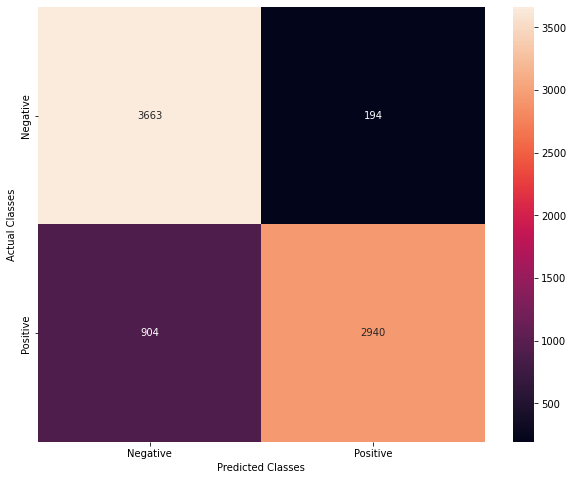


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_500_Dims_2_Layers_16_Units/assets

Word Embedding Dims: 100
GRU Layers: 2
GRU Units: 16
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8292429447174072
Precision: 0.9524150490760803
Recall: 0.692507803440094
F1: 0.8019280084656498
Total Time (s): 65.63988614082336

Model Accuracy Trend
--------------------


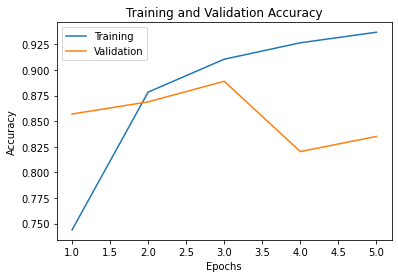


Confusion Matrix
----------------


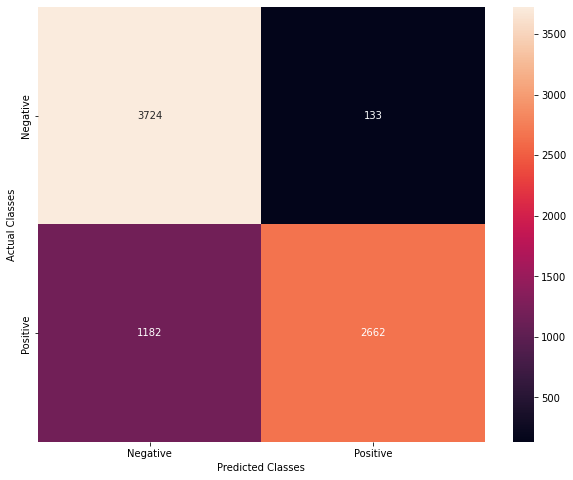


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_100_Dims_2_Bidirectional_16_Units/assets

Word Embedding Dims: 300
GRU Layers: 2
GRU Units: 16
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8484612107276917
Precision: 0.941603422164917
Recall: 0.742455780506134
F1: 0.8302545452343648
Total Time (s): 89.95950770378113

Model Accuracy Trend
--------------------


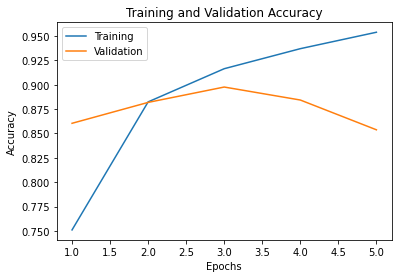


Confusion Matrix
----------------


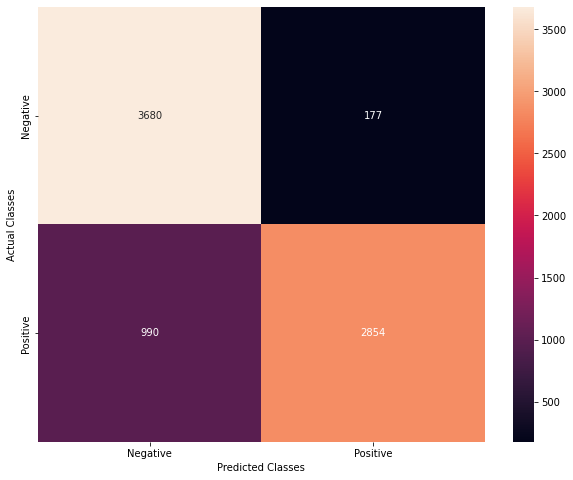


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_300_Dims_2_Bidirectional_16_Units/assets

Word Embedding Dims: 500
GRU Layers: 2
GRU Units: 16
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8523568511009216
Precision: 0.9331200122833252
Recall: 0.7585847973823547
F1: 0.8368489010695126
Total Time (s): 117.68244290351868

Model Accuracy Trend
--------------------


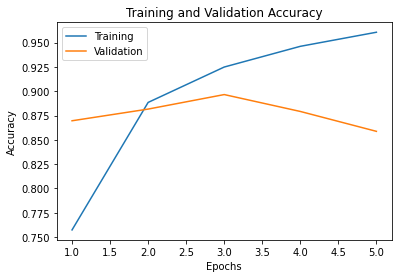


Confusion Matrix
----------------


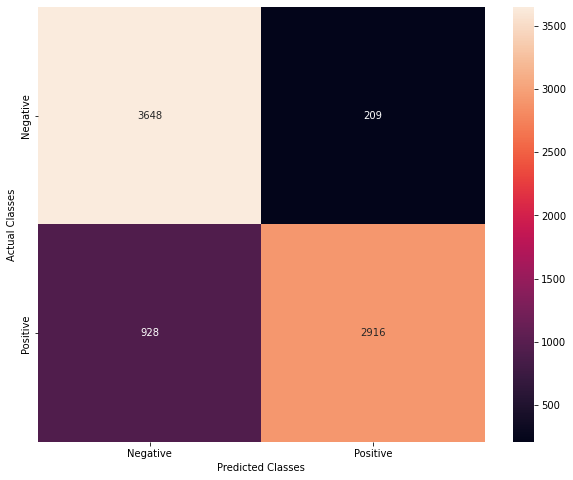


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_500_Dims_2_Bidirectional_16_Units/assets

Word Embedding Dims: 100
GRU Layers: 3
GRU Units: 16
-----------------------
Accuracy: 0.8745617270469666
Precision: 0.9318727254867554
Recall: 0.8077523708343506
F1: 0.8653846221460287
Total Time (s): 53.86730146408081

Model Accuracy Trend
--------------------


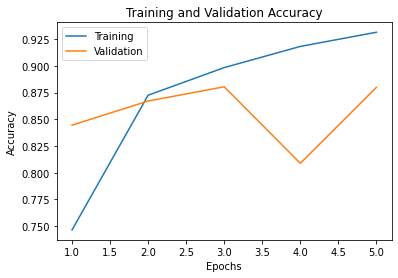


Confusion Matrix
----------------


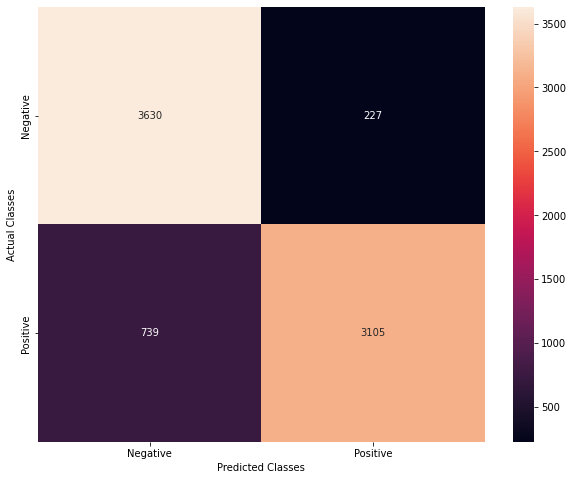


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_100_Dims_3_Layers_16_Units/assets

Word Embedding Dims: 300
GRU Layers: 3
GRU Units: 16
-----------------------
Accuracy: 0.8780677914619446
Precision: 0.9129940271377563
Recall: 0.8353278040885925
F1: 0.8724358206978717
Total Time (s): 77.05502343177795

Model Accuracy Trend
--------------------


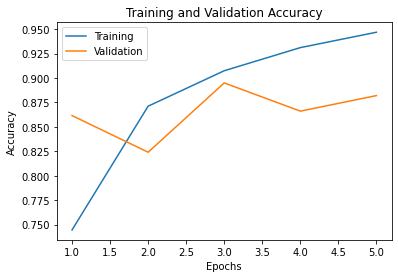


Confusion Matrix
----------------


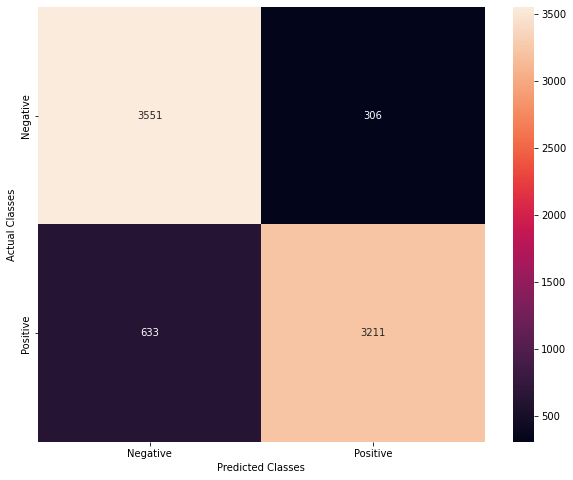


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_300_Dims_3_Layers_16_Units/assets

Word Embedding Dims: 500
GRU Layers: 3
GRU Units: 16
-----------------------
Accuracy: 0.8752110004425049
Precision: 0.9261010885238647
Recall: 0.815036416053772
F1: 0.8670264239435677
Total Time (s): 101.57864499092102

Model Accuracy Trend
--------------------


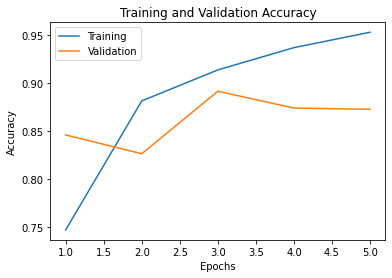


Confusion Matrix
----------------


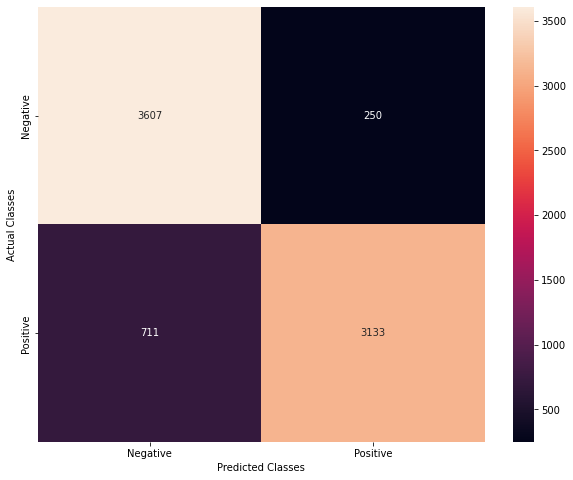


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_500_Dims_3_Layers_16_Units/assets

Word Embedding Dims: 100
GRU Layers: 3
GRU Units: 16
Bidirectional Layer(s)
-----------------------
Accuracy: 0.831320583820343
Precision: 0.9517216682434082
Recall: 0.697450578212738
F1: 0.8049842328359939
Total Time (s): 89.719313621521

Model Accuracy Trend
--------------------


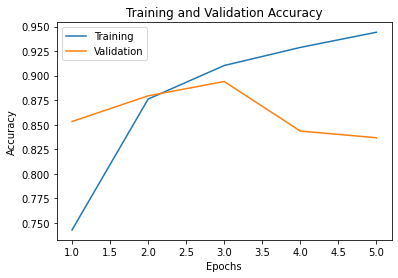


Confusion Matrix
----------------


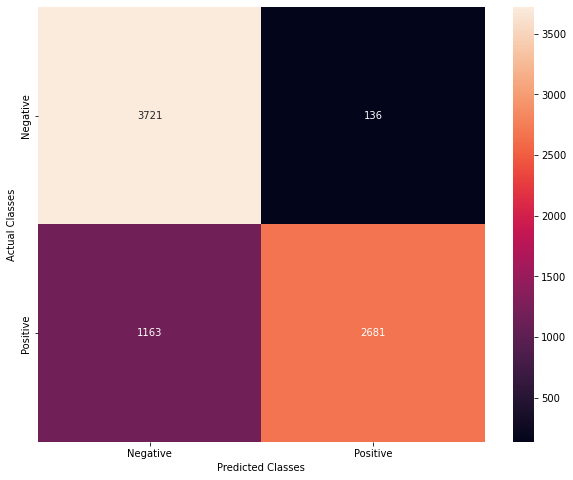


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_100_Dims_3_Bidirectional_16_Units/assets

Word Embedding Dims: 300
GRU Layers: 3
GRU Units: 16
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8532658219337463
Precision: 0.9275362491607666
Recall: 0.7658689022064209
F1: 0.8389854823907821
Total Time (s): 113.60050773620605

Model Accuracy Trend
--------------------


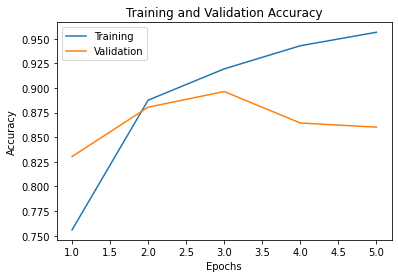


Confusion Matrix
----------------


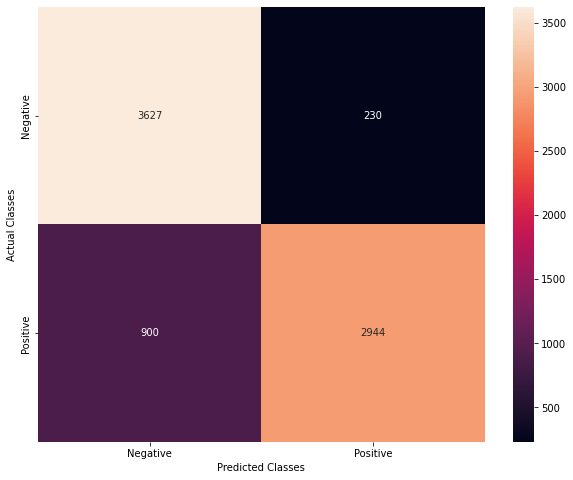


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_300_Dims_3_Bidirectional_16_Units/assets

Word Embedding Dims: 500
GRU Layers: 3
GRU Units: 16
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8492403626441956
Precision: 0.9314892292022705
Recall: 0.7533819079399109
F1: 0.8330217275989379
Total Time (s): 142.31774473190308

Model Accuracy Trend
--------------------


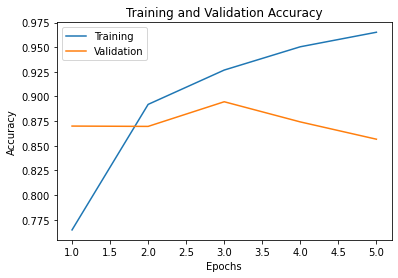


Confusion Matrix
----------------


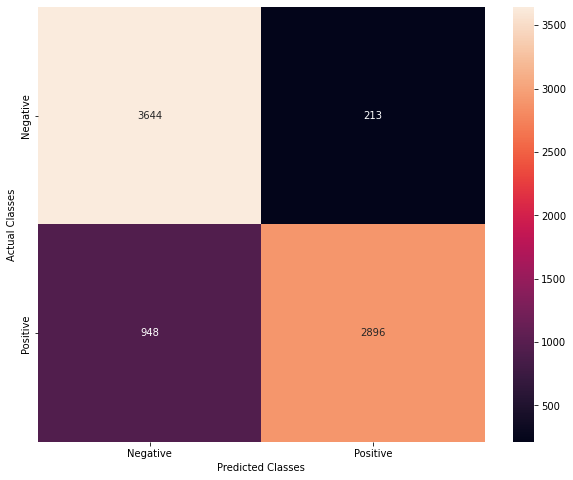


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_500_Dims_3_Bidirectional_16_Units/assets

Word Embedding Dims: 100
GRU Layers: 1
GRU Units: 32
-----------------------
Accuracy: 0.8192442655563354
Precision: 0.9633408784866333
Recall: 0.6631113290786743
F1: 0.7855161649604623
Total Time (s): 27.535988569259644

Model Accuracy Trend
--------------------


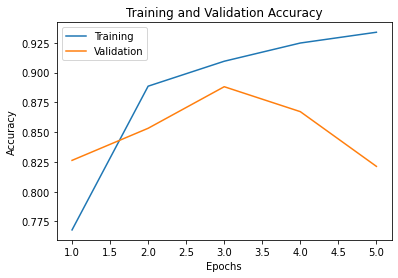


Confusion Matrix
----------------


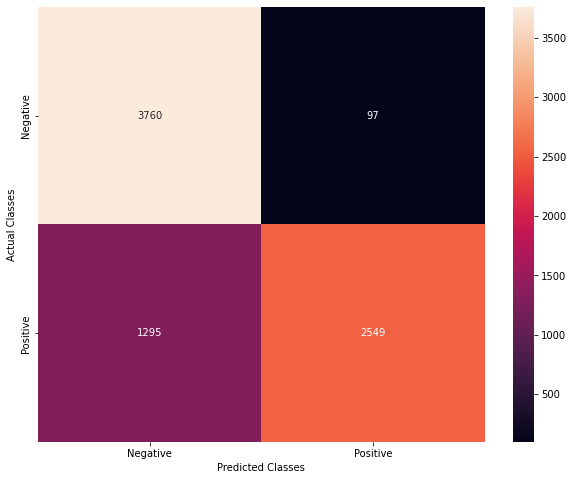


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_100_Dims_1_Layers_32_Units/assets

Word Embedding Dims: 300
GRU Layers: 1
GRU Units: 32
-----------------------
Accuracy: 0.8539150953292847
Precision: 0.9412528276443481
Recall: 0.7544224858283997
F1: 0.8375451271625437
Total Time (s): 53.17592239379883

Model Accuracy Trend
--------------------


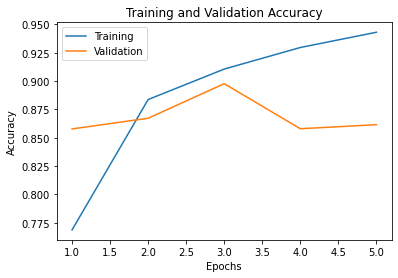


Confusion Matrix
----------------


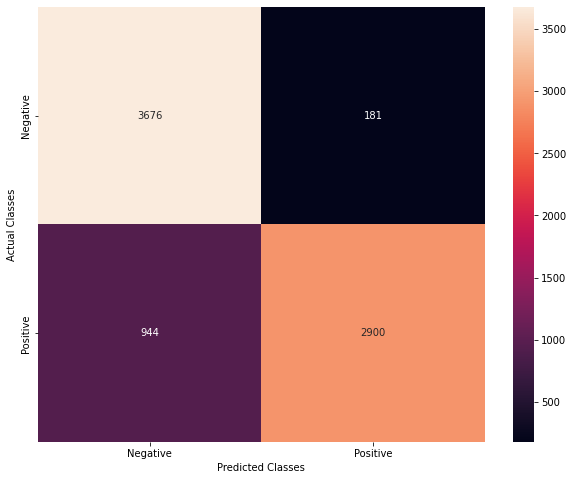


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_300_Dims_1_Layers_32_Units/assets

Word Embedding Dims: 500
GRU Layers: 1
GRU Units: 32
-----------------------
Accuracy: 0.8641734719276428
Precision: 0.9344720244407654
Recall: 0.7827783823013306
F1: 0.8519252599687394
Total Time (s): 79.33494138717651

Model Accuracy Trend
--------------------


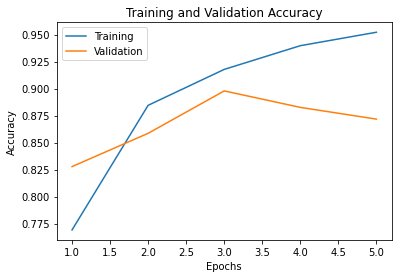


Confusion Matrix
----------------


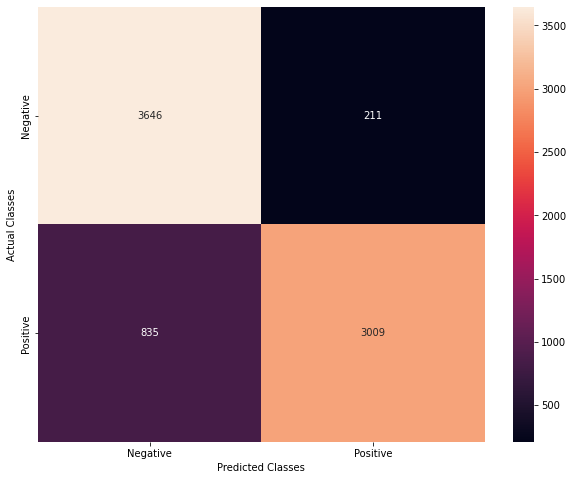


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_500_Dims_1_Layers_32_Units/assets

Word Embedding Dims: 100
GRU Layers: 1
GRU Units: 32
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8037917017936707
Precision: 0.9671605825424194
Recall: 0.628251850605011
F1: 0.7617095281322105
Total Time (s): 40.653908252716064

Model Accuracy Trend
--------------------


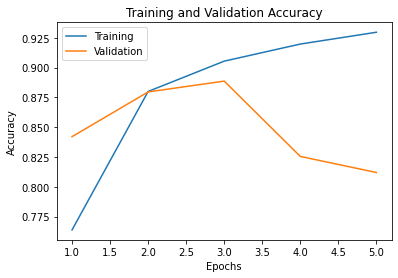


Confusion Matrix
----------------


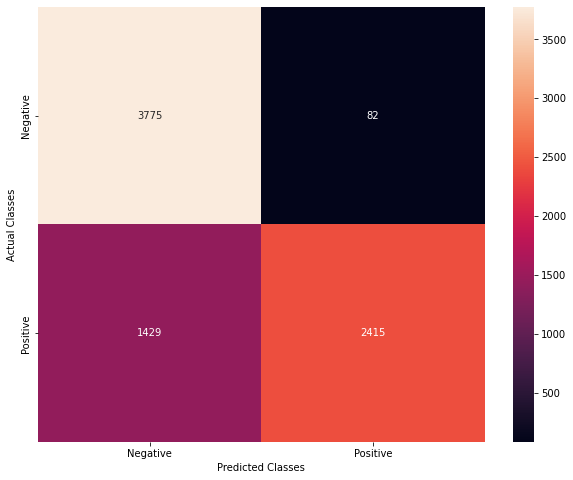


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_100_Dims_1_Bidirectional_32_Units/assets

Word Embedding Dims: 300
GRU Layers: 1
GRU Units: 32
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8579405546188354
Precision: 0.9356780648231506
Recall: 0.7682101726531982
F1: 0.843714267069797
Total Time (s): 67.39343976974487

Model Accuracy Trend
--------------------


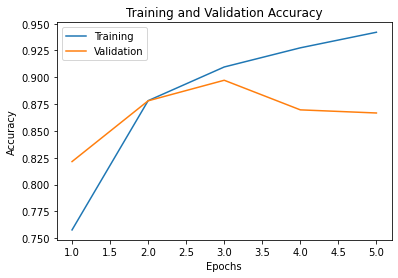


Confusion Matrix
----------------


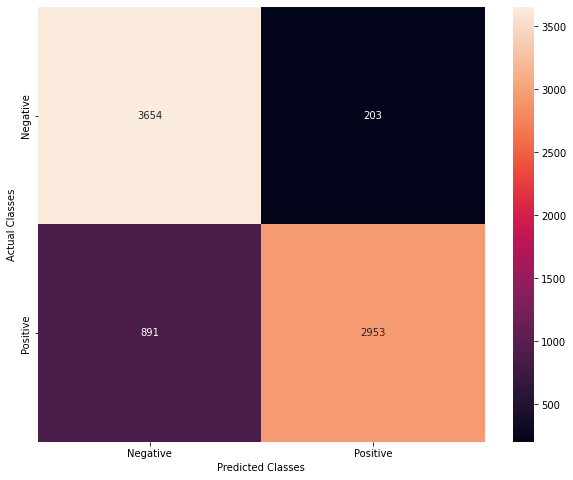


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_300_Dims_1_Bidirectional_32_Units/assets

Word Embedding Dims: 500
GRU Layers: 1
GRU Units: 32
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8732632398605347
Precision: 0.9185639023780823
Recall: 0.8186784386634827
F1: 0.8657496350919663
Total Time (s): 93.99907398223877

Model Accuracy Trend
--------------------


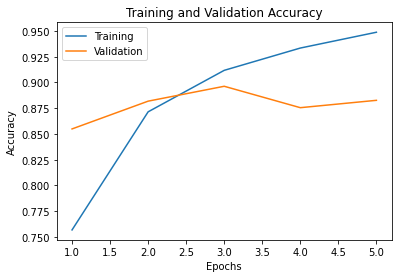


Confusion Matrix
----------------


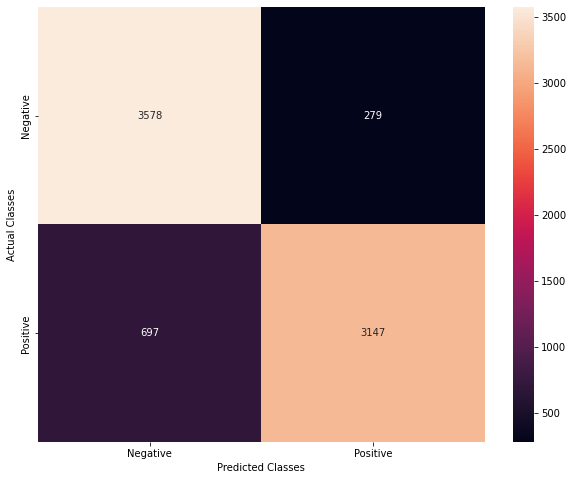


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_500_Dims_1_Bidirectional_32_Units/assets

Word Embedding Dims: 100
GRU Layers: 2
GRU Units: 32
-----------------------
Accuracy: 0.7997662425041199
Precision: 0.9682669043540955
Recall: 0.6191467046737671
F1: 0.755315766056262
Total Time (s): 39.12142324447632

Model Accuracy Trend
--------------------


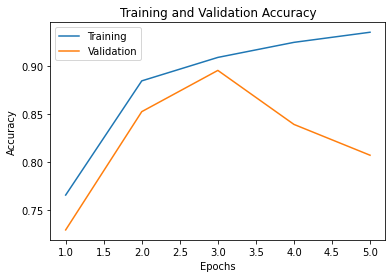


Confusion Matrix
----------------


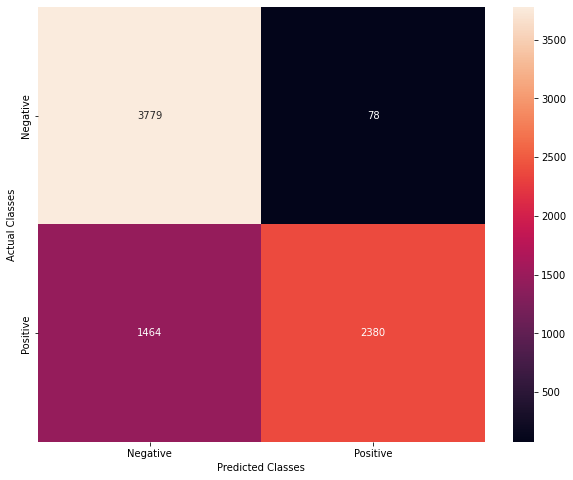


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_100_Dims_2_Layers_32_Units/assets

Word Embedding Dims: 300
GRU Layers: 2
GRU Units: 32
-----------------------
Accuracy: 0.8733930587768555
Precision: 0.9273160696029663
Recall: 0.8098335266113281
F1: 0.8646021558148943
Total Time (s): 64.25344276428223

Model Accuracy Trend
--------------------


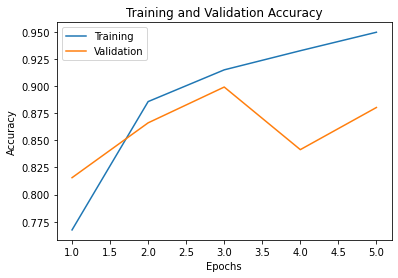


Confusion Matrix
----------------


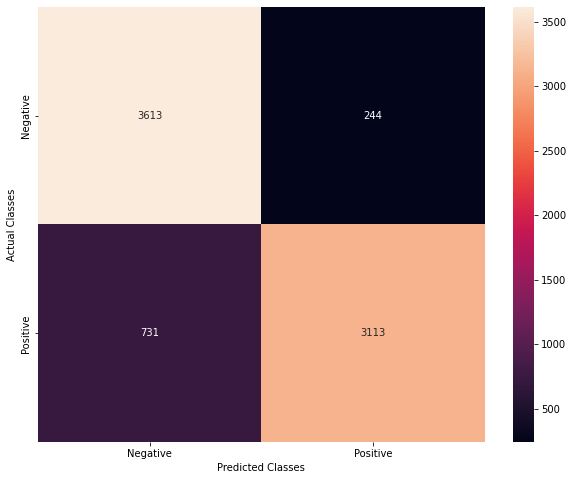


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_300_Dims_2_Layers_32_Units/assets

Word Embedding Dims: 500
GRU Layers: 2
GRU Units: 32
-----------------------
Accuracy: 0.8649526238441467
Precision: 0.9359452724456787
Recall: 0.7830384969711304
F1: 0.8526912149167531
Total Time (s): 88.6242778301239

Model Accuracy Trend
--------------------


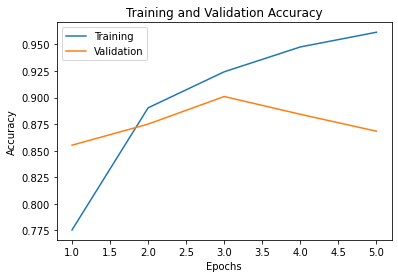


Confusion Matrix
----------------


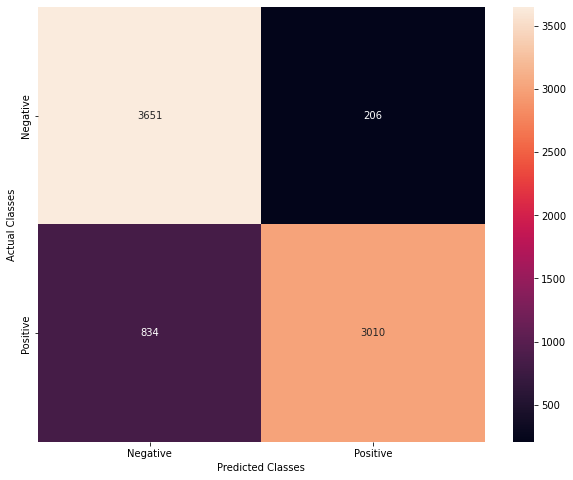


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_500_Dims_2_Layers_32_Units/assets

Word Embedding Dims: 100
GRU Layers: 2
GRU Units: 32
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8509284257888794
Precision: 0.9442979693412781
Recall: 0.7453173995018005
F1: 0.8330910334299134
Total Time (s): 62.725127935409546

Model Accuracy Trend
--------------------


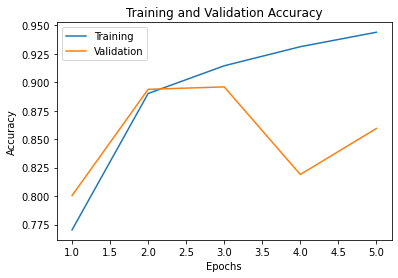


Confusion Matrix
----------------


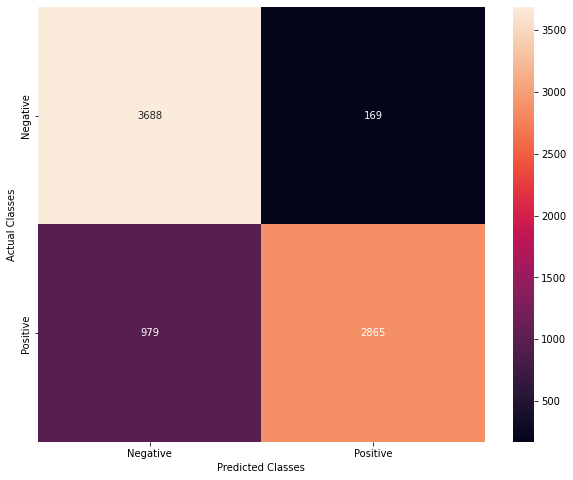


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_100_Dims_2_Bidirectional_32_Units/assets

Word Embedding Dims: 300
GRU Layers: 2
GRU Units: 32
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8263862133026123
Precision: 0.948479413986206
Recall: 0.6896461844444275
F1: 0.7986142326404432
Total Time (s): 90.24114537239075

Model Accuracy Trend
--------------------


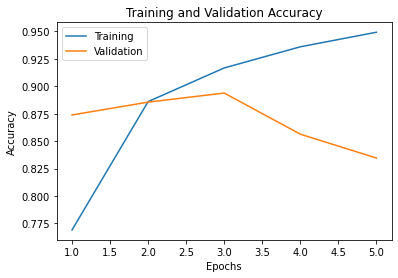


Confusion Matrix
----------------


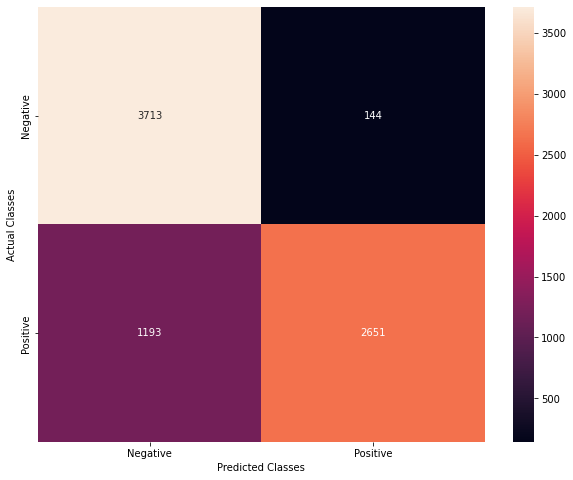


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_300_Dims_2_Bidirectional_32_Units/assets

Word Embedding Dims: 500
GRU Layers: 2
GRU Units: 32
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8787170648574829
Precision: 0.9119479060173035
Recall: 0.8379292488098145
F1: 0.873373107060487
Total Time (s): 117.36036443710327

Model Accuracy Trend
--------------------


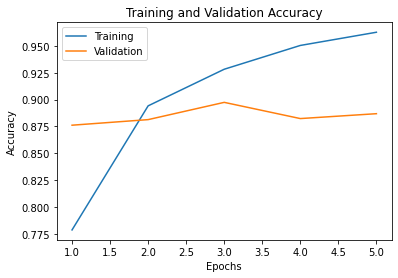


Confusion Matrix
----------------


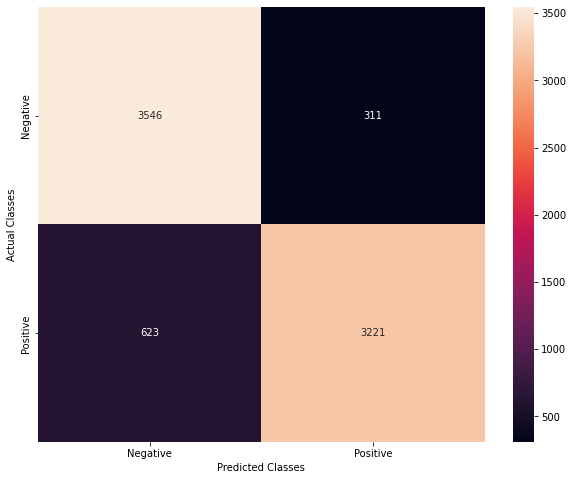


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_500_Dims_2_Bidirectional_32_Units/assets

Word Embedding Dims: 100
GRU Layers: 3
GRU Units: 32
-----------------------
Accuracy: 0.8015841841697693
Precision: 0.9669354557991028
Recall: 0.6238293647766113
F1: 0.7583807780622558
Total Time (s): 51.04636549949646

Model Accuracy Trend
--------------------


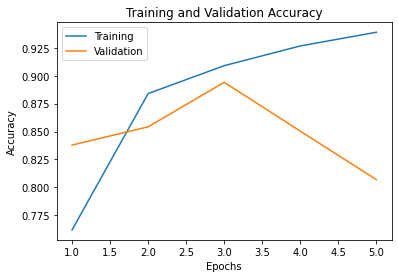


Confusion Matrix
----------------


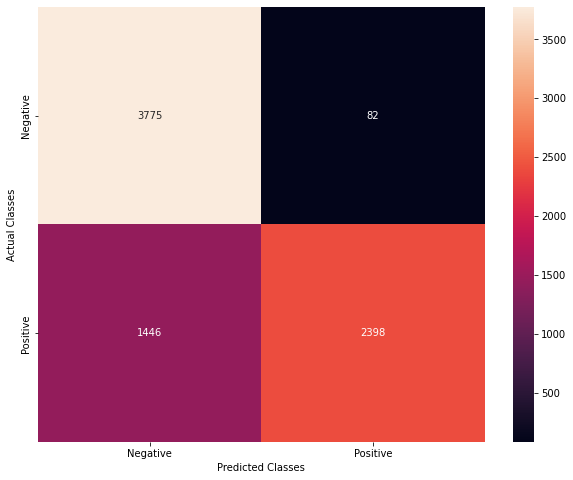


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_100_Dims_3_Layers_32_Units/assets

Word Embedding Dims: 300
GRU Layers: 3
GRU Units: 32
-----------------------
Accuracy: 0.8418387174606323
Precision: 0.9339061379432678
Recall: 0.7351716756820679
F1: 0.8227074073559523
Total Time (s): 76.01145195960999

Model Accuracy Trend
--------------------


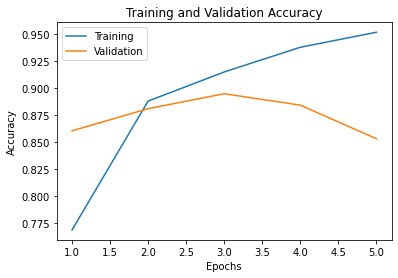


Confusion Matrix
----------------


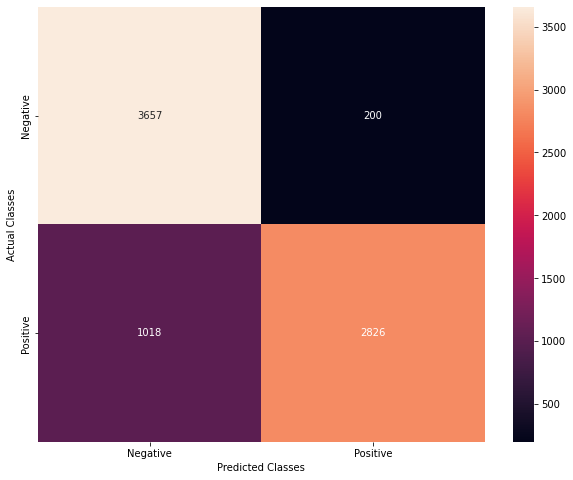


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_300_Dims_3_Layers_32_Units/assets

Word Embedding Dims: 500
GRU Layers: 3
GRU Units: 32
-----------------------
Accuracy: 0.8598883152008057
Precision: 0.9324366450309753
Recall: 0.7754942774772644
F1: 0.8467547168356069
Total Time (s): 100.6251289844513

Model Accuracy Trend
--------------------


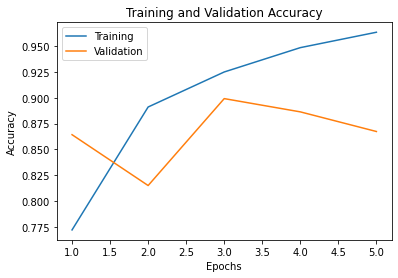


Confusion Matrix
----------------


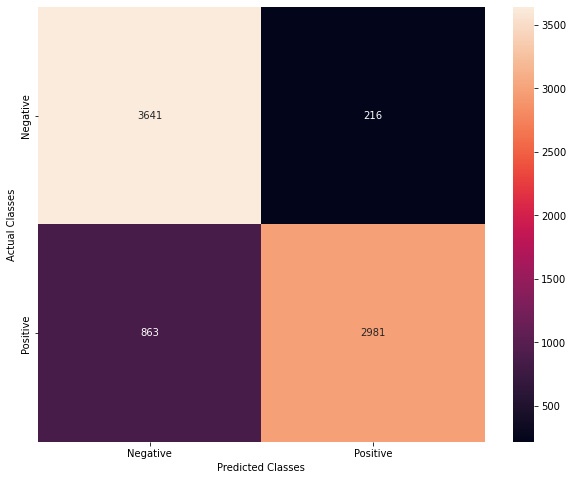


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_500_Dims_3_Layers_32_Units/assets

Word Embedding Dims: 100
GRU Layers: 3
GRU Units: 32
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8293728232383728
Precision: 0.9550359845161438
Recall: 0.6906867623329163
F1: 0.8016304244683123
Total Time (s): 86.49426317214966

Model Accuracy Trend
--------------------


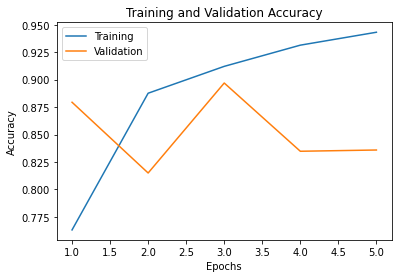


Confusion Matrix
----------------


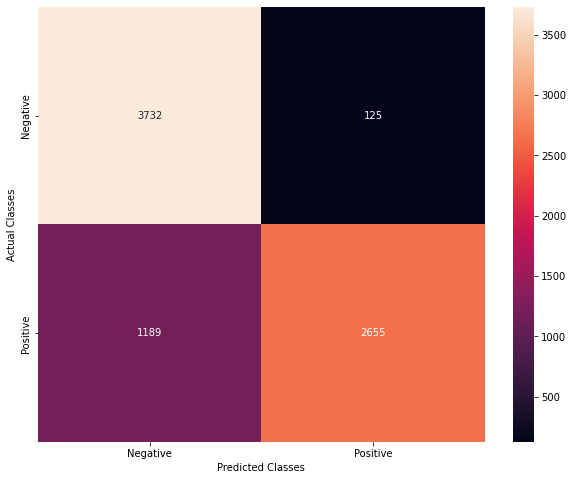


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_100_Dims_3_Bidirectional_32_Units/assets

Word Embedding Dims: 300
GRU Layers: 3
GRU Units: 32
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8383327126502991
Precision: 0.9461036920547485
Recall: 0.7169615030288696
F1: 0.8157466431045474
Total Time (s): 116.31336569786072

Model Accuracy Trend
--------------------


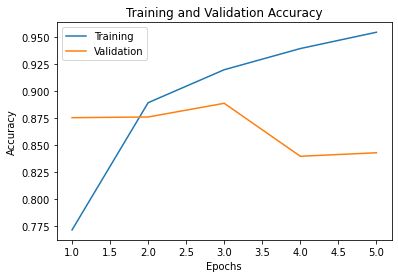


Confusion Matrix
----------------


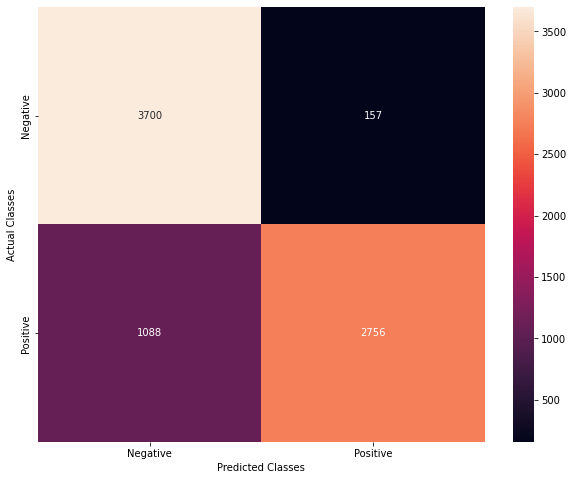


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_300_Dims_3_Bidirectional_32_Units/assets

Word Embedding Dims: 500
GRU Layers: 3
GRU Units: 32
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8724840879440308
Precision: 0.9179322719573975
Recall: 0.8176378607749939
F1: 0.8648871803272752
Total Time (s): 142.28224921226501

Model Accuracy Trend
--------------------


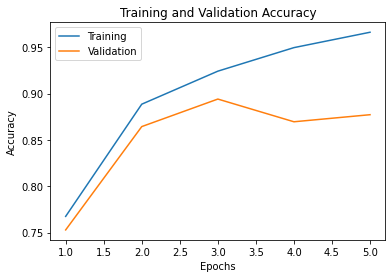


Confusion Matrix
----------------


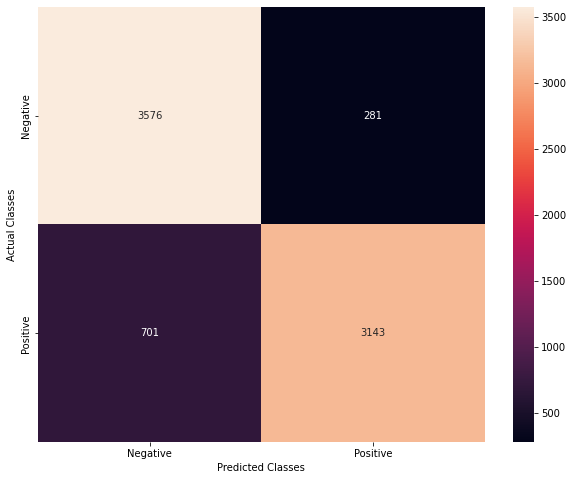


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_500_Dims_3_Bidirectional_32_Units/assets

Word Embedding Dims: 100
GRU Layers: 1
GRU Units: 64
-----------------------
Accuracy: 0.8161277770996094
Precision: 0.9654908180236816
Recall: 0.655046820640564
F1: 0.7805331707387806
Total Time (s): 27.028448343276978

Model Accuracy Trend
--------------------


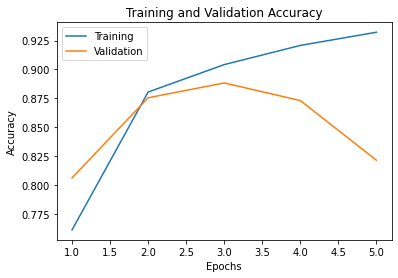


Confusion Matrix
----------------


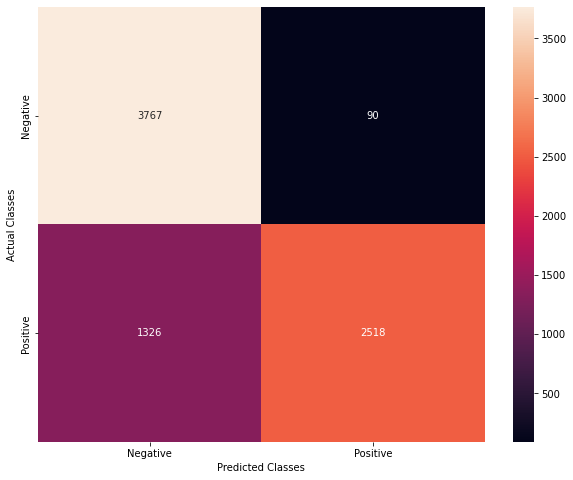


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_100_Dims_1_Layers_64_Units/assets

Word Embedding Dims: 300
GRU Layers: 1
GRU Units: 64
-----------------------
Accuracy: 0.8844305872917175
Precision: 0.9066630005836487
Recall: 0.8566597104072571
F1: 0.8809523732391479
Total Time (s): 52.64648103713989

Model Accuracy Trend
--------------------


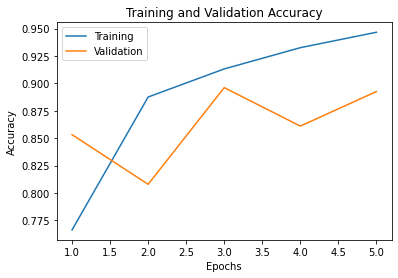


Confusion Matrix
----------------


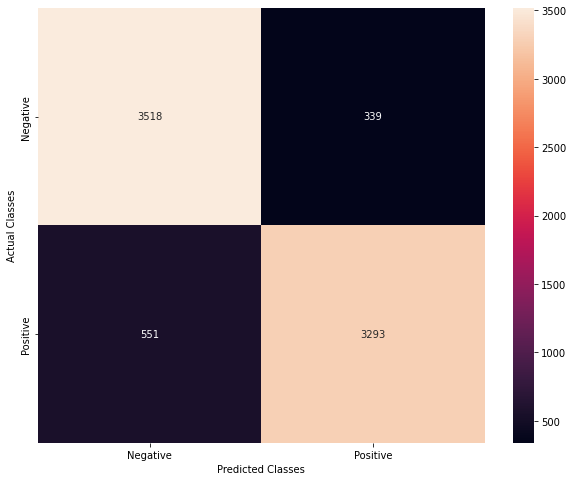


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_300_Dims_1_Layers_64_Units/assets

Word Embedding Dims: 500
GRU Layers: 1
GRU Units: 64
-----------------------
Accuracy: 0.8832619190216064
Precision: 0.9153737425804138
Recall: 0.8441727161407471
F1: 0.8783326347855026
Total Time (s): 79.27996158599854

Model Accuracy Trend
--------------------


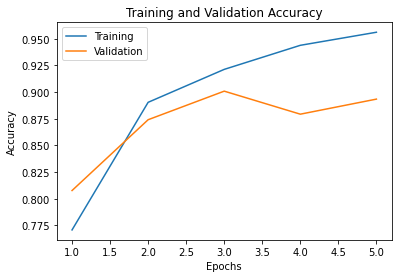


Confusion Matrix
----------------


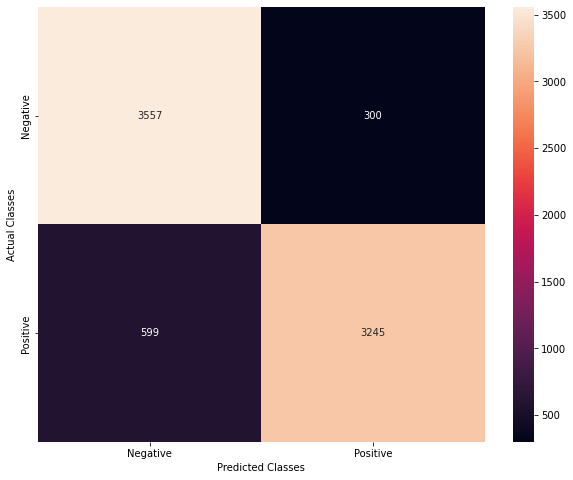


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_500_Dims_1_Layers_64_Units/assets

Word Embedding Dims: 100
GRU Layers: 1
GRU Units: 64
Bidirectional Layer(s)
-----------------------
Accuracy: 0.7823659181594849
Precision: 0.9746059775352478
Recall: 0.5790842771530151
F1: 0.726501303985131
Total Time (s): 41.08243703842163

Model Accuracy Trend
--------------------


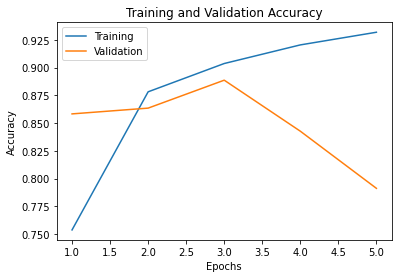


Confusion Matrix
----------------


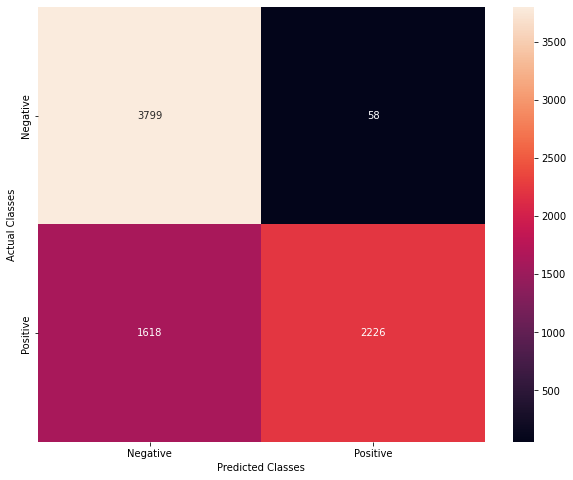


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_100_Dims_1_Bidirectional_64_Units/assets

Word Embedding Dims: 300
GRU Layers: 1
GRU Units: 64
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8472925424575806
Precision: 0.949158251285553
Recall: 0.7333506941795349
F1: 0.8274141594820271
Total Time (s): 70.95168900489807

Model Accuracy Trend
--------------------


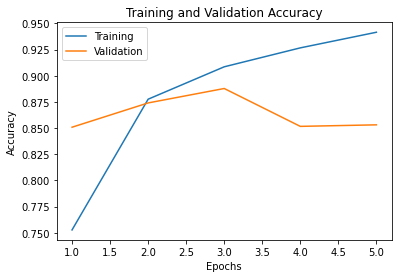


Confusion Matrix
----------------


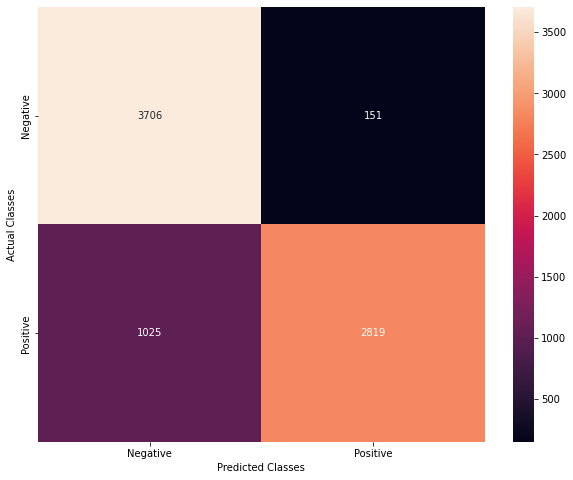


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_300_Dims_1_Bidirectional_64_Units/assets

Word Embedding Dims: 500
GRU Layers: 1
GRU Units: 64
Bidirectional Layer(s)
-----------------------
Accuracy: 0.880275309085846
Precision: 0.9038142561912537
Recall: 0.8506763577461243
F1: 0.8764406186367212
Total Time (s): 100.98516845703125

Model Accuracy Trend
--------------------


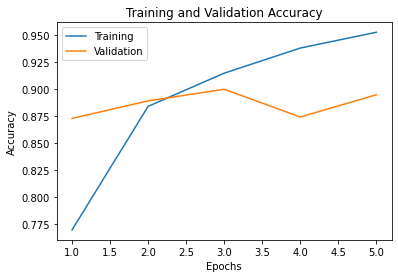


Confusion Matrix
----------------


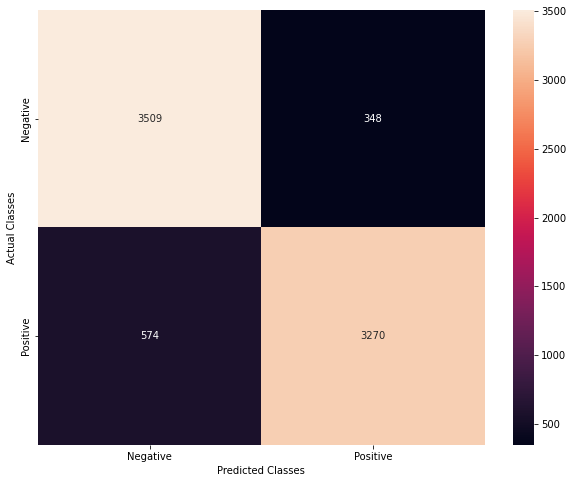


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_500_Dims_1_Bidirectional_64_Units/assets

Word Embedding Dims: 100
GRU Layers: 2
GRU Units: 64
-----------------------
Accuracy: 0.7902869582176208
Precision: 0.9720457196235657
Recall: 0.5970343351364136
F1: 0.7397260173910336
Total Time (s): 40.26173949241638

Model Accuracy Trend
--------------------


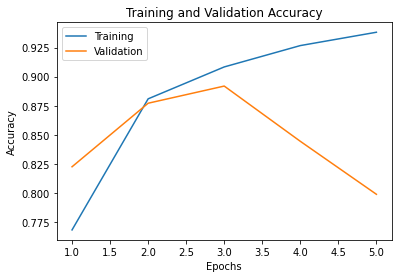


Confusion Matrix
----------------


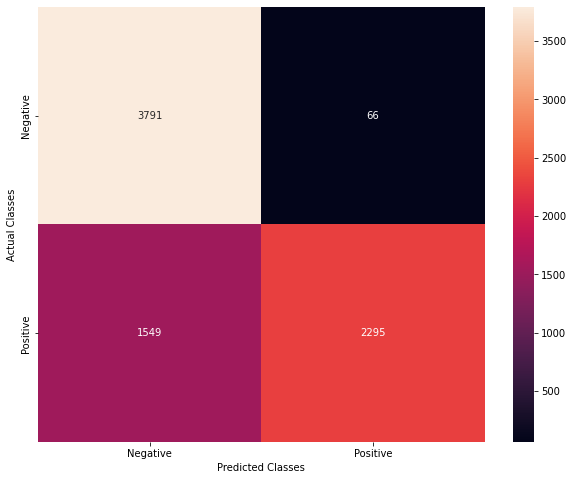


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_100_Dims_2_Layers_64_Units/assets

Word Embedding Dims: 300
GRU Layers: 2
GRU Units: 64
-----------------------
Accuracy: 0.873522937297821
Precision: 0.9230542182922363
Recall: 0.8145161271095276
F1: 0.8653952330449821
Total Time (s): 64.72174096107483

Model Accuracy Trend
--------------------


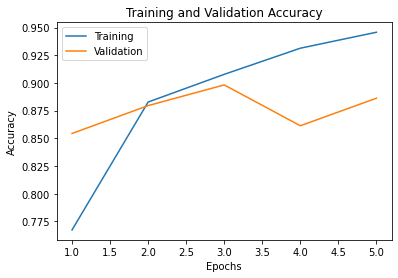


Confusion Matrix
----------------


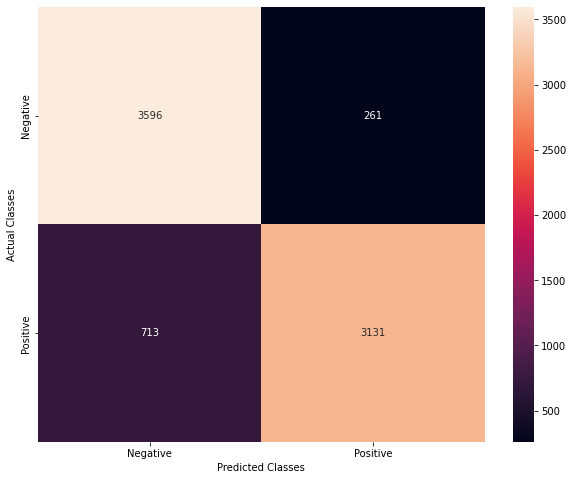


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_300_Dims_2_Layers_64_Units/assets

Word Embedding Dims: 500
GRU Layers: 2
GRU Units: 64
-----------------------
Accuracy: 0.8784573674201965
Precision: 0.9161419868469238
Recall: 0.8327262997627258
F1: 0.872444806284706
Total Time (s): 93.18348526954651

Model Accuracy Trend
--------------------


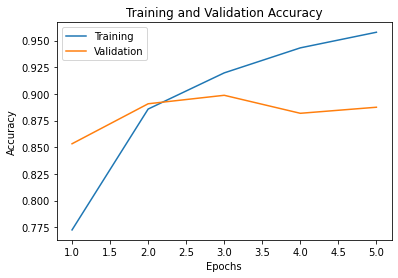


Confusion Matrix
----------------


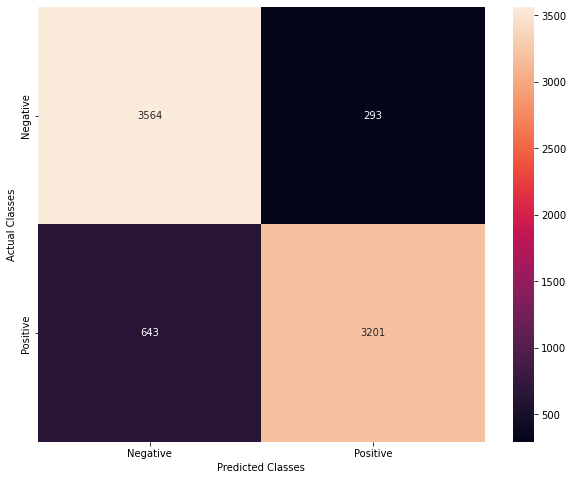


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_500_Dims_2_Layers_64_Units/assets

Word Embedding Dims: 100
GRU Layers: 2
GRU Units: 64
Bidirectional Layer(s)
-----------------------
Accuracy: 0.823789119720459
Precision: 0.9624395966529846
Recall: 0.673257052898407
F1: 0.7922853502365893
Total Time (s): 74.26173305511475

Model Accuracy Trend
--------------------


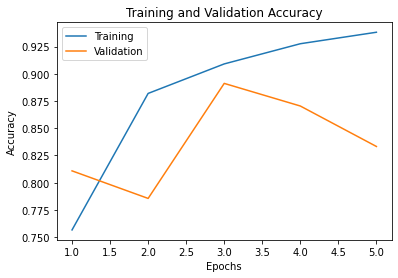


Confusion Matrix
----------------


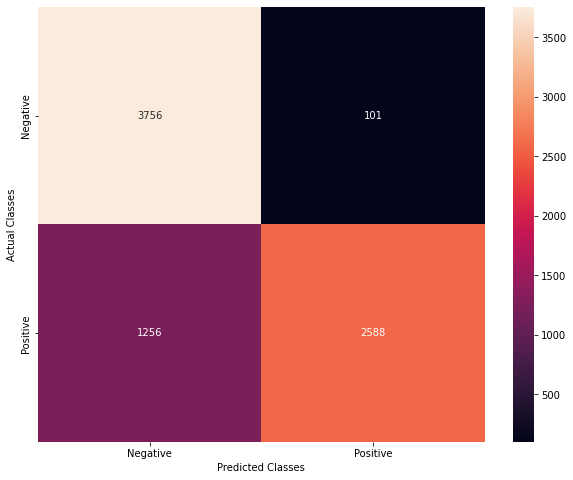


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_100_Dims_2_Bidirectional_64_Units/assets

Word Embedding Dims: 300
GRU Layers: 2
GRU Units: 64
Bidirectional Layer(s)
-----------------------
Accuracy: 0.870406448841095
Precision: 0.9325227737426758
Recall: 0.7981269359588623
F1: 0.8601065136947392
Total Time (s): 102.58779287338257

Model Accuracy Trend
--------------------


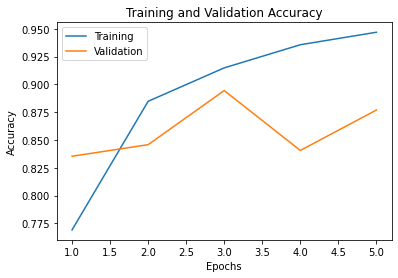


Confusion Matrix
----------------


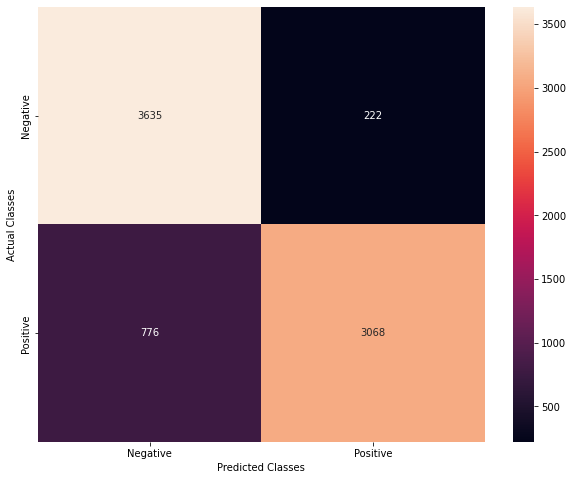


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_300_Dims_2_Bidirectional_64_Units/assets

Word Embedding Dims: 500
GRU Layers: 2
GRU Units: 64
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8767692446708679
Precision: 0.9243623614311218
Recall: 0.8202393054962158
F1: 0.8691936454497086
Total Time (s): 134.6935727596283

Model Accuracy Trend
--------------------


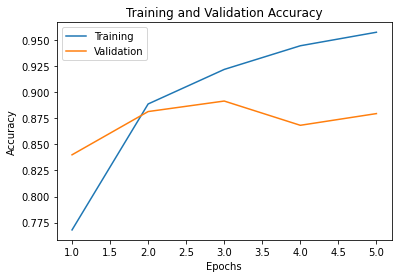


Confusion Matrix
----------------


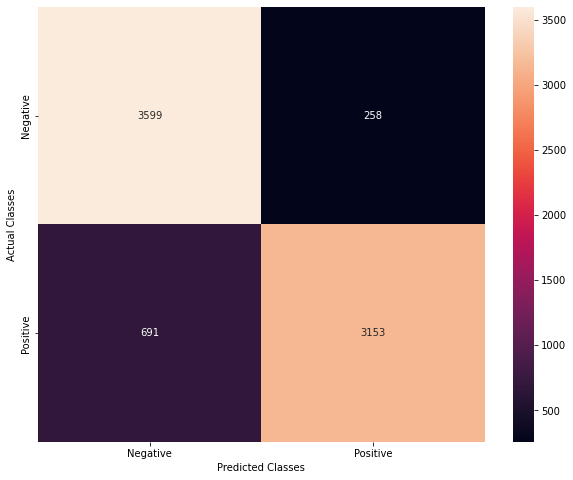


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_500_Dims_2_Bidirectional_64_Units/assets

Word Embedding Dims: 100
GRU Layers: 3
GRU Units: 64
-----------------------
Accuracy: 0.8643033504486084
Precision: 0.9421800971031189
Recall: 0.775754451751709
F1: 0.8509059965838848
Total Time (s): 53.06428074836731

Model Accuracy Trend
--------------------


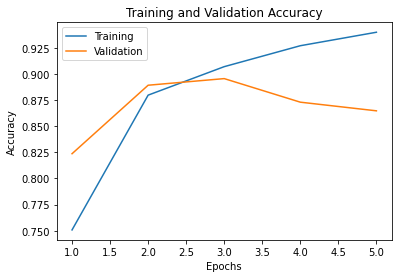


Confusion Matrix
----------------


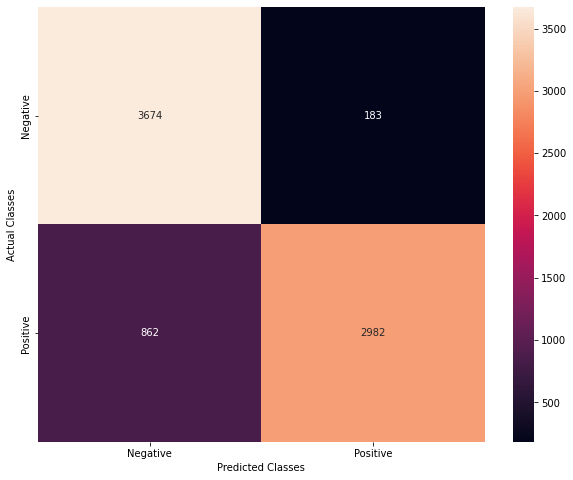


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_100_Dims_3_Layers_64_Units/assets

Word Embedding Dims: 300
GRU Layers: 3
GRU Units: 64
-----------------------
Accuracy: 0.8832619190216064
Precision: 0.9144384860992432
Recall: 0.8452132940292358
F1: 0.8784642208774021
Total Time (s): 78.03932547569275

Model Accuracy Trend
--------------------


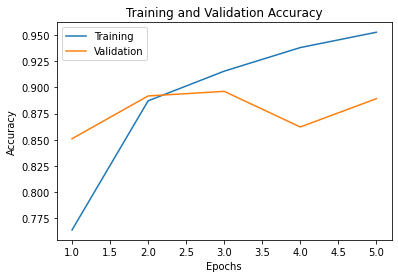


Confusion Matrix
----------------


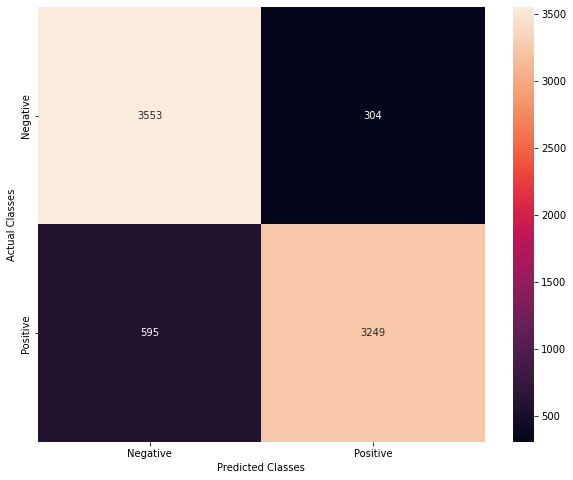


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_300_Dims_3_Layers_64_Units/assets

Word Embedding Dims: 500
GRU Layers: 3
GRU Units: 64
-----------------------
Accuracy: 0.8692377805709839
Precision: 0.9279034733772278
Recall: 0.8002080917358398
F1: 0.8593378838913881
Total Time (s): 104.31439471244812

Model Accuracy Trend
--------------------


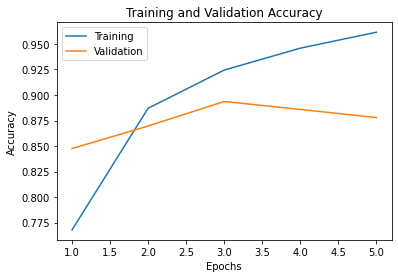


Confusion Matrix
----------------


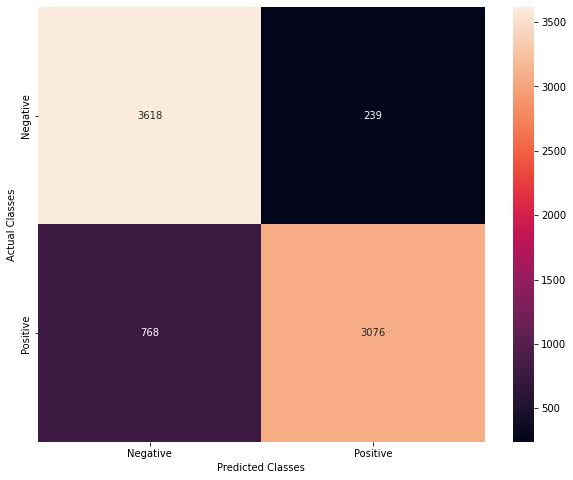


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_500_Dims_3_Layers_64_Units/assets

Word Embedding Dims: 100
GRU Layers: 3
GRU Units: 64
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8366445899009705
Precision: 0.9533660411834717
Recall: 0.7073361277580261
F1: 0.8121266492191488
Total Time (s): 108.03660845756531

Model Accuracy Trend
--------------------


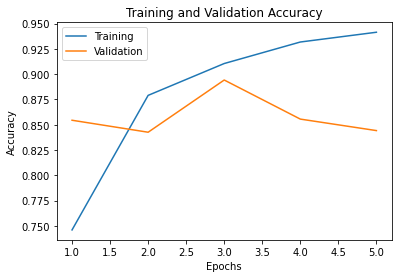


Confusion Matrix
----------------


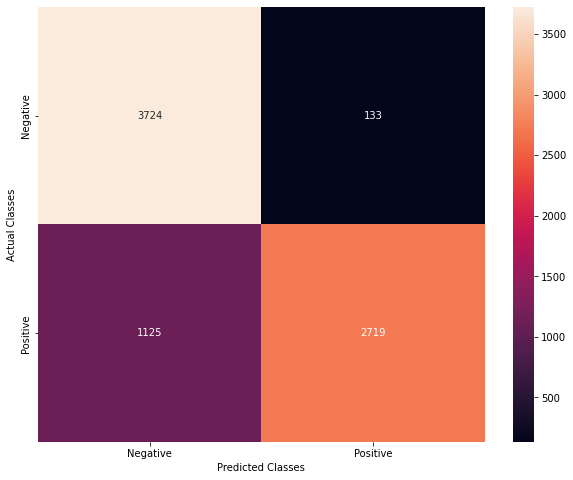


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_100_Dims_3_Bidirectional_64_Units/assets

Word Embedding Dims: 300
GRU Layers: 3
GRU Units: 64
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8840410113334656
Precision: 0.9243600964546204
Recall: 0.8361082077026367
F1: 0.8780221281955798
Total Time (s): 137.68655371665955

Model Accuracy Trend
--------------------


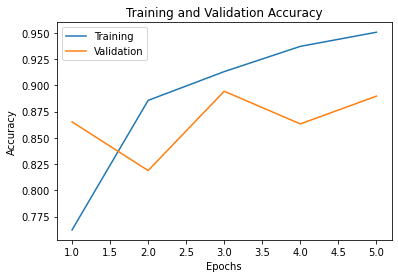


Confusion Matrix
----------------


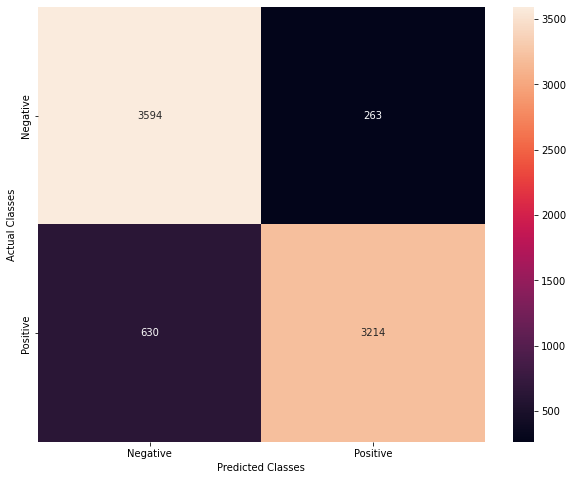


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_300_Dims_3_Bidirectional_64_Units/assets

Word Embedding Dims: 500
GRU Layers: 3
GRU Units: 64
Bidirectional Layer(s)
-----------------------
Accuracy: 0.8831320405006409
Precision: 0.9158192276954651
Recall: 0.8433923125267029
F1: 0.878114858438176
Total Time (s): 167.87535333633423

Model Accuracy Trend
--------------------


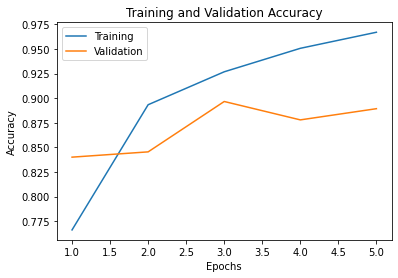


Confusion Matrix
----------------


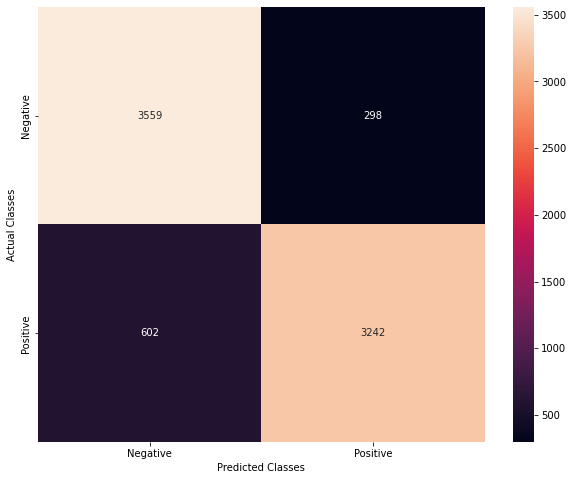


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_500_Dims_3_Bidirectional_64_Units/assets



In [ ]:
gru_results = pd.DataFrame(columns=['Model','Embed_Dims','GRU Layers','GRU Units','Bidirectional','Epochs','Time','Test Accuracy','Test Precision','Test Recall','Test F1'])

for GRU_units in [8,16,32,64]:
    
    for GRU_layers in [1,2,3]:

        for bidirectional in [0,1]:
    
            for embed_dims in [100,300,500]:

                dims = embed_dims

                num_epochs = 5

                start_time = time.time()

                print('Word Embedding Dims:',dims)
                print('GRU Layers:',GRU_layers)
                print('GRU Units:',GRU_units)
                if bidirectional == 1:
                  print('Bidirectional Layer(s)')
                print('-----------------------')

                seed(5)
                tf.random.set_seed(5)

                model = models.Sequential()
                model.add(Embedding(input_dim = voc_size, output_dim = dims, input_length = X_train_seq.shape[1]))
                
                if GRU_layers > 1:
                    
                    for layers in range(1,GRU_layers):
                        
                        if bidirectional == 1:
                          model.add(Bidirectional(GRU(units=GRU_units, return_sequences=True)))
                        else:
                          model.add(GRU(units=GRU_units, return_sequences=True))

                if bidirectional == 1:   
                    model.add(Bidirectional(GRU(units=GRU_units)))
                else:    
                    model.add(GRU(units=GRU_units))

                model.add(Dense(1, activation='sigmoid'))

                model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['Precision','Recall','accuracy'])

                history = model.fit(X_train_seq, y_train, batch_size=128, epochs=num_epochs, validation_split=0.2, verbose=False)

                total_time = time.time() - start_time

                loss, precision, recall, accuracy = model.evaluate(X_test_seq, y_test, verbose=0)

                f1_score = (2 * precision * recall) / (precision + recall)

                print('Accuracy:',accuracy)
                print('Precision:',precision)
                print('Recall:',recall)
                print('F1:',f1_score)
                print('Total Time (s):',total_time)
                print()

                acc = history.history['accuracy']
                val_acc = history.history['val_accuracy']
                loss = history.history['loss']
                val_loss = history.history['val_loss']

                print('Model Accuracy Trend')
                print('--------------------')
                plot = plt.plot(range(1, len(acc) + 1), history.history['accuracy'], label = 'Training')
                plot = plt.plot(range(1, len(val_acc) + 1), history.history['val_accuracy'], label = 'Validation')
                plot = plt.title('Training and Validation Accuracy')
                plot = plt.xlabel('Epochs')
                plot = plt.ylabel('Accuracy')
                plot = plt.legend()
                plt.show()
                print()

                print('Confusion Matrix')
                print('----------------')
                pred_test = model.predict_classes(X_test_seq)

                conf_matrix = tf.math.confusion_matrix(y_test, pred_test)

                fig, ax = plt.subplots(figsize=(10,8))
                ax = sns.heatmap(conf_matrix, annot=True, fmt='g')

                ax.set_xlabel("Predicted Classes")
                ax.set_ylabel("Actual Classes")
                ax.set_xticklabels(['Negative','Positive'])
                ax.set_yticklabels(['Negative','Positive'], va='center')
                plt.show()
                print()

                if bidirectional == 1:
                    model_name = 'GRU_{}_Dims_{}_Bidirectional_{}_Units'.format(embed_dims,GRU_layers,GRU_units)

                else:
                    model_name = 'GRU_{}_Dims_{}_Layers_{}_Units'.format(embed_dims,GRU_layers,GRU_units)

                model.save('/content/drive/MyDrive/Research Assignment 4/'+model_name)
                print()

                gru_results = gru_results.append(
                    {'Model':model_name,
                    'Embed_Dims':dims,
                    'GRU Layers':GRU_layers,
                    'GRU Units':GRU_units,
                    'Bidirectional':bidirectional,
                    'Epochs':num_epochs,
                    'Time':total_time,
                    'Test Accuracy':accuracy,
                    'Test Precision':precision,
                    'Test Recall':recall,
                    'Test F1':f1_score
                    }, ignore_index=True)
                
                gru_results.to_csv('/content/drive/MyDrive/Research Assignment 4/'+'GRU_Results.csv')

### GRU Analysis

In [ ]:
top_gru = gru_results.sort_values(by='Test F1',ascending=False).head().reset_index(drop=True).iloc[0]

#### Top Performer

Model Summary
-------------
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 299, 500)          5000000   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 16)                24480     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 5,024,497
Trainable params: 5,024,497
Non-trainable params: 0
_________________________________________________________________
Confusion Matrix
----------------


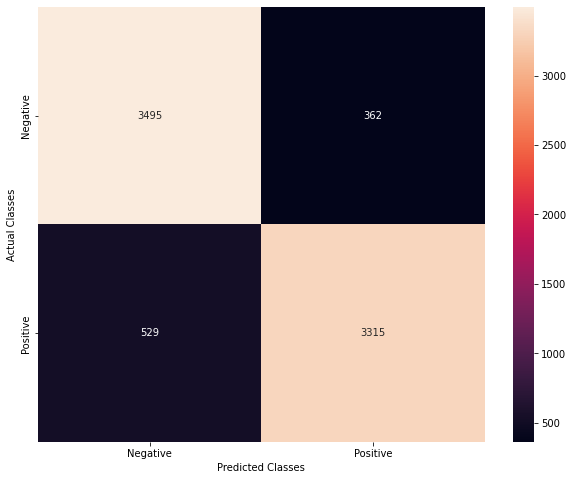

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Research Assignment 4/{}'.format(top_gru['Model']))

print('Model Summary')
print('-------------')
model.summary()

print('Confusion Matrix')
print('----------------')
pred_test = model.predict_classes(X_test_seq)

conf_matrix = tf.math.confusion_matrix(y_test, pred_test)

fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(conf_matrix, annot=True, fmt='g')

ax.set_xlabel("Predicted Classes")
ax.set_ylabel("Actual Classes")
ax.set_xticklabels(['Negative','Positive'])
ax.set_yticklabels(['Negative','Positive'], va='center')
plt.show()
print()

#### Reduce GRU Units

Word Embedding Dims: 500
GRU Layers: 1
GRU Units: 1
-----------------------
Accuracy: 0.7436696290969849
Precision: 0.7343358397483826
Recall: 0.7622268199920654
F1: 0.7480214320390539
Total Time (s): 92.85933899879456

Model Accuracy Trend
--------------------


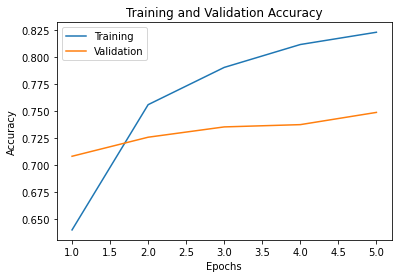


Confusion Matrix
----------------


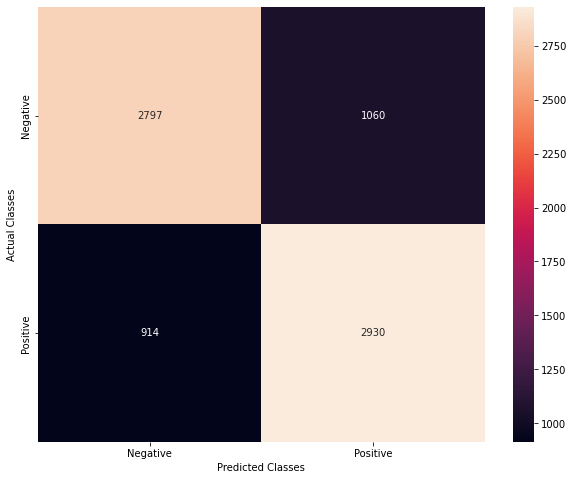


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_500_Dims_1_Bidirectional_1_Units/assets

Word Embedding Dims: 500
GRU Layers: 1
GRU Units: 2
-----------------------
Accuracy: 0.7786001563072205
Precision: 0.7932547330856323
Recall: 0.7526014447212219
F1: 0.7723935340468477
Total Time (s): 92.87485575675964

Model Accuracy Trend
--------------------


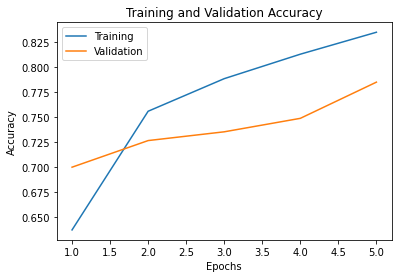


Confusion Matrix
----------------


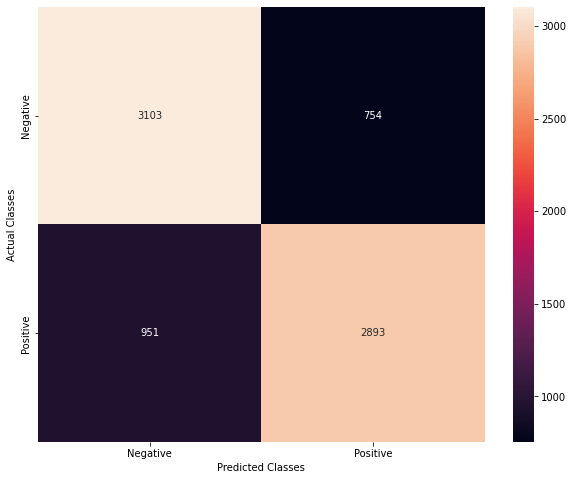


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_500_Dims_1_Bidirectional_2_Units/assets

Word Embedding Dims: 500
GRU Layers: 1
GRU Units: 3
-----------------------
Accuracy: 0.8559927344322205
Precision: 0.8665237426757812
Recall: 0.8410509824752808
F1: 0.8535973675191874
Total Time (s): 92.79370069503784

Model Accuracy Trend
--------------------


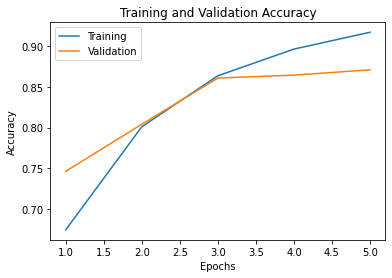


Confusion Matrix
----------------


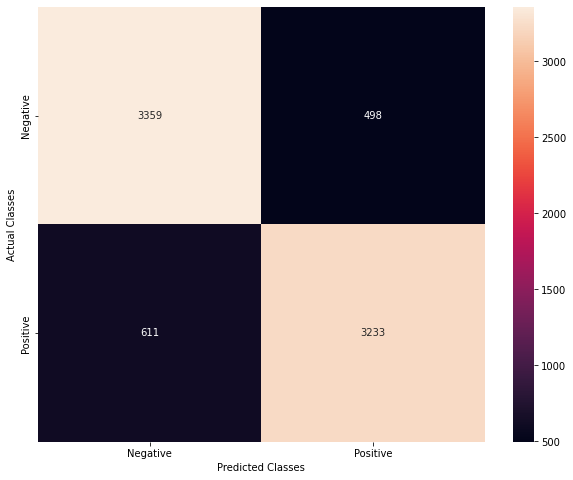


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_500_Dims_1_Bidirectional_3_Units/assets

Word Embedding Dims: 500
GRU Layers: 1
GRU Units: 4
-----------------------
Accuracy: 0.8656018972396851
Precision: 0.8928671479225159
Recall: 0.8303850293159485
F1: 0.8604933422930905
Total Time (s): 93.92228078842163

Model Accuracy Trend
--------------------


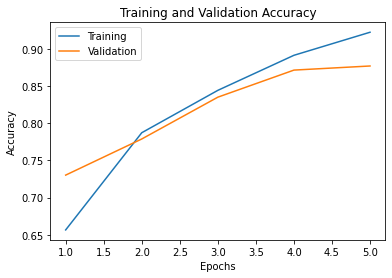


Confusion Matrix
----------------


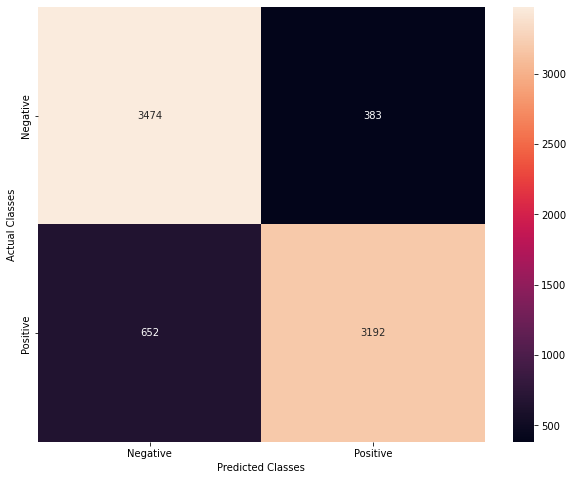


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_500_Dims_1_Bidirectional_4_Units/assets

Word Embedding Dims: 500
GRU Layers: 1
GRU Units: 5
-----------------------
Accuracy: 0.8574211001396179
Precision: 0.914553165435791
Recall: 0.7879812717437744
F1: 0.8465623374658148
Total Time (s): 91.42268514633179

Model Accuracy Trend
--------------------


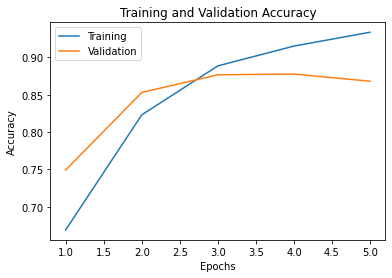


Confusion Matrix
----------------


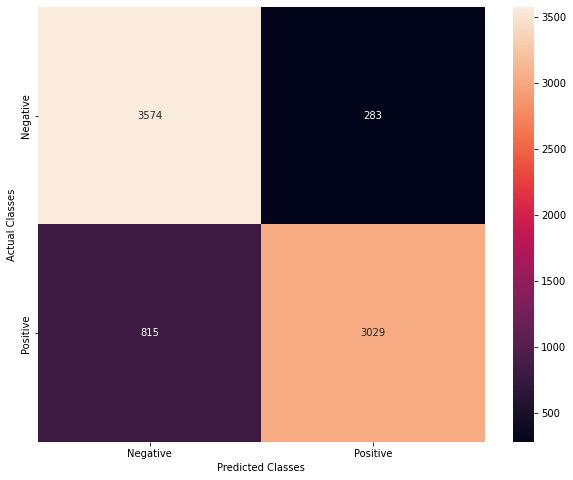


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_500_Dims_1_Bidirectional_5_Units/assets

Word Embedding Dims: 500
GRU Layers: 1
GRU Units: 6
-----------------------
Accuracy: 0.8707960247993469
Precision: 0.9106370806694031
Recall: 0.8218002319335938
F1: 0.8639409445378758
Total Time (s): 93.68654894828796

Model Accuracy Trend
--------------------


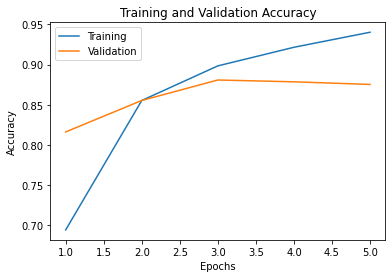


Confusion Matrix
----------------


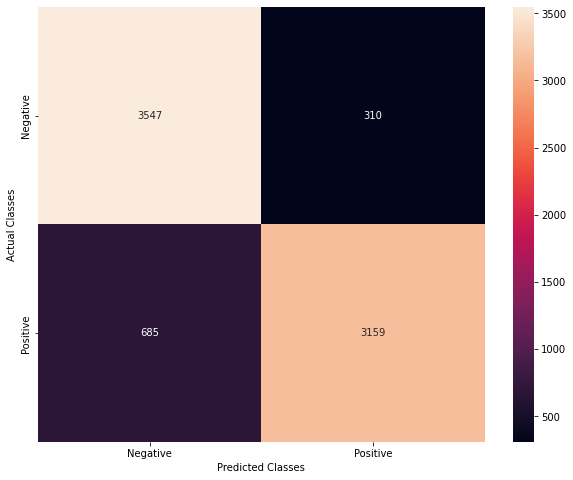


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_500_Dims_1_Bidirectional_6_Units/assets

Word Embedding Dims: 500
GRU Layers: 1
GRU Units: 7
-----------------------
Accuracy: 0.8767692446708679
Precision: 0.902642548084259
Recall: 0.8441727161407471
F1: 0.8724290737848085
Total Time (s): 91.252121925354

Model Accuracy Trend
--------------------


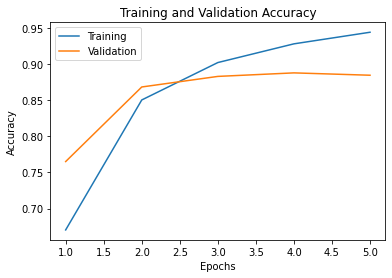


Confusion Matrix
----------------


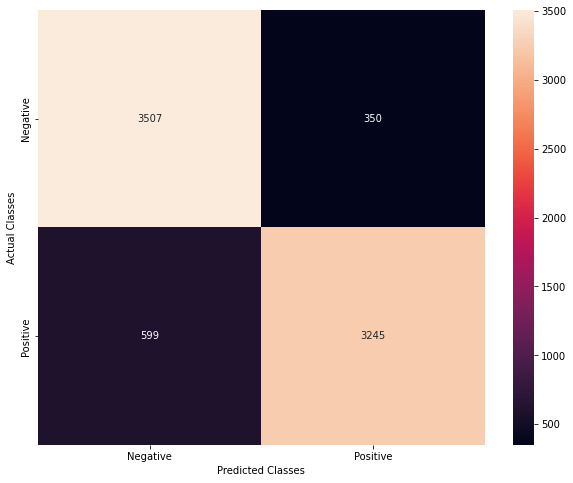


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_500_Dims_1_Bidirectional_7_Units/assets



In [ ]:
for GRU_units in range(1,top_gru['GRU Units']):

  dims = top_gru['Embed_Dims']
  GRU_layers = top_gru['GRU Layers']
  bidirectional = top_gru['Bidirectional']
  num_epochs = 5

  start_time = time.time()

  print('Word Embedding Dims:',dims)
  print('GRU Layers:',GRU_layers)
  print('GRU Units:',GRU_units)
  print('-----------------------')

  seed(5)
  tf.random.set_seed(5)

  model = models.Sequential()
  model.add(Embedding(input_dim = voc_size, output_dim = dims, input_length = X_train_seq.shape[1]))

  if GRU_layers > 1:
                    
    for layers in range(1,GRU_layers):
      
      if bidirectional == 1:
        model.add(Bidirectional(GRU(units=GRU_units, return_sequences=True)))
      else:
        model.add(GRU(units=GRU_units, return_sequences=True))

  if bidirectional == 1:   
      model.add(Bidirectional(GRU(units=GRU_units)))
  else:    
      model.add(GRU(units=GRU_units))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['Precision','Recall','accuracy'])

  history = model.fit(X_train_seq, y_train, batch_size=128, epochs=num_epochs, validation_split=0.2, verbose=False)

  total_time = time.time() - start_time

  loss, precision, recall, accuracy = model.evaluate(X_test_seq, y_test, verbose=0)

  f1_score = (2 * precision * recall) / (precision + recall)

  print('Accuracy:',accuracy)
  print('Precision:',precision)
  print('Recall:',recall)
  print('F1:',f1_score)
  print('Total Time (s):',total_time)
  print()

  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  print('Model Accuracy Trend')
  print('--------------------')
  plot = plt.plot(range(1, len(acc) + 1), history.history['accuracy'], label = 'Training')
  plot = plt.plot(range(1, len(val_acc) + 1), history.history['val_accuracy'], label = 'Validation')
  plot = plt.title('Training and Validation Accuracy')
  plot = plt.xlabel('Epochs')
  plot = plt.ylabel('Accuracy')
  plot = plt.legend()
  plt.show()
  print()

  print('Confusion Matrix')
  print('----------------')
  pred_test = model.predict_classes(X_test_seq)

  conf_matrix = tf.math.confusion_matrix(y_test, pred_test)

  fig, ax = plt.subplots(figsize=(10,8))
  ax = sns.heatmap(conf_matrix, annot=True, fmt='g')

  ax.set_xlabel("Predicted Classes")
  ax.set_ylabel("Actual Classes")
  ax.set_xticklabels(['Negative','Positive'])
  ax.set_yticklabels(['Negative','Positive'], va='center')
  plt.show()
  print()

  if bidirectional == 1:   
      model_name = 'GRU_{}_Dims_{}_Bidirectional_{}_Units'.format(dims,GRU_layers,GRU_units)
  else:    
      model_name = 'GRU_{}_Dims_{}_Layers_{}_Units'.format(dims,GRU_layers,GRU_units)

  model.save('/content/drive/MyDrive/Research Assignment 4/'+model_name)
  print()

  gru_results = gru_results.append(
      {'Model':model_name,
        'Embed_Dims':dims,
        'GRU Layers':GRU_layers,
        'GRU Units':GRU_units,
        'Bidirectional':bidirectional,
        'Epochs':num_epochs,
        'Time':total_time,
        'Test Accuracy':accuracy,
        'Test Precision':precision,
        'Test Recall':recall,
        'Test F1':f1_score
      }, ignore_index=True)
  
  gru_results.to_csv('/content/drive/MyDrive/Research Assignment 4/'+'GRU_Results.csv')

#### Reduce Word Embedding Dimensions

Word Embedding Dims: 1
GRU Layers: 1
GRU Units: 8
-----------------------
Accuracy: 0.8549538850784302
Precision: 0.8253400325775146
Recall: 0.8998439311981201
F1: 0.8609832169600699
Total Time (s): 29.227556705474854

Model Accuracy Trend
--------------------


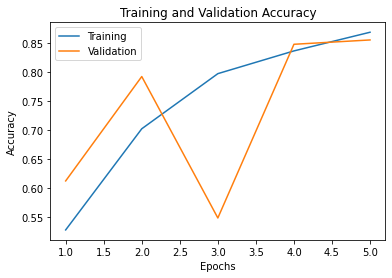


Confusion Matrix
----------------


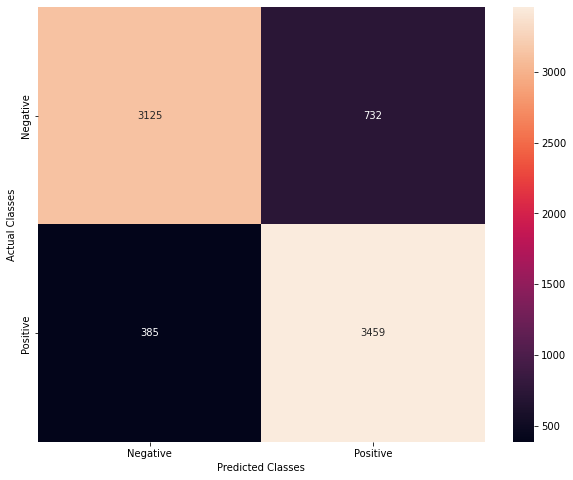


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_1_Dims_1_Bidirectional_8_Units/assets

Word Embedding Dims: 2
GRU Layers: 1
GRU Units: 8
-----------------------
Accuracy: 0.8532658219337463
Precision: 0.9180529713630676
Recall: 0.7752341032028198
F1: 0.8406205688776001
Total Time (s): 29.236473083496094

Model Accuracy Trend
--------------------


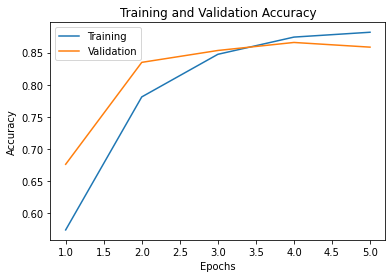


Confusion Matrix
----------------


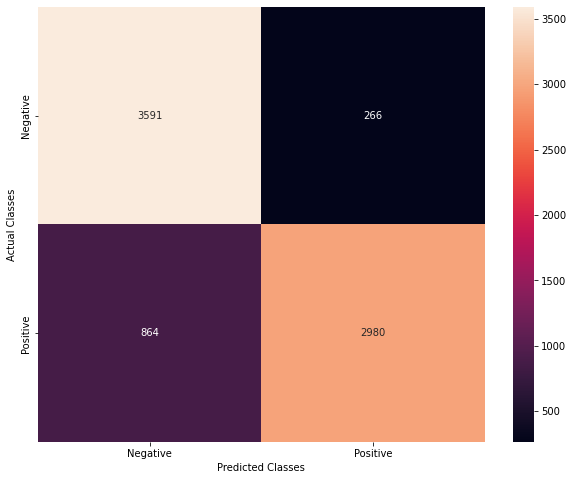


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_2_Dims_1_Bidirectional_8_Units/assets

Word Embedding Dims: 4
GRU Layers: 1
GRU Units: 8
-----------------------
Accuracy: 0.8092455267906189
Precision: 0.9419426918029785
Recall: 0.6584287285804749
F1: 0.7750727375660121
Total Time (s): 29.43592143058777

Model Accuracy Trend
--------------------


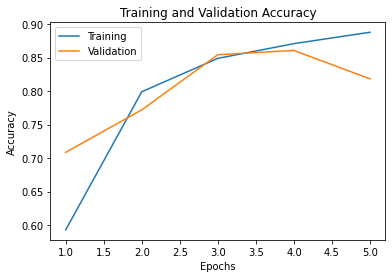


Confusion Matrix
----------------


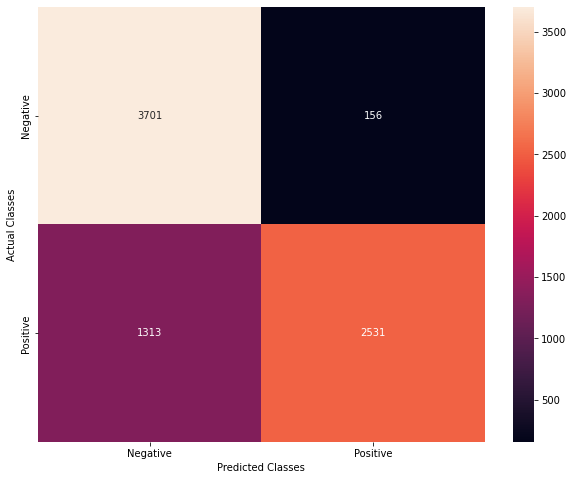


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_4_Dims_1_Bidirectional_8_Units/assets

Word Embedding Dims: 8
GRU Layers: 1
GRU Units: 8
-----------------------
Accuracy: 0.8683288097381592
Precision: 0.9024459719657898
Recall: 0.8254422545433044
F1: 0.862228269484704
Total Time (s): 29.588261127471924

Model Accuracy Trend
--------------------


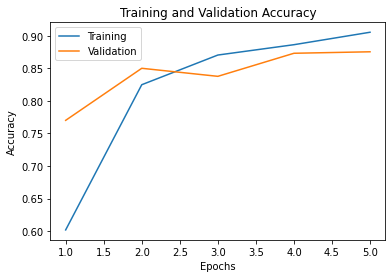


Confusion Matrix
----------------


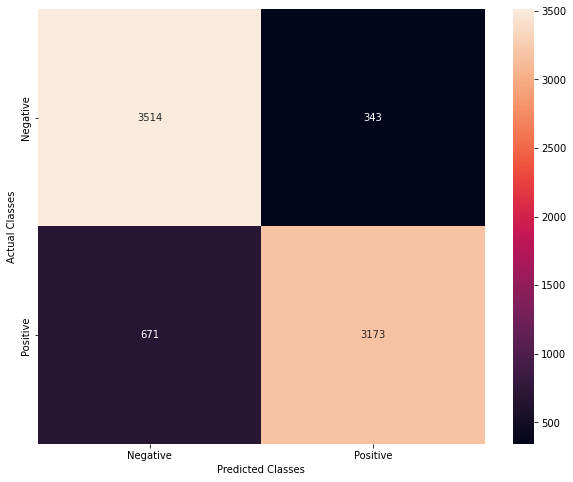


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_8_Dims_1_Bidirectional_8_Units/assets

Word Embedding Dims: 16
GRU Layers: 1
GRU Units: 8
-----------------------
Accuracy: 0.8453447818756104
Precision: 0.9131112098693848
Recall: 0.7627471089363098
F1: 0.8311835525112323
Total Time (s): 30.114232778549194

Model Accuracy Trend
--------------------


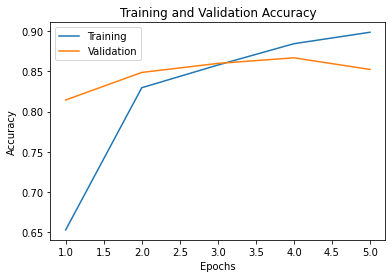


Confusion Matrix
----------------


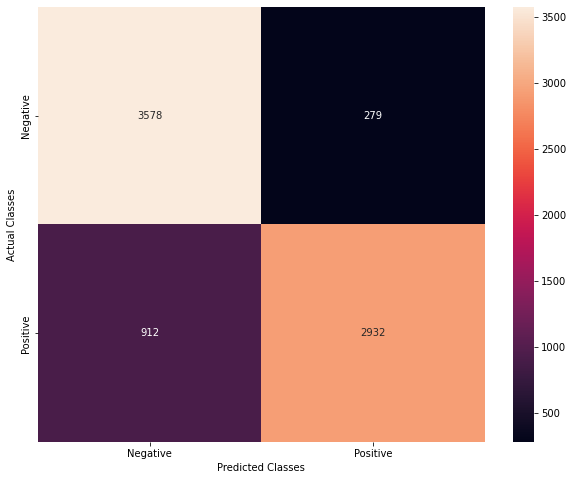


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_16_Dims_1_Bidirectional_8_Units/assets

Word Embedding Dims: 32
GRU Layers: 1
GRU Units: 8
-----------------------
Accuracy: 0.8528762459754944
Precision: 0.9088989496231079
Recall: 0.7838189601898193
F1: 0.8417376876338911
Total Time (s): 32.26541447639465

Model Accuracy Trend
--------------------


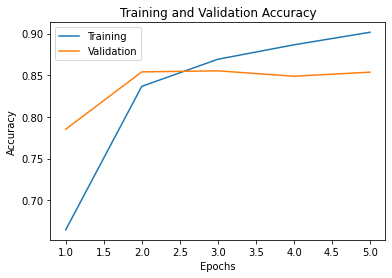


Confusion Matrix
----------------


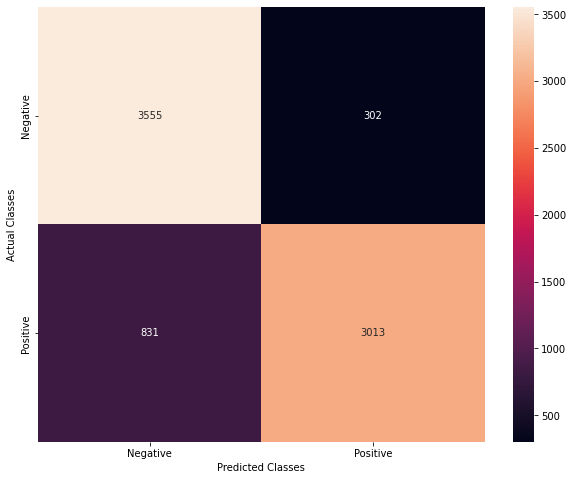


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_32_Dims_1_Bidirectional_8_Units/assets

Word Embedding Dims: 64
GRU Layers: 1
GRU Units: 8
-----------------------
Accuracy: 0.8267757296562195
Precision: 0.9222745895385742
Recall: 0.7130593061447144
F1: 0.8042840433103087
Total Time (s): 36.85781812667847

Model Accuracy Trend
--------------------


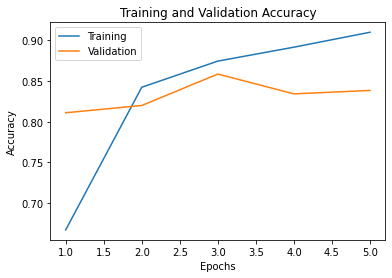


Confusion Matrix
----------------


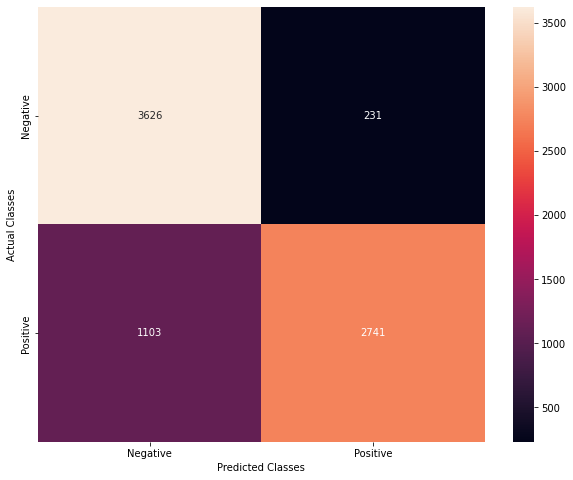


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research Assignment 4/GRU_64_Dims_1_Bidirectional_8_Units/assets



In [ ]:
for dims in [1,2,4,8,16,32,64]:

  GRU_units = top_gru['GRU Units']
  GRU_layers = top_gru['GRU Layers']
  bidirectional = top_gru['Bidirectional']
  num_epochs = 5

  start_time = time.time()

  print('Word Embedding Dims:',dims)
  print('GRU Layers:',GRU_layers)
  print('GRU Units:',GRU_units)
  print('-----------------------')

  seed(5)
  tf.random.set_seed(5)

  model = models.Sequential()
  model.add(Embedding(input_dim = voc_size, output_dim = dims, input_length = X_train_seq.shape[1]))

  if GRU_layers > 1:
                    
    for layers in range(1,GRU_layers):
      
      if bidirectional == 1:
        model.add(Bidirectional(GRU(units=GRU_units, return_sequences=True)))
      else:
        model.add(GRU(units=GRU_units, return_sequences=True))

  if bidirectional == 1:   
      model.add(Bidirectional(GRU(units=GRU_units)))
  else:    
      model.add(GRU(units=GRU_units))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['Precision','Recall','accuracy'])

  history = model.fit(X_train_seq, y_train, batch_size=128, epochs=num_epochs, validation_split=0.2, verbose=False)

  total_time = time.time() - start_time

  loss, precision, recall, accuracy = model.evaluate(X_test_seq, y_test, verbose=0)

  f1_score = (2 * precision * recall) / (precision + recall)

  print('Accuracy:',accuracy)
  print('Precision:',precision)
  print('Recall:',recall)
  print('F1:',f1_score)
  print('Total Time (s):',total_time)
  print()

  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  print('Model Accuracy Trend')
  print('--------------------')
  plot = plt.plot(range(1, len(acc) + 1), history.history['accuracy'], label = 'Training')
  plot = plt.plot(range(1, len(val_acc) + 1), history.history['val_accuracy'], label = 'Validation')
  plot = plt.title('Training and Validation Accuracy')
  plot = plt.xlabel('Epochs')
  plot = plt.ylabel('Accuracy')
  plot = plt.legend()
  plt.show()
  print()

  print('Confusion Matrix')
  print('----------------')
  pred_test = model.predict_classes(X_test_seq)

  conf_matrix = tf.math.confusion_matrix(y_test, pred_test)

  fig, ax = plt.subplots(figsize=(10,8))
  ax = sns.heatmap(conf_matrix, annot=True, fmt='g')

  ax.set_xlabel("Predicted Classes")
  ax.set_ylabel("Actual Classes")
  ax.set_xticklabels(['Negative','Positive'])
  ax.set_yticklabels(['Negative','Positive'], va='center')
  plt.show()
  print()

  if bidirectional == 1:   
      model_name = 'GRU_{}_Dims_{}_Bidirectional_{}_Units'.format(dims,GRU_layers,GRU_units)
  else:    
      model_name = 'GRU_{}_Dims_{}_Layers_{}_Units'.format(dims,GRU_layers,GRU_units)

  model.save('/content/drive/MyDrive/Research Assignment 4/'+model_name)
  print()

  gru_results = gru_results.append(
      {'Model':model_name,
        'Embed_Dims':dims,
        'GRU Layers':GRU_layers,
        'GRU Units':GRU_units,
        'Bidirectional':bidirectional,
        'Epochs':num_epochs,
        'Time':total_time,
        'Test Accuracy':accuracy,
        'Test Precision':precision,
        'Test Recall':recall,
        'Test F1':f1_score
      }, ignore_index=True)
  
  gru_results.to_csv('/content/drive/MyDrive/Research Assignment 4/'+'GRU_Results.csv')

### GRU Summary

In [12]:
gru_results = pd.read_csv('/content/drive/MyDrive/Research Assignment 4/GRU_Results.csv', header=0, index_col=0)
gru_results.sort_values(by='Test F1',ascending=False).head()

Model  Embed_Dims  ...  Test Recall   Test F1
5   GRU_500_Dims_1_Bidirectional_8_Units         500  ...     0.862383  0.881532
55        GRU_300_Dims_1_Layers_64_Units         300  ...     0.856660  0.880952
11  GRU_500_Dims_2_Bidirectional_8_Units         500  ...     0.844953  0.879621
67        GRU_300_Dims_3_Layers_64_Units         300  ...     0.845213  0.878464
56        GRU_500_Dims_1_Layers_64_Units         500  ...     0.844173  0.878333

[5 rows x 11 columns]

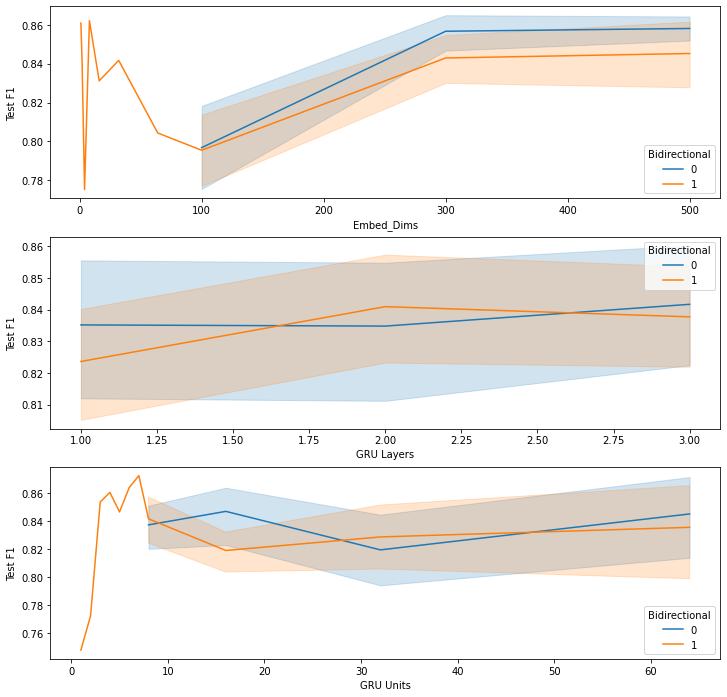

In [13]:
plot_df = gru_results[['Embed_Dims','GRU Layers','GRU Units','Bidirectional','Test F1']]

fig, ax = plt.subplots(3,1,figsize=(12,12))

sns.lineplot(x='Embed_Dims',y='Test F1',data=plot_df,hue='Bidirectional',ax=ax[0])
sns.lineplot(x='GRU Layers',y='Test F1',data=plot_df,hue='Bidirectional',ax=ax[1])
sns.lineplot(x='GRU Units',y='Test F1',data=plot_df,hue='Bidirectional',ax=ax[2])

# Overall Summary

In [14]:
rnn_results = pd.read_csv('/content/drive/MyDrive/Research Assignment 4/RNN_Results.csv', header=0, index_col=0)
lstm_results = pd.read_csv('/content/drive/MyDrive/Research Assignment 4/LSTM_Results.csv', header=0, index_col=0)
gru_results = pd.read_csv('/content/drive/MyDrive/Research Assignment 4/GRU_Results.csv', header=0, index_col=0)

rnn_results = rnn_results.rename(columns={'RNN Layers':'Layers','RNN Units':'Units'})
lstm_results = lstm_results.rename(columns={'LSTM Layers':'Layers','LSTM Units':'Units'})
gru_results = gru_results.rename(columns={'GRU Layers':'Layers','GRU Units':'Units'})

results = rnn_results.append(lstm_results,ignore_index=True).append(gru_results,ignore_index=True)
results['Type'] = results['Model'].apply(lambda x: x.split('_')[0])

results.head(25)

Model  Embed_Dims  ...   Test F1  Type
0           RNN_100_Dims_1_Layers_8_Units         100  ...  0.817640   RNN
1           RNN_300_Dims_1_Layers_8_Units         300  ...  0.822472   RNN
2           RNN_500_Dims_1_Layers_8_Units         500  ...  0.818479   RNN
3    RNN_100_Dims_1_Bidirectional_8_Units         100  ...  0.830459   RNN
4    RNN_300_Dims_1_Bidirectional_8_Units         300  ...  0.839065   RNN
5    RNN_500_Dims_1_Bidirectional_8_Units         500  ...  0.830037   RNN
6           RNN_100_Dims_2_Layers_8_Units         100  ...  0.805489   RNN
7           RNN_300_Dims_2_Layers_8_Units         300  ...  0.758002   RNN
8           RNN_500_Dims_2_Layers_8_Units         500  ...  0.790768   RNN
9    RNN_100_Dims_2_Bidirectional_8_Units         100  ...  0.798580   RNN
10   RNN_300_Dims_2_Bidirectional_8_Units         300  ...  0.787982   RNN
11   RNN_500_Dims_2_Bidirectional_8_Units         500  ...  0.793690   RNN
12          RNN_100_Dims_3_Layers_8_Units         100  ...  0.757734   RNN
13          RNN_300_Dims_3_Layers_8_Units         300  ...  0.748634   RNN
14          RNN_500_Dims_3_Layers_8_Units         500  ...  0.821858   RNN
15   RNN_100_Dims_3_Bidirectional_8_Units         100  ...  0.842618   RNN
16   RNN_300_Dims_3_Bidirectional_8_Units         300  ...  0.831220   RNN
17   RNN_500_Dims_3_Bidirectional_8_Units         500  ...  0.767549   RNN
18         RNN_100_Dims_1_Layers_16_Units         100  ...  0.709862   RNN
19         RNN_300_Dims_1_Layers_16_Units         300  ...  0.862178   RNN
20         RNN_500_Dims_1_Layers_16_Units         500  ...  0.773203   RNN
21  RNN_100_Dims_1_Bidirectional_16_Units         100  ...  0.787616   RNN
22  RNN_300_Dims_1_Bidirectional_16_Units         300  ...  0.814646   RNN
23  RNN_500_Dims_1_Bidirectional_16_Units         500  ...  0.853245   RNN
24         RNN_100_Dims_2_Layers_16_Units         100  ...  0.750620   RNN

[25 rows x 12 columns]

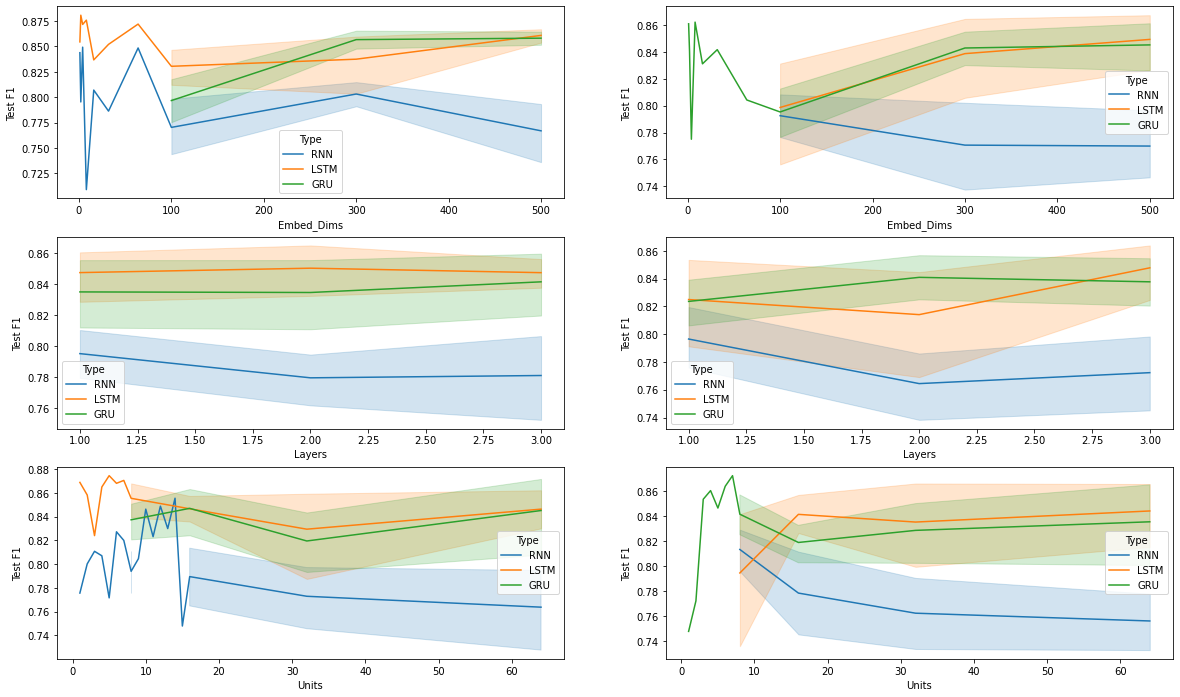

In [ ]:
plot_df = results[['Type','Embed_Dims','Layers','Units','Bidirectional','Test F1']]

fig, ax = plt.subplots(3,2,figsize=(20,12))

sns.lineplot(x='Embed_Dims',y='Test F1',data=plot_df[plot_df['Bidirectional']==0],hue='Type',ax=ax[0,0])
sns.lineplot(x='Embed_Dims',y='Test F1',data=plot_df[plot_df['Bidirectional']==1],hue='Type',ax=ax[0,1])
sns.lineplot(x='Layers',y='Test F1',data=plot_df[plot_df['Bidirectional']==0],hue='Type',ax=ax[1,0])
sns.lineplot(x='Layers',y='Test F1',data=plot_df[plot_df['Bidirectional']==1],hue='Type',ax=ax[1,1])
sns.lineplot(x='Units',y='Test F1',data=plot_df[plot_df['Bidirectional']==0],hue='Type',ax=ax[2,0])
sns.lineplot(x='Units',y='Test F1',data=plot_df[plot_df['Bidirectional']==1],hue='Type',ax=ax[2,1])

In [10]:
results

Model  Embed_Dims  ...   Test F1  Type
0           RNN_100_Dims_1_Layers_8_Units         100  ...  0.817640   RNN
1           RNN_300_Dims_1_Layers_8_Units         300  ...  0.822472   RNN
2           RNN_500_Dims_1_Layers_8_Units         500  ...  0.818479   RNN
3    RNN_100_Dims_1_Bidirectional_8_Units         100  ...  0.830459   RNN
4    RNN_300_Dims_1_Bidirectional_8_Units         300  ...  0.839065   RNN
..                                    ...         ...  ...       ...   ...
262    GRU_4_Dims_1_Bidirectional_8_Units           4  ...  0.775073   GRU
263    GRU_8_Dims_1_Bidirectional_8_Units           8  ...  0.862228   GRU
264   GRU_16_Dims_1_Bidirectional_8_Units          16  ...  0.831184   GRU
265   GRU_32_Dims_1_Bidirectional_8_Units          32  ...  0.841738   GRU
266   GRU_64_Dims_1_Bidirectional_8_Units          64  ...  0.804284   GRU

[267 rows x 12 columns]

In [20]:
results.sort_values(by='Test F1',ascending=False).head(15)

Model  Embed_Dims  ...   Test F1  Type
96           LSTM_500_Dims_1_Layers_8_Units         500  ...  0.882741  LSTM
150         LSTM_500_Dims_1_Layers_64_Units         500  ...  0.881658  LSTM
101          LSTM_300_Dims_2_Layers_8_Units         300  ...  0.881656  LSTM
185    GRU_500_Dims_1_Bidirectional_8_Units         500  ...  0.881532   GRU
235          GRU_300_Dims_1_Layers_64_Units         300  ...  0.880952   GRU
174            LSTM_2_Dims_1_Layers_8_Units           2  ...  0.880815  LSTM
135  LSTM_500_Dims_1_Bidirectional_32_Units         500  ...  0.879850  LSTM
191    GRU_500_Dims_2_Bidirectional_8_Units         500  ...  0.879621   GRU
126         LSTM_500_Dims_3_Layers_16_Units         500  ...  0.879376  LSTM
147  LSTM_500_Dims_3_Bidirectional_32_Units         500  ...  0.878881  LSTM
247          GRU_300_Dims_3_Layers_64_Units         300  ...  0.878464   GRU
236          GRU_500_Dims_1_Layers_64_Units         500  ...  0.878333   GRU
251   GRU_500_Dims_3_Bidirectional_64_Units         500  ...  0.878115   GRU
250   GRU_300_Dims_3_Bidirectional_64_Units         300  ...  0.878022   GRU
116  LSTM_300_Dims_1_Bidirectional_16_Units         300  ...  0.876855  LSTM

[15 rows x 12 columns]

In [ ]:
results.sort_values(by=['Type','Embed_Dims','Layers','Bidirectional','Units']).to_csv('/content/drive/MyDrive/Research Assignment 4/Results.csv')

In [ ]:
results.sort_values(by='Test Accuracy',ascending=False)

Model  Embed_Dims  ...   Test F1  Type
191   GRU_500_Dims_2_Bidirectional_8_Units         500  ...  0.879621   GRU
235         GRU_300_Dims_1_Layers_64_Units         300  ...  0.880952   GRU
185   GRU_500_Dims_1_Bidirectional_8_Units         500  ...  0.881532   GRU
150        LSTM_500_Dims_1_Layers_64_Units         500  ...  0.881658  LSTM
250  GRU_300_Dims_3_Bidirectional_64_Units         300  ...  0.878022   GRU
..                                     ...         ...  ...       ...   ...
63   RNN_100_Dims_2_Bidirectional_64_Units         100  ...  0.735921   RNN
103  LSTM_100_Dims_2_Bidirectional_8_Units         100  ...  0.623367  LSTM
54          RNN_100_Dims_1_Layers_64_Units         100  ...  0.683053   RNN
52   RNN_300_Dims_3_Bidirectional_32_Units         300  ...  0.660679   RNN
68          RNN_500_Dims_3_Layers_64_Units         500  ...  0.672796   RNN

[267 rows x 12 columns]

In [18]:
results.sort_values(by='Test F1',ascending=False)[['Type','Embed_Dims','Layers','Units','Bidirectional','Epochs','Time','Test Accuracy','Test Precision','Test Recall','Test F1']].head(25)

Type  Embed_Dims  Layers  ...  Test Precision  Test Recall   Test F1
96   LSTM         500       1  ...        0.877409     0.888137  0.882741
150  LSTM         500       1  ...        0.900678     0.863424  0.881658
101  LSTM         300       2  ...        0.846707     0.919615  0.881656
185   GRU         500       1  ...        0.901550     0.862383  0.881532
235   GRU         300       1  ...        0.906663     0.856660  0.880952
174  LSTM           2       1  ...        0.852311     0.911290  0.880815
135  LSTM         500       1  ...        0.909015     0.852497  0.879850
191   GRU         500       2  ...        0.917255     0.844953  0.879621
126  LSTM         500       3  ...        0.864139     0.895161  0.879376
147  LSTM         500       3  ...        0.900847     0.857960  0.878881
247   GRU         300       3  ...        0.914438     0.845213  0.878464
236   GRU         500       1  ...        0.915374     0.844173  0.878333
251   GRU         500       3  ...        0.915819     0.843392  0.878115
250   GRU         300       3  ...        0.924360     0.836108  0.878022
116  LSTM         300       1  ...        0.902063     0.853018  0.876855
239   GRU         500       1  ...        0.903814     0.850676  0.876441
176  LSTM           8       1  ...        0.908354     0.845734  0.875926
170  LSTM         500       1  ...        0.898463     0.851717  0.874466
141  LSTM         500       2  ...        0.910423     0.840791  0.874222
153  LSTM         500       1  ...        0.920818     0.831946  0.874129
154  LSTM         100       2  ...        0.908733     0.841831  0.874004
140  LSTM         300       2  ...        0.892809     0.855879  0.873954
137  LSTM         300       2  ...        0.909423     0.841051  0.873902
227   GRU         500       2  ...        0.911948     0.837929  0.873373
152  LSTM         300       1  ...        0.914009     0.835068  0.872757

[25 rows x 11 columns]

In [ ]:
results.groupby(by=['Type','Bidirectional'])[['Bidirectional','Time','Test Accuracy','Test Precision','Test Recall','Test F1']].mean()

Bidirectional        Time  ...  Test Recall   Test F1
Type Bidirectional                             ...                       
GRU  0                          0   64.901178  ...     0.761136  0.837226
     1                          1   85.024177  ...     0.765716  0.831018
LSTM 0                          0   65.287076  ...     0.794719  0.848328
     1                          1   98.802764  ...     0.762639  0.828954
RNN  0                          0  435.107013  ...     0.740433  0.789163
     1                          1  990.123492  ...     0.726435  0.777755

[6 rows x 6 columns]